# Data Cleaning and Visualization Overview
In the initial phase of our mini project, we focused on refining the dataset through meticulous data cleaning and visualization techniques. Our objective was to enhance the quality and coherence of the data, making it more suitable for subsequent analysis. This section encapsulates our methodology and key steps in achieving a refined dataset.

## Data Cleaning
Our data cleaning process comprised handling missing values, encoding categorical features, and ensuring data integrity. Notably, we employed strategic approaches to replace null values, fostering a more complete and robust dataset. Categorical features were encoded to numerical values, facilitating machine learning model compatibility.

## Visualization
Visualization played a pivotal role in understanding the characteristics of the data and identifying patterns. Through well-crafted plots and graphs, we delved into the distribution of features, relationships between variables, and the impact of categorical features on our target variable.

## Key Steps:
1. **Handling Class Imbalance:** Class imbalance is handled using oversampling of minority class.
1. **Handling Null Values:** Robust techniques were employed to replace missing values, ensuring data completeness and reliability.
2. **Categorical Feature Encoding:** Transformation of categorical features into numerical representations for seamless integration into machine learning models.
3. **Strategic Plotting:** Visualization techniques such as histograms, scatter plots, and bar graphs were leveraged to gain insights into the distribution and relationships within the dataset.
<hr>

In [82]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#### Reading the Dataset ####

In [83]:
df = pd.read_csv("weatherAUS.csv")
original_df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)

In [84]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

The dataset contains a total of 23 distinct features and 145,460 observations.
<hr>

#### Looking at various types of features that may be present in the given dataset ####

In [85]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


`numerical_feature`, which contains the column names of the DataFrame df where the data type is not 'O' (i.e., not an object or a string). This list includes features that are numeric in nature, such as integers or floats. There are total of 16 `numerical_feature`.

`discrete_feature` is created, which includes the features from `numerical_feature` but only those where the number of unique values is less than 25. This suggests that these features are likely to be discrete rather than continuous, as they have a relatively small number of distinct values. There are total of 2 `discrete_feature`.

`continuous_feature` list is created by taking the elements from `numerical_feature` that are not present in the discrete_feature list. These are the numerical features that are not considered discrete, implying they may have a larger range of values and are likely continuous. There are total of 14 `continuous_feature`.

`categorical_feature` list is created by taking the columns from the DataFrame df that are not in the `numerical_feature` list. These are likely features with non-numeric data types (e.g., strings or objects), suggesting they are categorical in nature. There are total of 7 `categorical_feature`.
<hr>

### Data imbalance

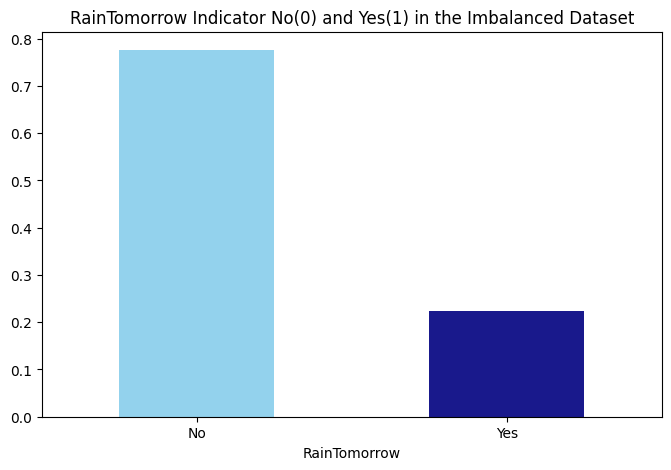

In [86]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe that presence of "0" and "1" are almost in the ratio 78:22. So there is a class imbalance and we have to handle it. For tackling class imbalance, we will use **oversampling of minority class** here. Since the size of the data set is quite small, undersampling of majority class would not make much sense here. 

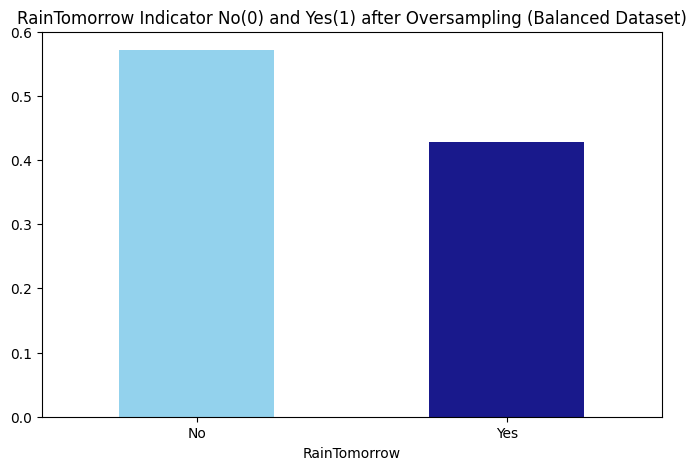

In [87]:
from sklearn.utils import resample

no = df[df.RainTomorrow == "No"]
yes = df[df.RainTomorrow == "Yes"]
yes_oversampled = resample(yes, replace=True, n_samples=int(3*len(no)/4), random_state=123)
df = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<hr>

### Examining the percentage of null values and handling it ###

In [88]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date              0.000000
Location          0.000000
MinTemp           0.485359
MaxTemp           0.214449
Rainfall          1.321917
Evaporation      43.174672
Sunshine         47.570874
WindGustDir       6.903286
WindGustSpeed     6.845270
WindDir9am        6.810565
WindDir3pm        2.864498
WindSpeed9am      1.002833
WindSpeed3pm      1.947652
Humidity9am       1.397544
Humidity3pm       2.674395
Pressure9am       9.863095
Pressure3pm       9.866721
Cloud9am         37.113124
Cloud3pm         39.171626
Temp9am           0.727261
Temp3pm           2.019135
RainToday         1.321917
RainTomorrow      0.000000
dtype: float64

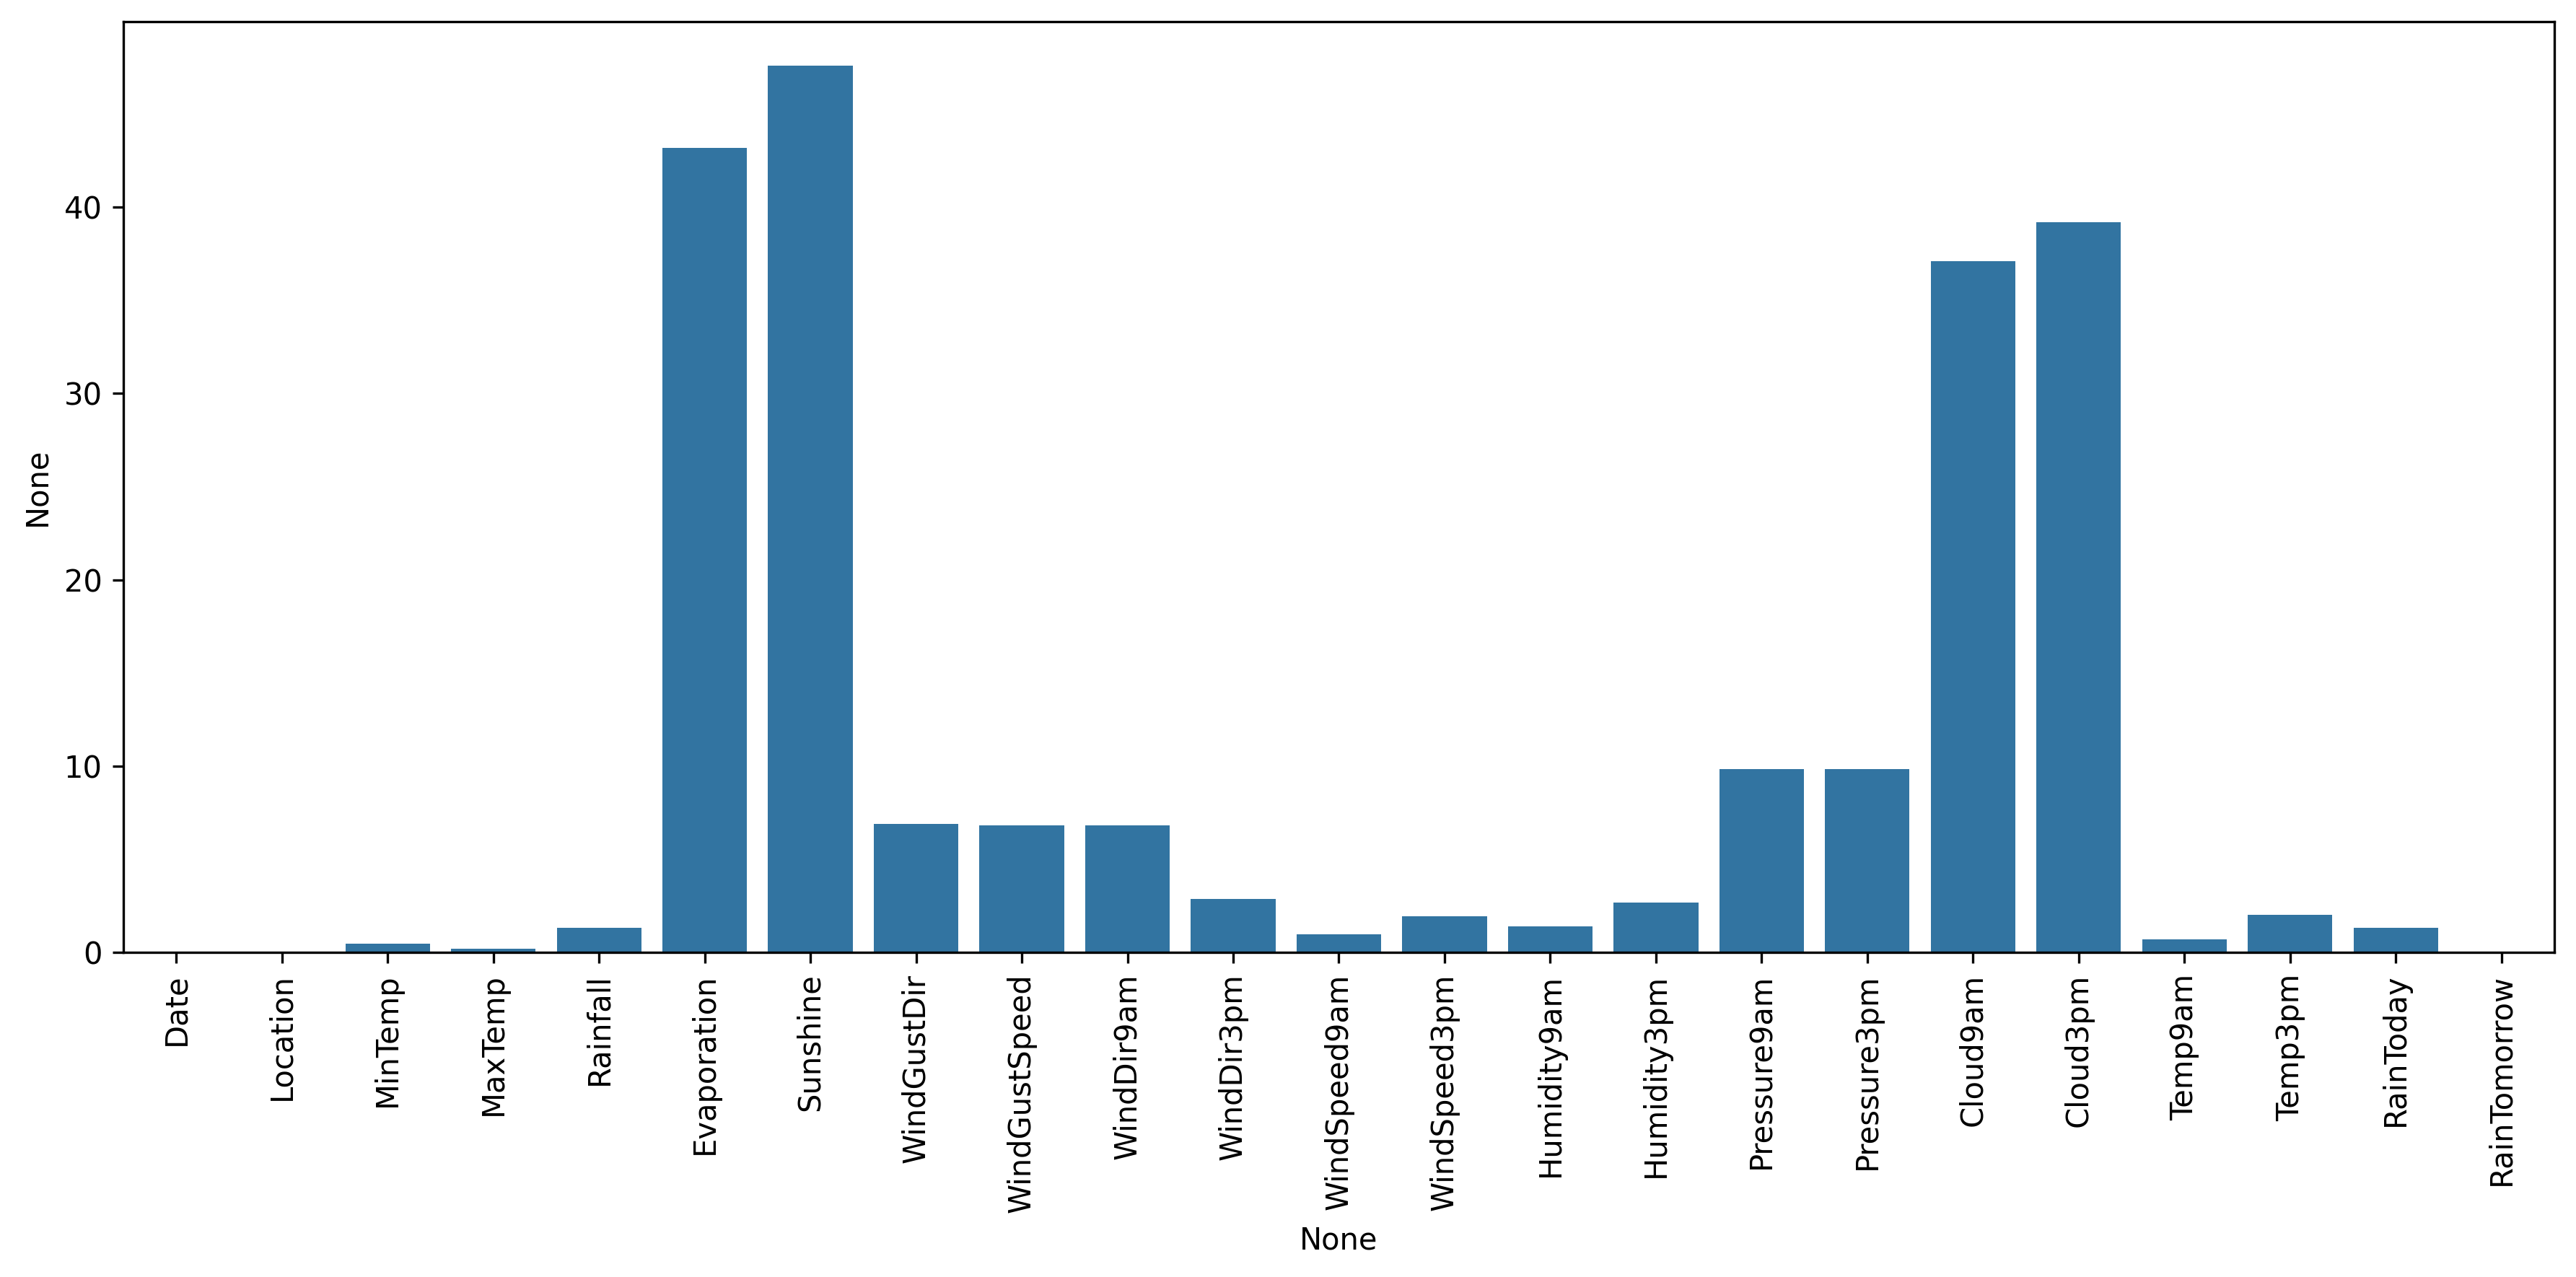

In [89]:
# Create a barplot for the column vs percentage of null values 
plt.figure(figsize=(12, 6), dpi=300)  # Adjust the figure size
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center') # to rotate the labels of x axis for better view
plt.tight_layout()

Creating a function to handle null values

In [90]:
def randomsampleimputation(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [91]:
# Let's look at the numerical_features
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Handling null values for the features that has approximately more than 40% of null values 
<br>
We have chosen to randomly fill these features

In [92]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")


In [93]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date             0.000000
Location         0.000000
MinTemp          0.485359
MaxTemp          0.214449
Rainfall         1.321917
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.903286
WindGustSpeed    6.845270
WindDir9am       6.810565
WindDir3pm       2.864498
WindSpeed9am     1.002833
WindSpeed3pm     1.947652
Humidity9am      1.397544
Humidity3pm      2.674395
Pressure9am      9.863095
Pressure3pm      9.866721
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.727261
Temp3pm          2.019135
RainToday        1.321917
RainTomorrow     0.000000
dtype: float64

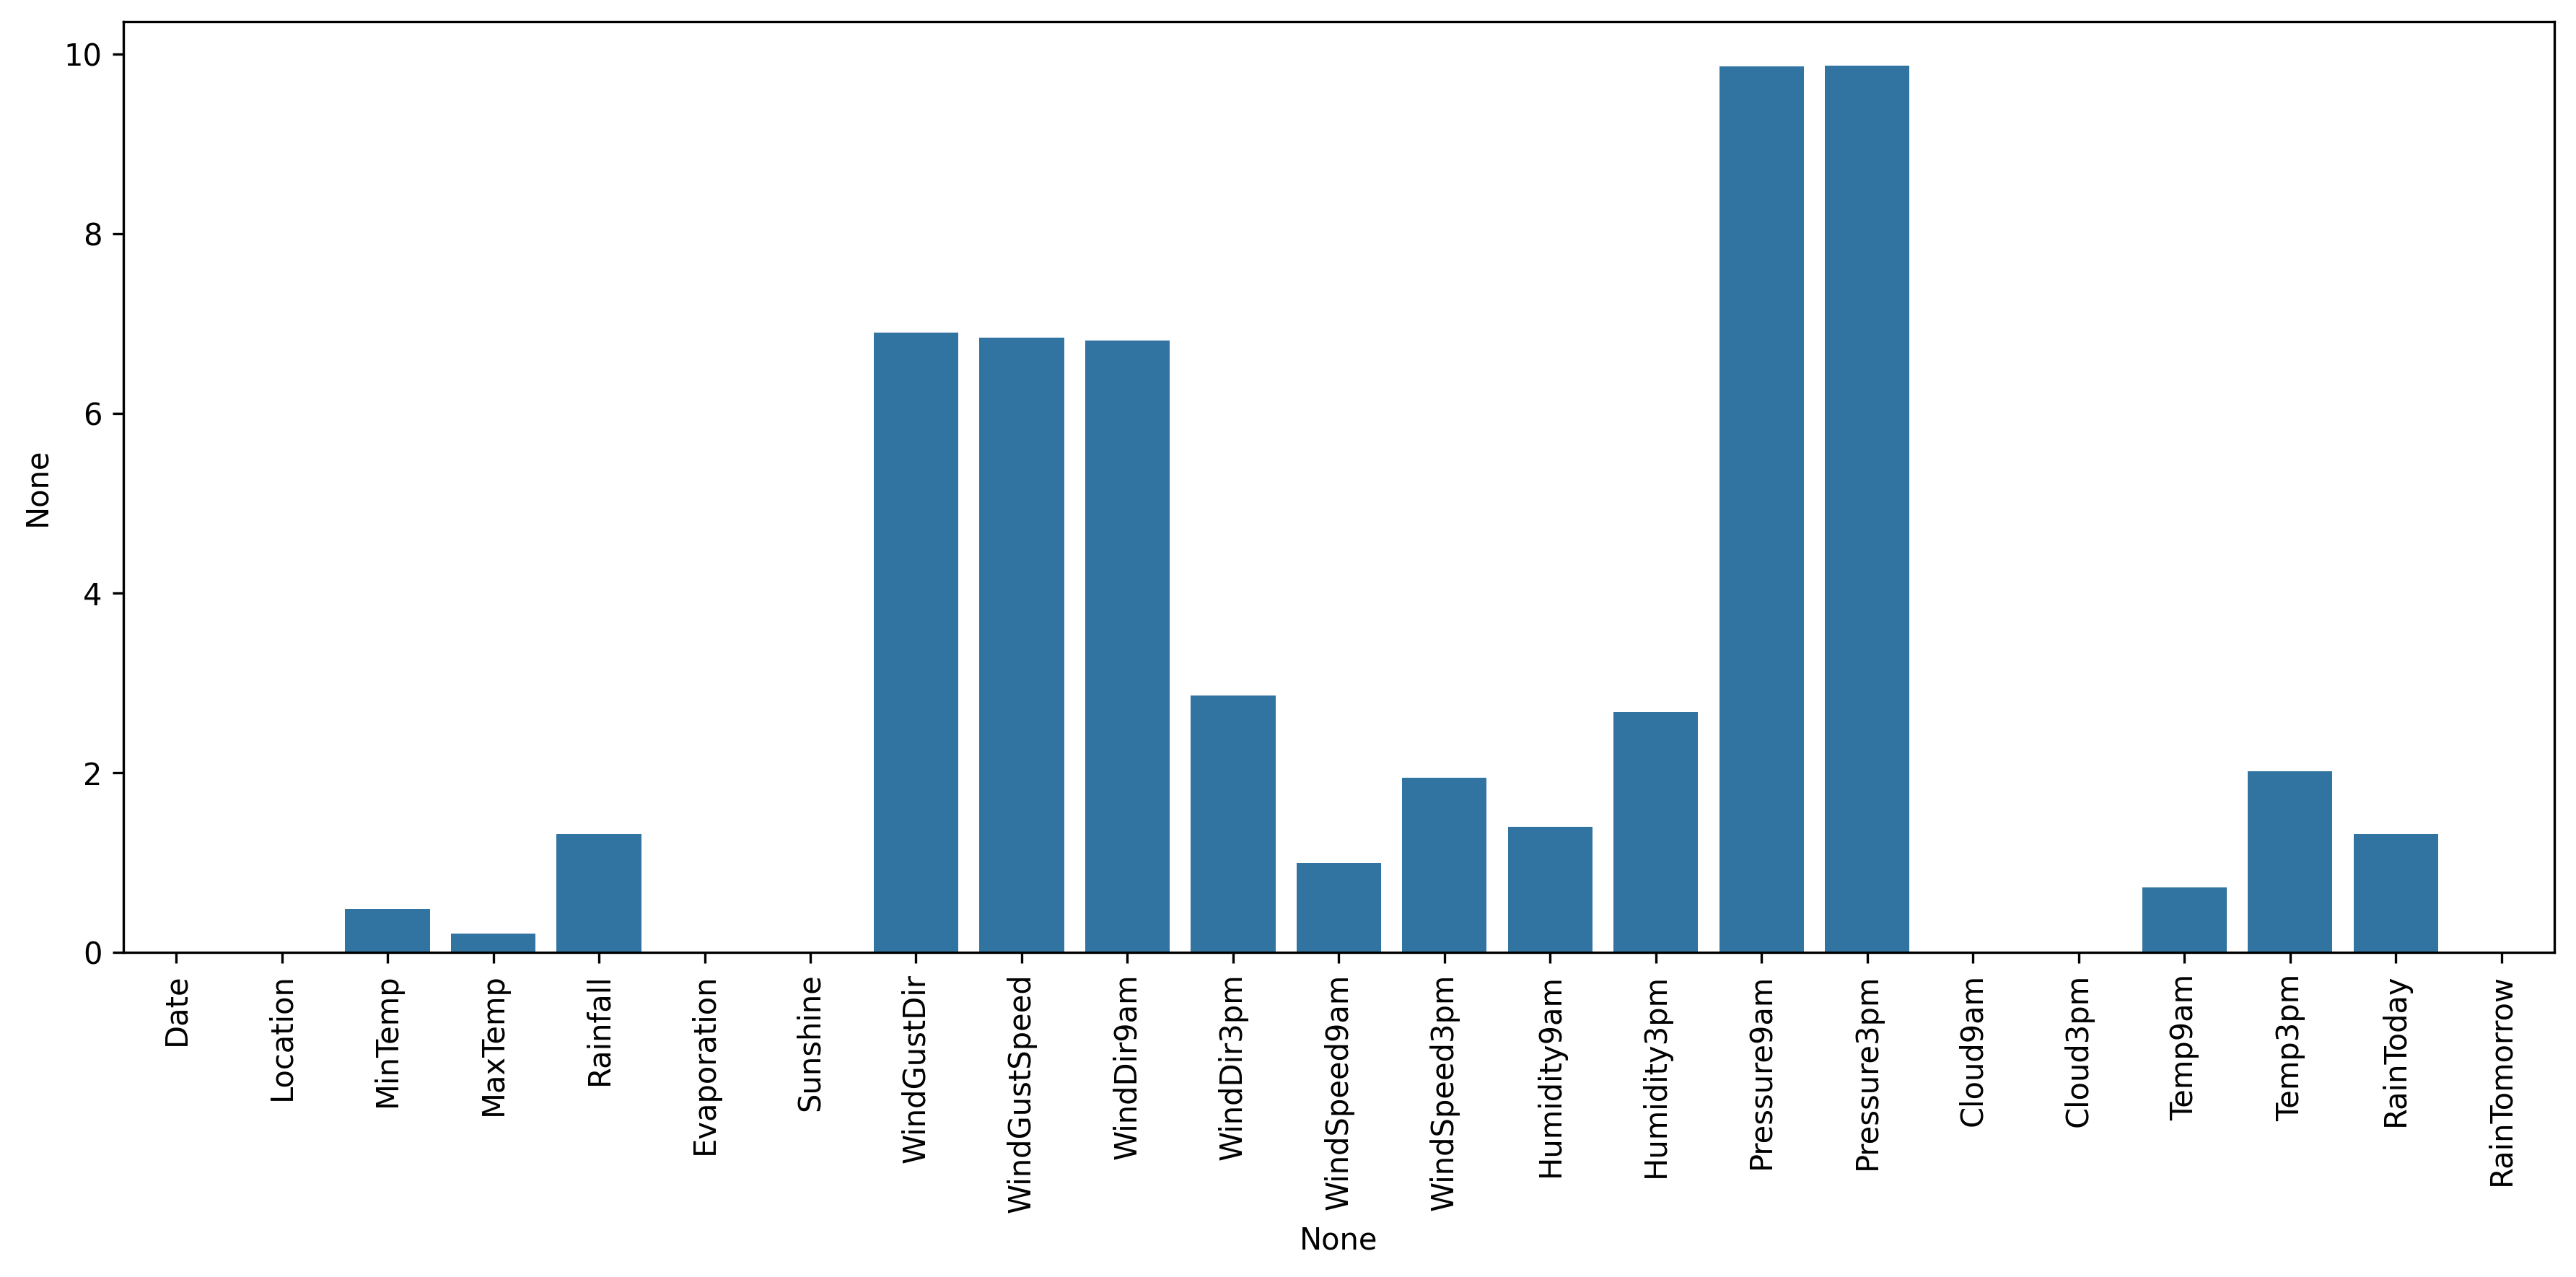

In [94]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

Next for all the continuous_feature we are replacing the null values with its median

In [95]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [96]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.903286
WindGustSpeed    0.000000
WindDir9am       6.810565
WindDir3pm       2.864498
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        1.321917
RainTomorrow     0.000000
dtype: float64

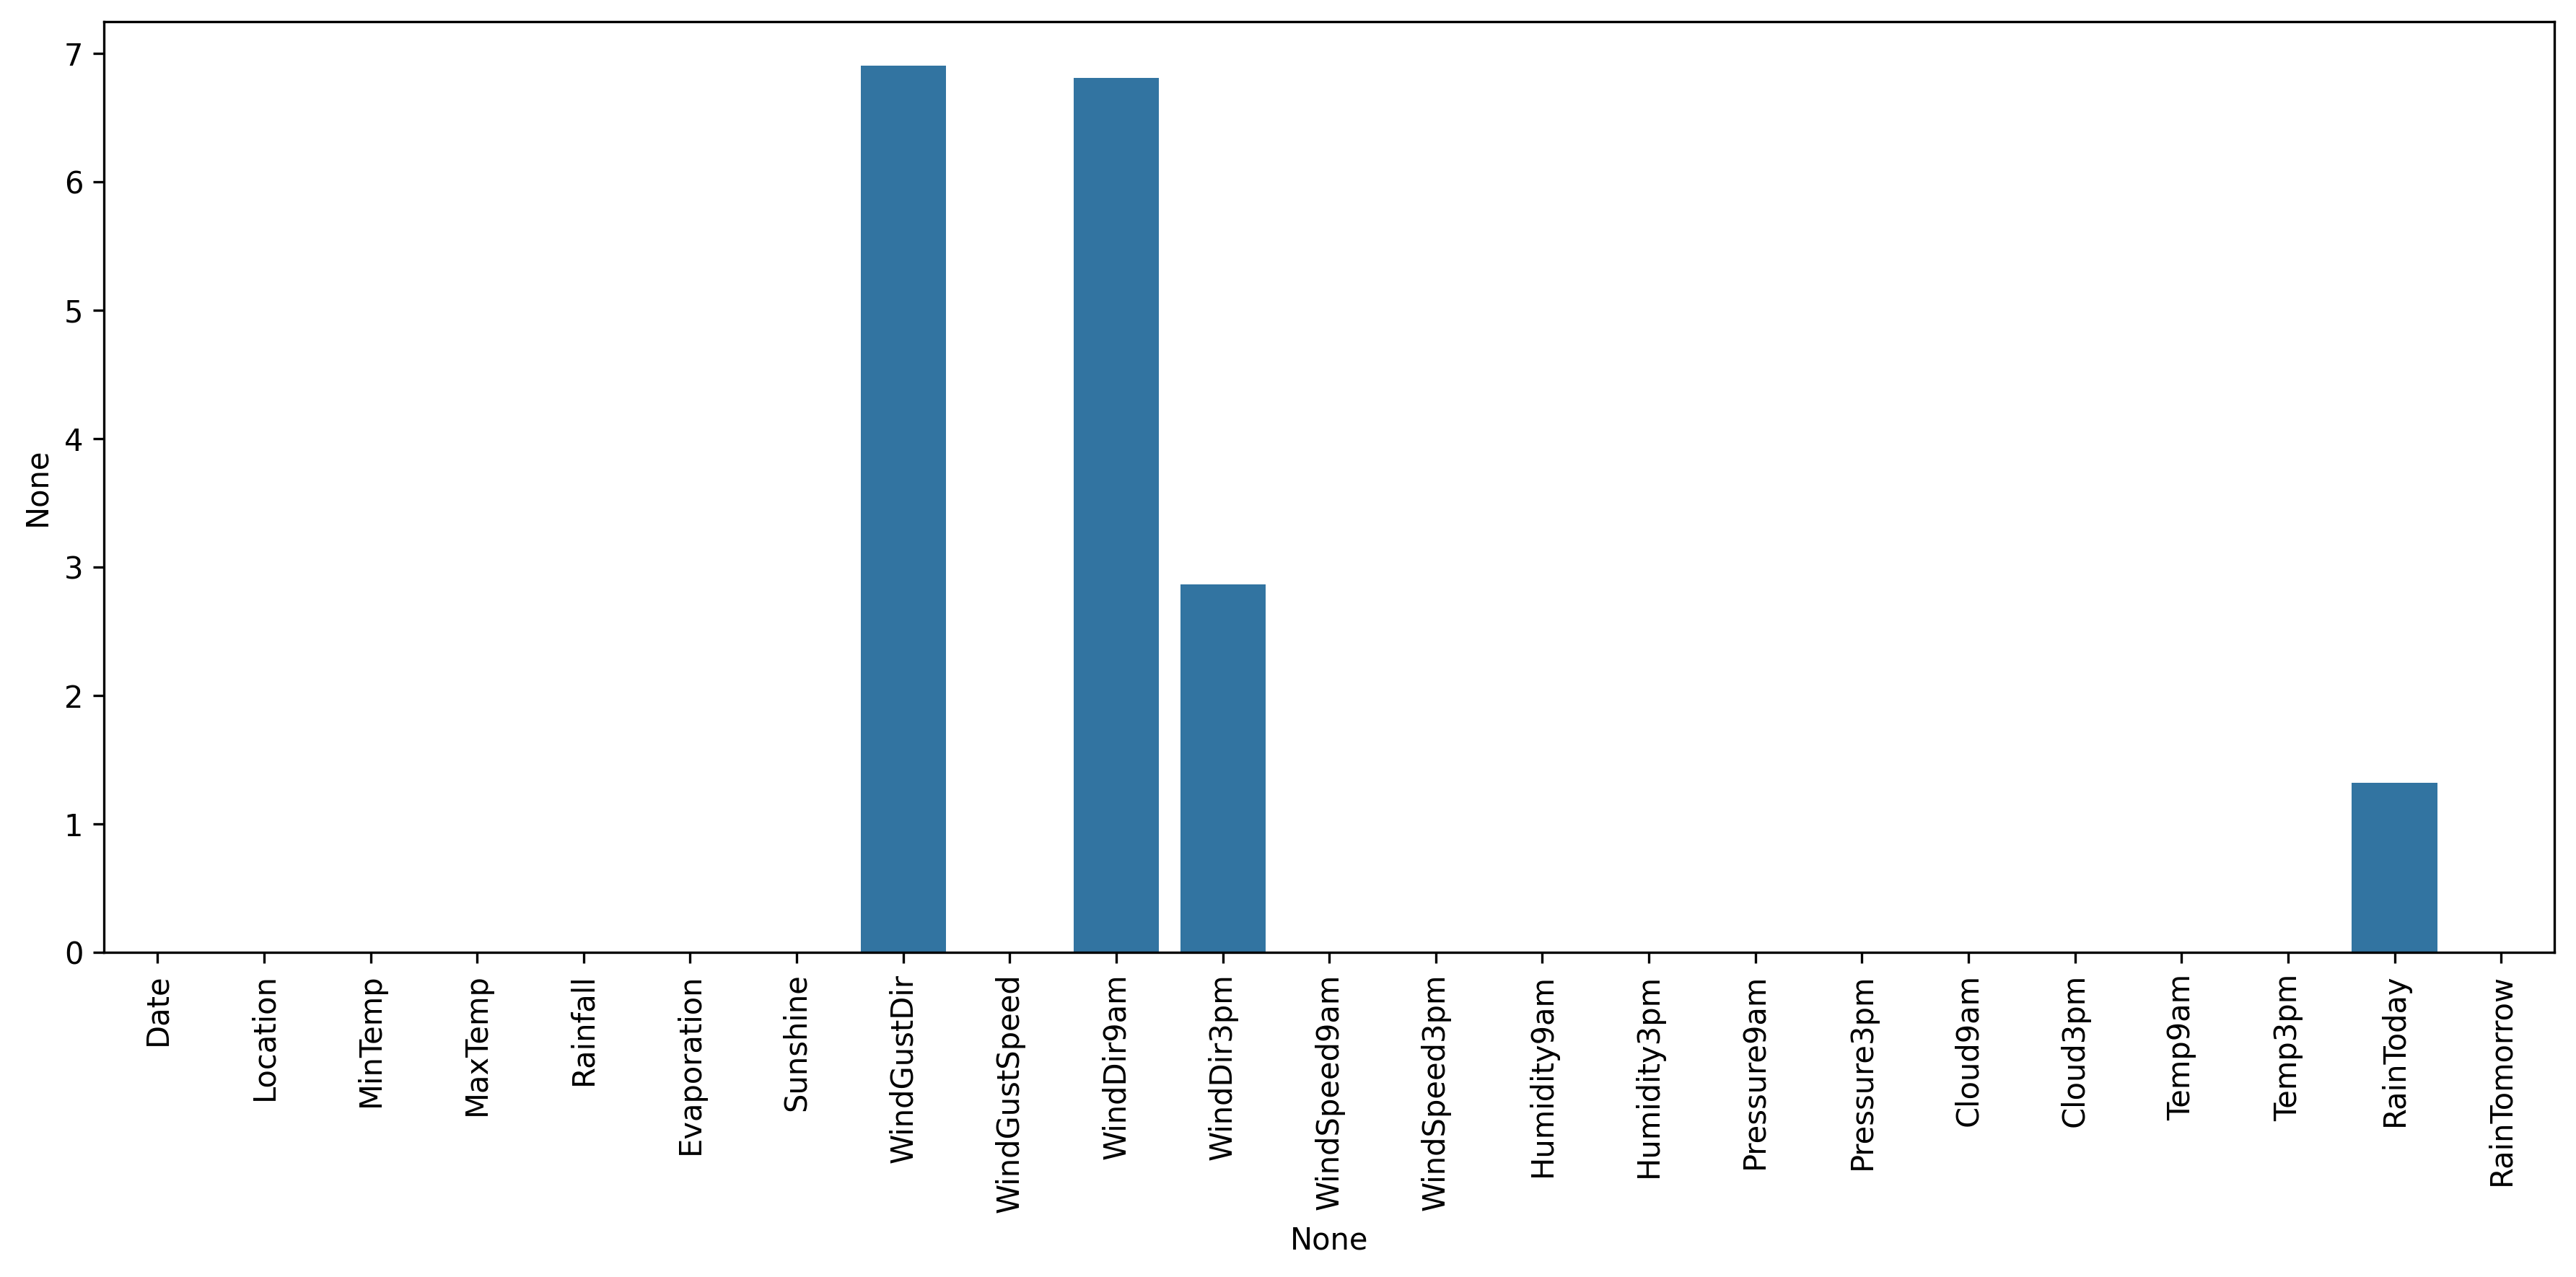

In [97]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

#### We've handled the null values numeric features now we'll proceed to deal with catagorical features, we will even encode  the catagorical data along with this process ####

For the RainToday and RainTomorrow data we have either yes or no therefore we can replace this data with 0 and 1 which means no and yes respectively.

In [98]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01        Albury     13.4     22.9       0.6          7.0   
1      2008-12-02        Albury      7.4     25.1       0.0          6.0   
2      2008-12-03        Albury     12.9     25.7       0.0          2.4   
3      2008-12-04        Albury      9.2     28.0       0.0          2.2   
4      2008-12-05        Albury     17.5     32.3       1.0          3.8   
...           ...           ...      ...      ...       ...          ...   
92242  2014-08-23     GoldCoast     14.4     17.2      47.4          3.4   
10944  2014-05-30  CoffsHarbour      9.3     21.7       0.0          5.4   
43765  2012-05-02    Wollongong     15.7     23.3       0.0         11.4   
59244  2012-01-07       Bendigo     13.5     32.7       0.0          7.2   
93862  2010-07-06    Townsville     18.2     27.1       0.0          6.0   

       Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0          11.3           W           44.0          W        WNW   
1           6.7         WNW           44.0        NNW        WSW   
2          12.2         WSW           46.0          W        WSW   
3          13.3          NE           24.0         SE          E   
4           0.0           W           41.0        ENE         NW   
...         ...         ...            ...        ...        ...   
92242      11.3         SSE           70.0        SSE        SSE   
10944       0.0         NaN           39.0        NaN        NaN   
43765       0.0         NNW           31.0        NNW        NNE   
59244      12.7          NW           65.0        ENE        NNE   
93862       7.6         ENE           33.0        SSE         NE   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0              20.0          24.0         71.0         22.0       1007.7   
1               4.0          22.0         44.0         25.0       1010.6   
2              19.0          26.0         38.0         30.0       1007.6   
3              11.0           9.0         45.0         16.0       1017.6   
4               7.0          20.0         82.0         33.0       1010.8   
...             ...           ...          ...          ...          ...   
92242          46.0          46.0         99.0         83.0       1024.1   
10944          13.0          19.0         77.0         72.0       1016.8   
43765           7.0          17.0         64.0         80.0       1022.4   
59244          17.0          24.0         47.0         16.0       1009.6   
93862          11.0          26.0         70.0         62.0       1018.2   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0           1007.1       8.0       7.0     16.9     21.8      False   
1           1007.8       1.0       2.0     17.2     24.3      False   
2           1008.7       7.0       2.0     21.0     23.2      False   
3           1012.8       6.0       7.0     18.1     26.5      False   
4           1006.0       7.0       8.0     17.8     29.7      False   
...            ...       ...       ...      ...      ...        ...   
92242       1022.4       6.0       7.0     16.3     16.5       True   
10944       1014.5       7.0       3.0     16.4     20.7      False   
43765       1018.5       1.0       5.0     20.8     20.8      False   
59244       1004.9       1.0       8.0     20.8     30.9      False   
93862       1015.1       6.0       2.0     23.1     25.7      False   

       RainTomorrow  
0             False  
1             False  
2             False  
3             False  
4             False  
...             ...  
92242          True  
10944          True  
43765          True  
59244          True  
93862          True  

[193053 rows x 23 columns]

RainToday and RainTomorrow feature is now replaced by True or False

For the features like WindGustDir, WindDir9am and WindDir3pm null values are replaced by the value which has the max frequency.<br>
First let's look at the values these features contains

In [99]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2007-11-02', '2007-11-22', '2008-01-19',
       '2008-01-18', '2008-01-16', '2008-01-12', '2007-12-24', '2007-12-22',
       ...
       '2008-04-29', '2014-01-04', '2008-09-07', '2008-04-30', '2012-05-19',
       '2008-01-06', '2008-01-05', '2008-05-01', '2008-09-08', '2008-08-29'],
      dtype='object', name='Date', length=3435)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'Witchcliffe', 'MountGambier', 'Albany', 'CoffsHarbour', 'NorahHead',
       'MountGinini', 'Williamtown', 'Darwin', 'Melbourne', 'Sydney',
       'SydneyAirport', 'GoldCoast', 'Ballarat', 'Newcastle', 'Watsonia',
       'Wollongong', 'Hobart', 'Launceston', 'Brisbane', 'Adelaide',
       'MelbourneAirport', 'Sale', 'Albury', 'Penrith', 'BadgerysCreek',
       'Perth', 'Nuriootpa', 'Tuggeranong', 'PerthAirport', 'Canberra',
       'PearceRAAF', 'Bendigo', 'Richmond', 'WaggaWagga', 'Townsville',
       'SalmonGums', 'Katherine', 'Nhil', 

Now let's map these data with some numbers

In [100]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10, 'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10, 'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10, 'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

Now let's fill the null values with the value which has the maximum frequency.

In [101]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

Let's look whether do we still have any null values

In [102]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

Seems like we've dealt with all the null values in the given data

Let's look at the dataframe

In [103]:
df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01        Albury     13.4     22.9       0.6          7.0   
1      2008-12-02        Albury      7.4     25.1       0.0          6.0   
2      2008-12-03        Albury     12.9     25.7       0.0          2.4   
3      2008-12-04        Albury      9.2     28.0       0.0          2.2   
4      2008-12-05        Albury     17.5     32.3       1.0          3.8   
...           ...           ...      ...      ...       ...          ...   
92242  2014-08-23     GoldCoast     14.4     17.2      47.4          3.4   
10944  2014-05-30  CoffsHarbour      9.3     21.7       0.0          5.4   
43765  2012-05-02    Wollongong     15.7     23.3       0.0         11.4   
59244  2012-01-07       Bendigo     13.5     32.7       0.0          7.2   
93862  2010-07-06    Townsville     18.2     27.1       0.0          6.0   

       Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0          11.3          4.0           44.0         5.0         3.0   
1           6.7          2.0           44.0         0.0         6.0   
2          12.2          5.0           46.0         5.0         6.0   
3          13.3         11.0           24.0        13.0        14.0   
4           0.0          4.0           41.0        12.0         0.0   
...         ...          ...            ...         ...         ...   
92242      11.3         10.0           70.0        11.0        12.0   
10944       0.0          4.0           39.0         1.0        10.0   
43765       0.0          0.0           31.0         0.0         5.0   
59244      12.7          1.0           65.0        12.0         5.0   
93862       7.6         14.0           33.0        11.0        11.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0              20.0          24.0         71.0         22.0       1007.7   
1               4.0          22.0         44.0         25.0       1010.6   
2              19.0          26.0         38.0         30.0       1007.6   
3              11.0           9.0         45.0         16.0       1017.6   
4               7.0          20.0         82.0         33.0       1010.8   
...             ...           ...          ...          ...          ...   
92242          46.0          46.0         99.0         83.0       1024.1   
10944          13.0          19.0         77.0         72.0       1016.8   
43765           7.0          17.0         64.0         80.0       1022.4   
59244          17.0          24.0         47.0         16.0       1009.6   
93862          11.0          26.0         70.0         62.0       1018.2   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0           1007.1       8.0       7.0     16.9     21.8      False   
1           1007.8       1.0       2.0     17.2     24.3      False   
2           1008.7       7.0       2.0     21.0     23.2      False   
3           1012.8       6.0       7.0     18.1     26.5      False   
4           1006.0       7.0       8.0     17.8     29.7      False   
...            ...       ...       ...      ...      ...        ...   
92242       1022.4       6.0       7.0     16.3     16.5       True   
10944       1014.5       7.0       3.0     16.4     20.7      False   
43765       1018.5       1.0       5.0     20.8     20.8      False   
59244       1004.9       1.0       8.0     20.8     30.9      False   
93862       1015.1       6.0       2.0     23.1     25.7      False   

       RainTomorrow  
0             False  
1             False  
2             False  
3             False  
4             False  
...             ...  
92242          True  
10944          True  
43765          True  
59244          True  
93862          True  

[193053 rows x 23 columns]

##### Our next task is to map location feature

Our approach for mapping these locations involves replacing them with the values corresponding to the locations where 'RainTomorrow' is most frequently observed to be true.

In [104]:
# let's create a dataframe which shows weather it will rain tomorrow or not according to the places
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow      False  True 
Location                      
Adelaide           2402   1806
Albany             2114   2299
Albury             2393   1641
AliceSprings       2787    602
BadgerysCreek      2345   1517
Ballarat           2247   2002
Bendigo            2472   1470
Brisbane           2452   1919
Cairns             2038   2449
Canberra           2789   1673
Cobar              2602   1070
CoffsHarbour       2084   2251
Dartmoor           2021   2415
Darwin             2340   2205
GoldCoast          2205   1968
Hobart             2427   1993
Katherine          1294    633
Launceston         2329   1848
Melbourne          1799   1648
MelbourneAirport   2356   1703
Mildura            2680    857
Moree              2460    985
MountGambier       2110   2363
MountGinini        2088   2086
Newcastle          2224   1937
Nhil               1327    619
NorahHead          2121   2127
NorfolkIsland      2045   2325
Nuriootpa          2410   1501
PearceRAAF         2257   1349
Penrith            2369   1565
Perth              2548   1620
PerthAirport       2442   1502
Portland           1901   2768
Richmond           2391   1412
Sale               2357   1693
SalmonGums         2483   1222
Sydney             2472   2264
SydneyAirport      2231   2009
Townsville         2514   1321
Tuggeranong        2430   1511
Uluru              1405    318
WaggaWagga         2440   1394
Walpole            1870   2407
Watsonia           2261   1958
Williamtown        1853   1774
Witchcliffe        2073   2331
Wollongong         2270   1893
Woomera            2788    514

In [105]:
# sort the values to see where it rained the most
df1[True].sort_values(ascending = False)

Location
Portland            2768
Cairns              2449
Dartmoor            2415
Walpole             2407
MountGambier        2363
Witchcliffe         2331
NorfolkIsland       2325
Albany              2299
Sydney              2264
CoffsHarbour        2251
Darwin              2205
NorahHead           2127
MountGinini         2086
SydneyAirport       2009
Ballarat            2002
Hobart              1993
GoldCoast           1968
Watsonia            1958
Newcastle           1937
Brisbane            1919
Wollongong          1893
Launceston          1848
Adelaide            1806
Williamtown         1774
MelbourneAirport    1703
Sale                1693
Canberra            1673
Melbourne           1648
Albury              1641
Perth               1620
Penrith             1565
BadgerysCreek       1517
Tuggeranong         1511
PerthAirport        1502
Nuriootpa           1501
Bendigo             1470
Richmond            1412
WaggaWagga          1394
PearceRAAF          1349
Townsville      

In [106]:
# Let's look at all the places this data has
df1[True].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Dartmoor', 'Walpole', 'MountGambier',
       'Witchcliffe', 'NorfolkIsland', 'Albany', 'Sydney', 'CoffsHarbour',
       'Darwin', 'NorahHead', 'MountGinini', 'SydneyAirport', 'Ballarat',
       'Hobart', 'GoldCoast', 'Watsonia', 'Newcastle', 'Brisbane',
       'Wollongong', 'Launceston', 'Adelaide', 'Williamtown',
       'MelbourneAirport', 'Sale', 'Canberra', 'Melbourne', 'Albury', 'Perth',
       'Penrith', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Nuriootpa',
       'Bendigo', 'Richmond', 'WaggaWagga', 'PearceRAAF', 'Townsville',
       'SalmonGums', 'Cobar', 'Moree', 'Mildura', 'Katherine', 'Nhil',
       'AliceSprings', 'Woomera', 'Uluru'],
      dtype='object', name='Location')

Now let's encode these locations, we need to remember these encoded values as it will be required in the web application we will build in future.

In [107]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

The date column is curruntly no use to us so we will extract the month from the date and make it as a new feature.<br>This what is done in our base paper as well

In [108]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")

df["Date_month"] = df["Date"].dt.month


In [109]:
# now let's look at the datarame
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01        30     13.4     22.9       0.6          7.0      11.3   
1     2008-12-02        30      7.4     25.1       0.0          6.0       6.7   
2     2008-12-03        30     12.9     25.7       0.0          2.4      12.2   
3     2008-12-04        30      9.2     28.0       0.0          2.2      13.3   
4     2008-12-05        30     17.5     32.3       1.0          3.8       0.0   
...          ...       ...      ...      ...       ...          ...       ...   
92242 2014-08-23        15     14.4     17.2      47.4          3.4      11.3   
10944 2014-05-30         9      9.3     21.7       0.0          5.4       0.0   
43765 2012-05-02        20     15.7     23.3       0.0         11.4       0.0   
59244 2012-01-07        36     13.5     32.7       0.0          7.2      12.7   
93862 2010-07-06        39     18.2     27.1       0.0          6.0       7.6   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              4.0           44.0         5.0         3.0          20.0   
1              2.0           44.0         0.0         6.0           4.0   
2              5.0           46.0         5.0         6.0          19.0   
3             11.0           24.0        13.0        14.0          11.0   
4              4.0           41.0        12.0         0.0           7.0   
...            ...            ...         ...         ...           ...   
92242         10.0           70.0        11.0        12.0          46.0   
10944          4.0           39.0         1.0        10.0          13.0   
43765          0.0           31.0         0.0         5.0           7.0   
59244          1.0           65.0        12.0         5.0          17.0   
93862         14.0           33.0        11.0        11.0          11.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0              24.0         71.0         22.0       1007.7       1007.1   
1              22.0         44.0         25.0       1010.6       1007.8   
2              26.0         38.0         30.0       1007.6       1008.7   
3               9.0         45.0         16.0       1017.6       1012.8   
4              20.0         82.0         33.0       1010.8       1006.0   
...             ...          ...          ...          ...          ...   
92242          46.0         99.0         83.0       1024.1       1022.4   
10944          19.0         77.0         72.0       1016.8       1014.5   
43765          17.0         64.0         80.0       1022.4       1018.5   
59244          24.0         47.0         16.0       1009.6       1004.9   
93862          26.0         70.0         62.0       1018.2       1015.1   

       Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0           8.0       7.0     16.9     21.8      False         False   
1           1.0       2.0     17.2     24.3      False         False   
2           7.0       2.0     21.0     23.2      False         False   
3           6.0       7.0     18.1     26.5      False         False   
4           7.0       8.0     17.8     29.7      False         False   
...         ...       ...      ...      ...        ...           ...   
92242       6.0       7.0     16.3     16.5       True          True   
10944       7.0       3.0     16.4     20.7      False          True   
43765       1.0       5.0     20.8     20.8      False          True   
59244       1.0       8.0     20.8     30.9      False          True   
93862       6.0       2.0     23.1     25.7      False          True   

       Date_month  
0              12  
1              12  
2              12  
3              12  
4              12  
...           ...  
92242           8  
10944           5  
43765           5  
59244           1  
93862           7  

[193053 rows x 24 columns]

now let's drop the data column as it's of no use to us

In [110]:
df = df.drop('Date', axis=1)

#### Creating a data set which will not contain the outliers

In [111]:
# df.to_csv("preprocessed_with_outliers.csv", index=False)

### We've finally dealt with all the null values and successfully encoded all the catagoriacal data ###
<hr>

## Dealing with Outliers ##

Let's plot a boxplot graph to see the outliers, same approach is followed in our base paper

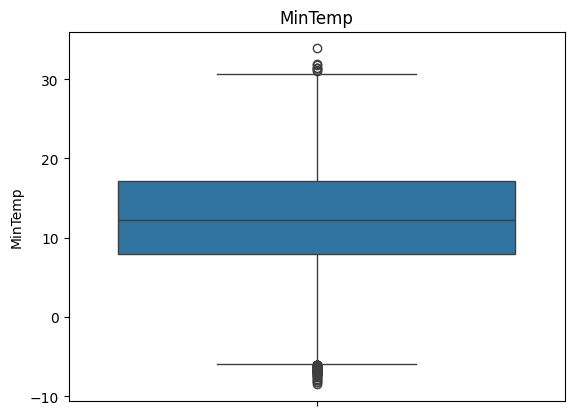

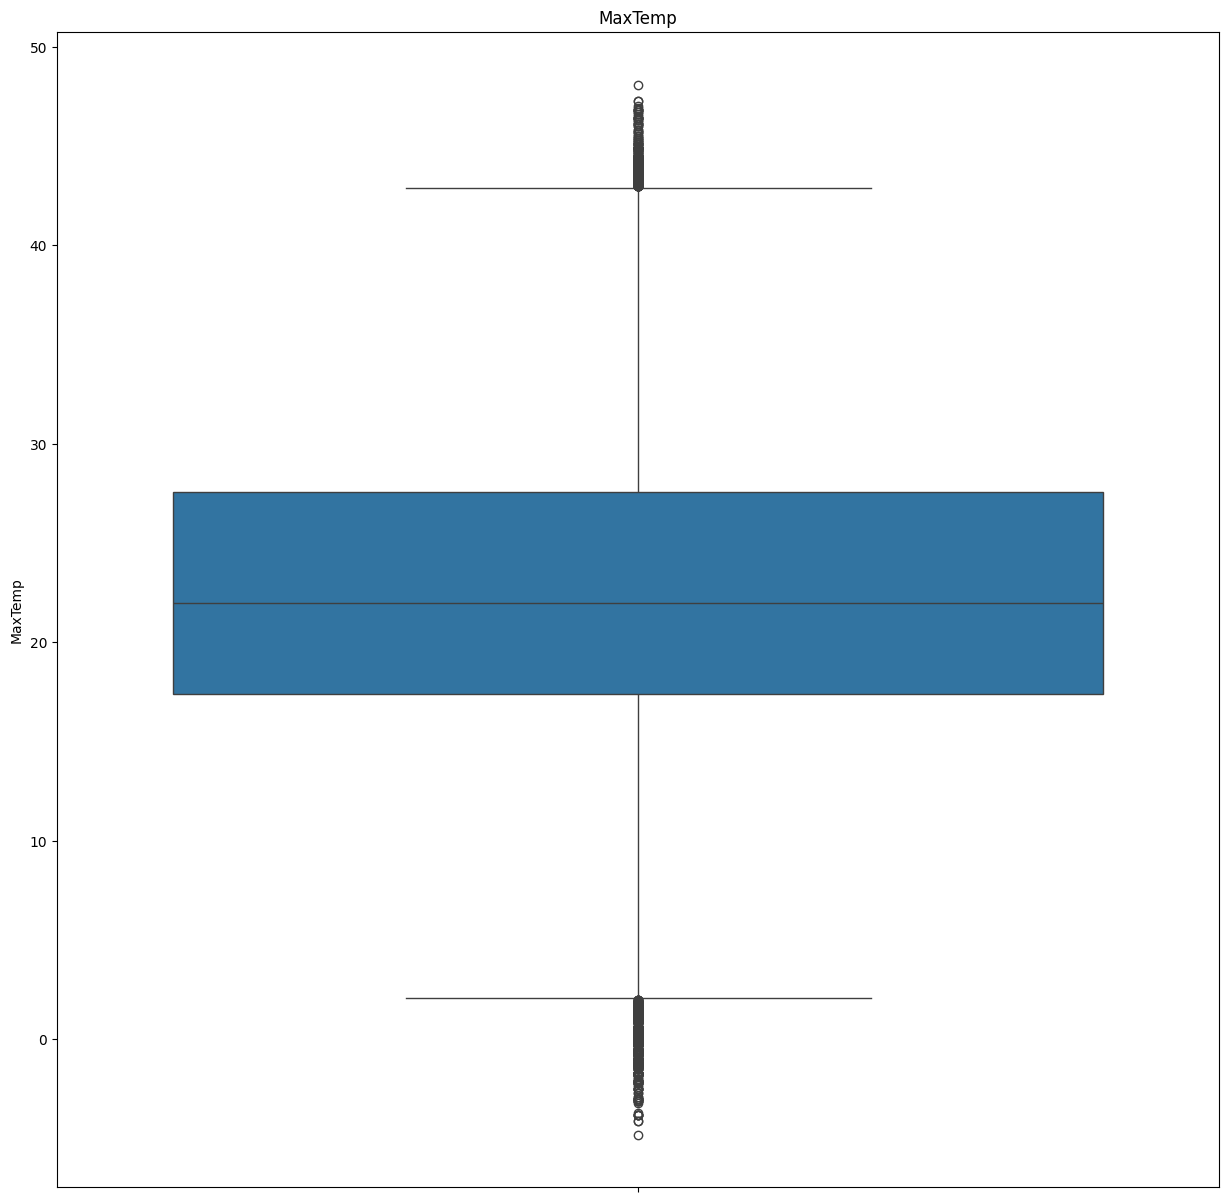

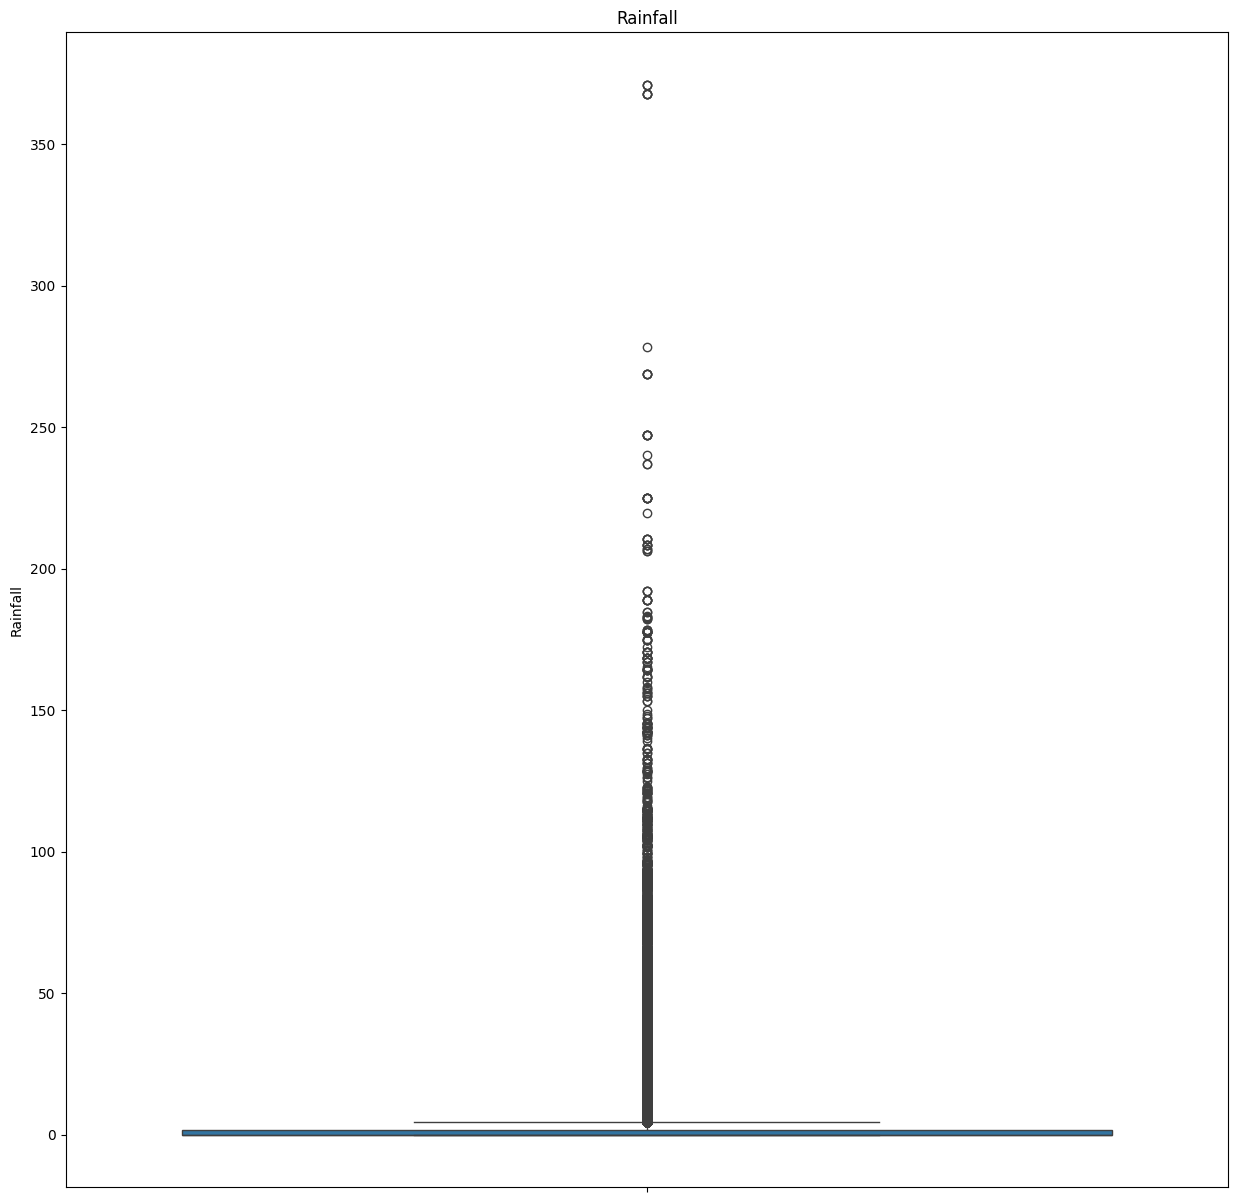

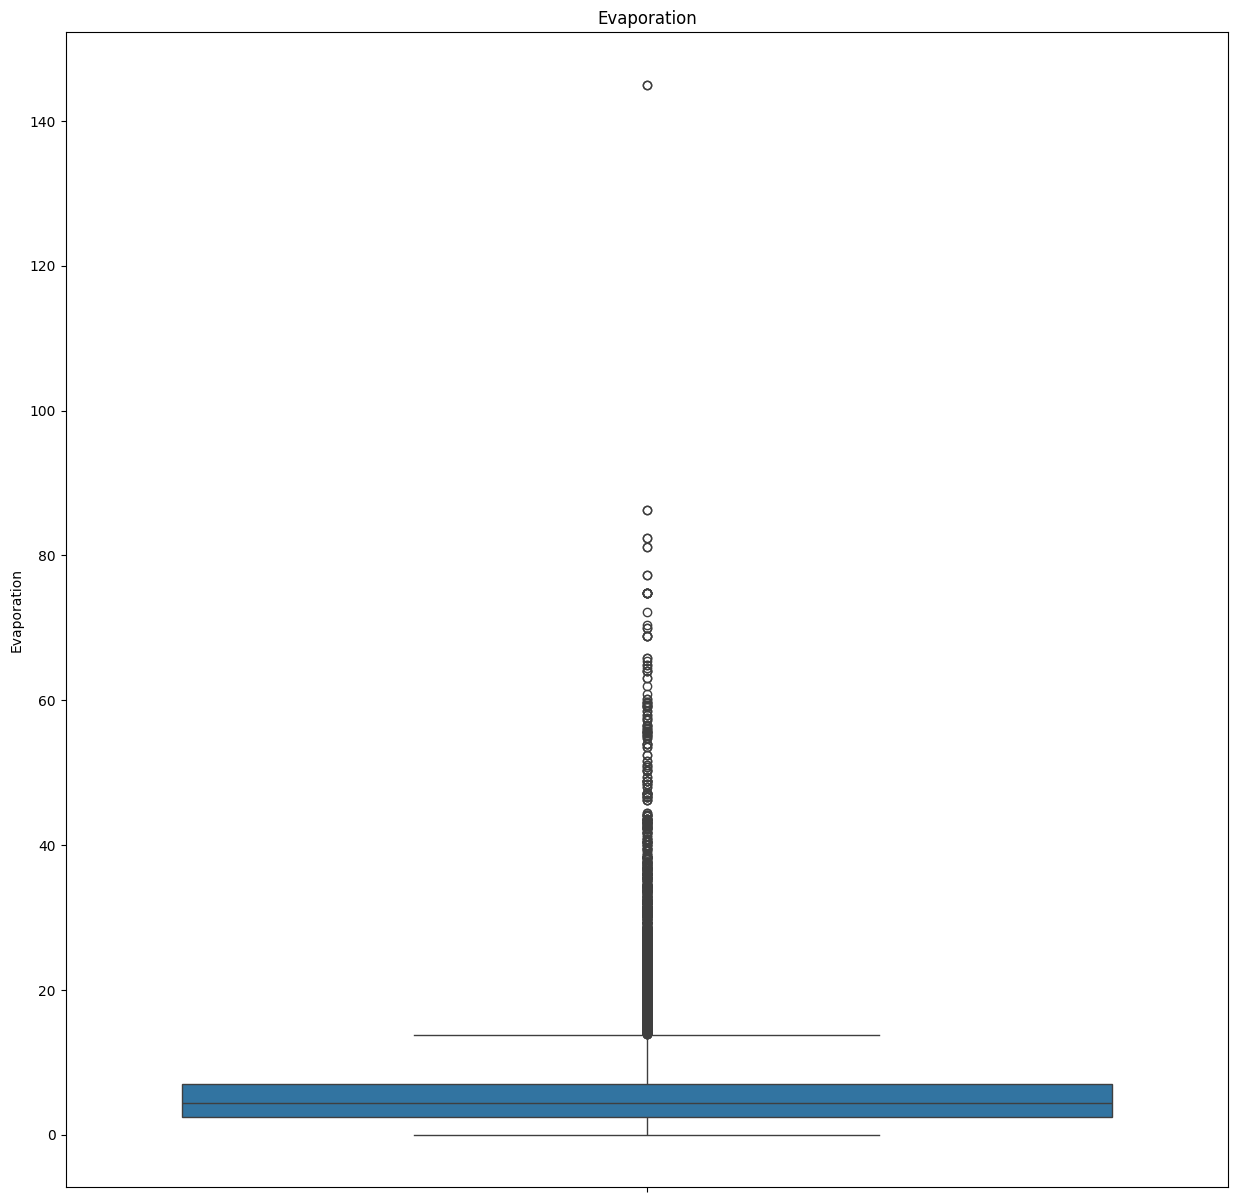

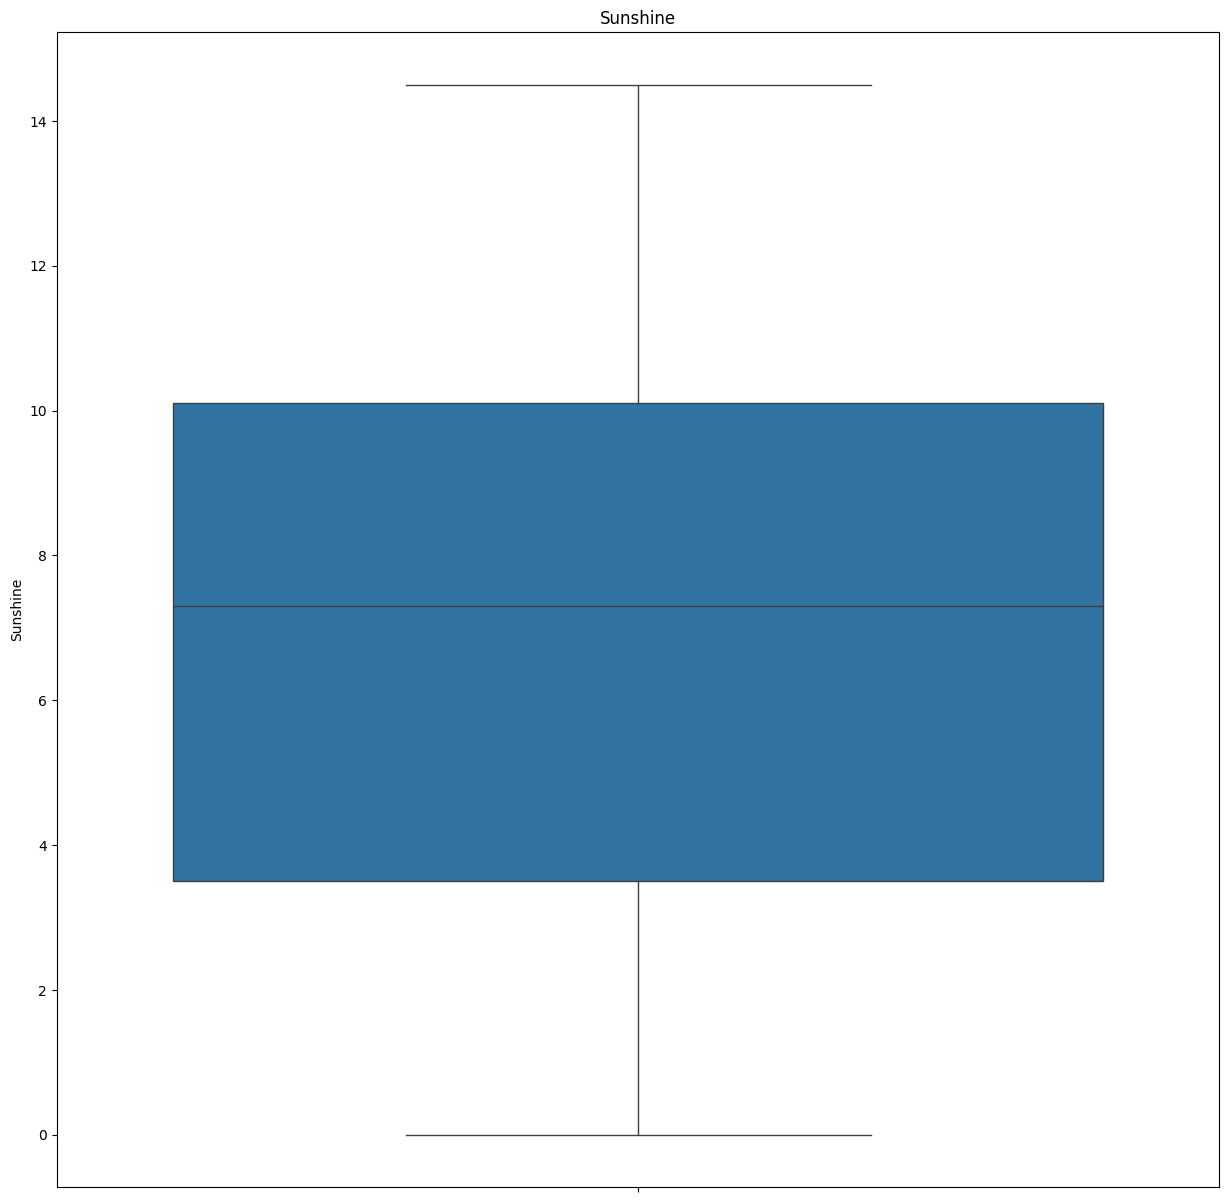

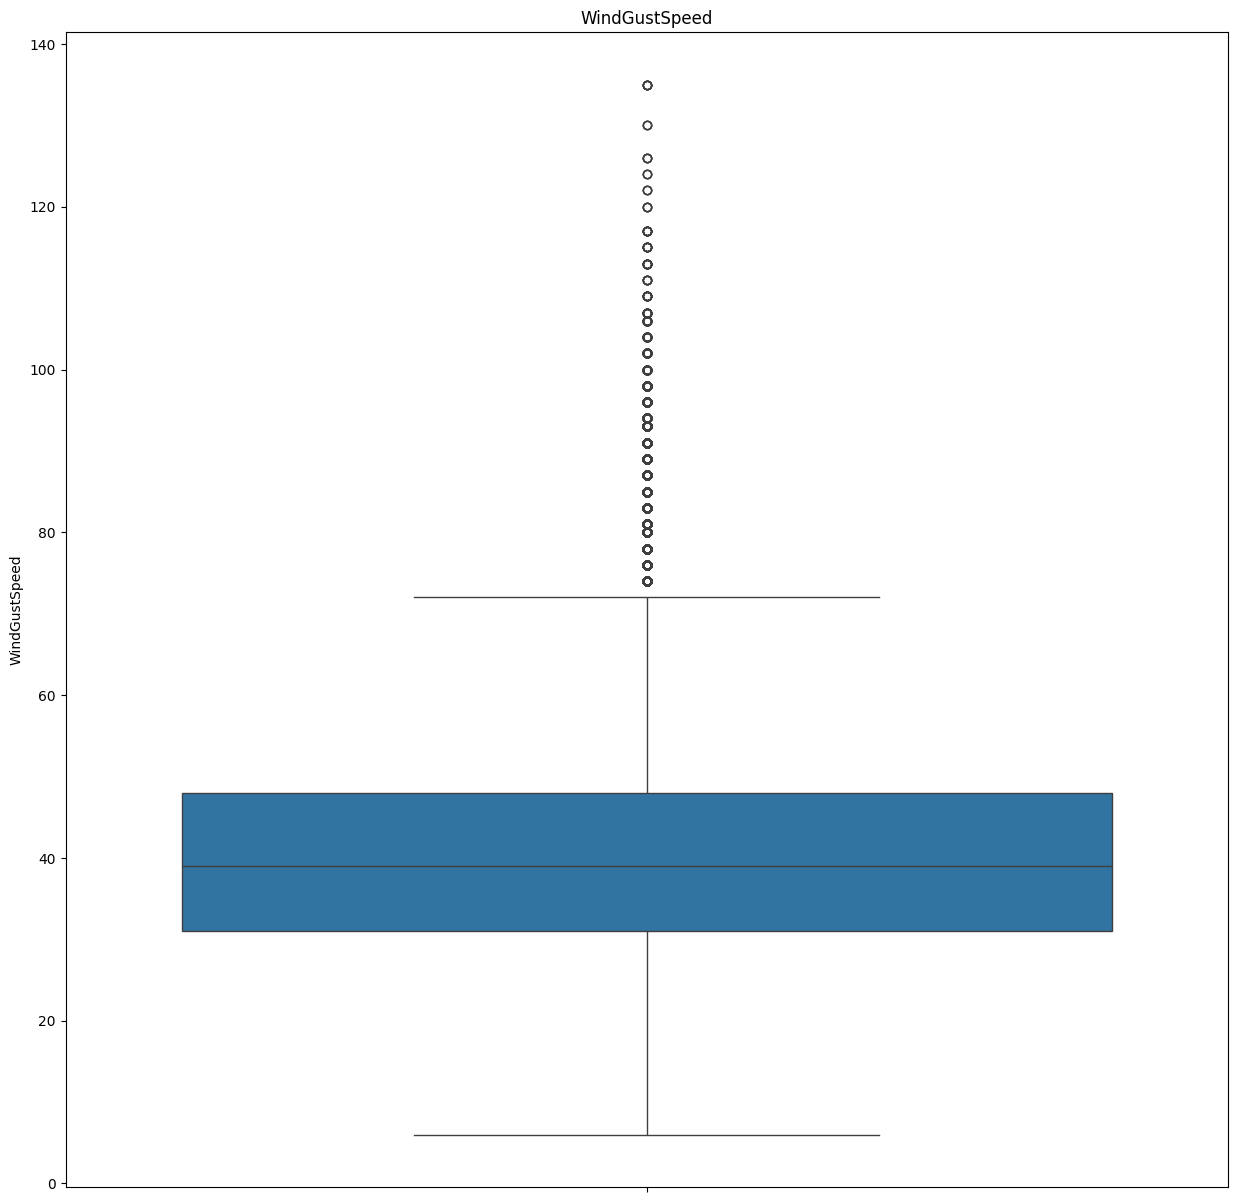

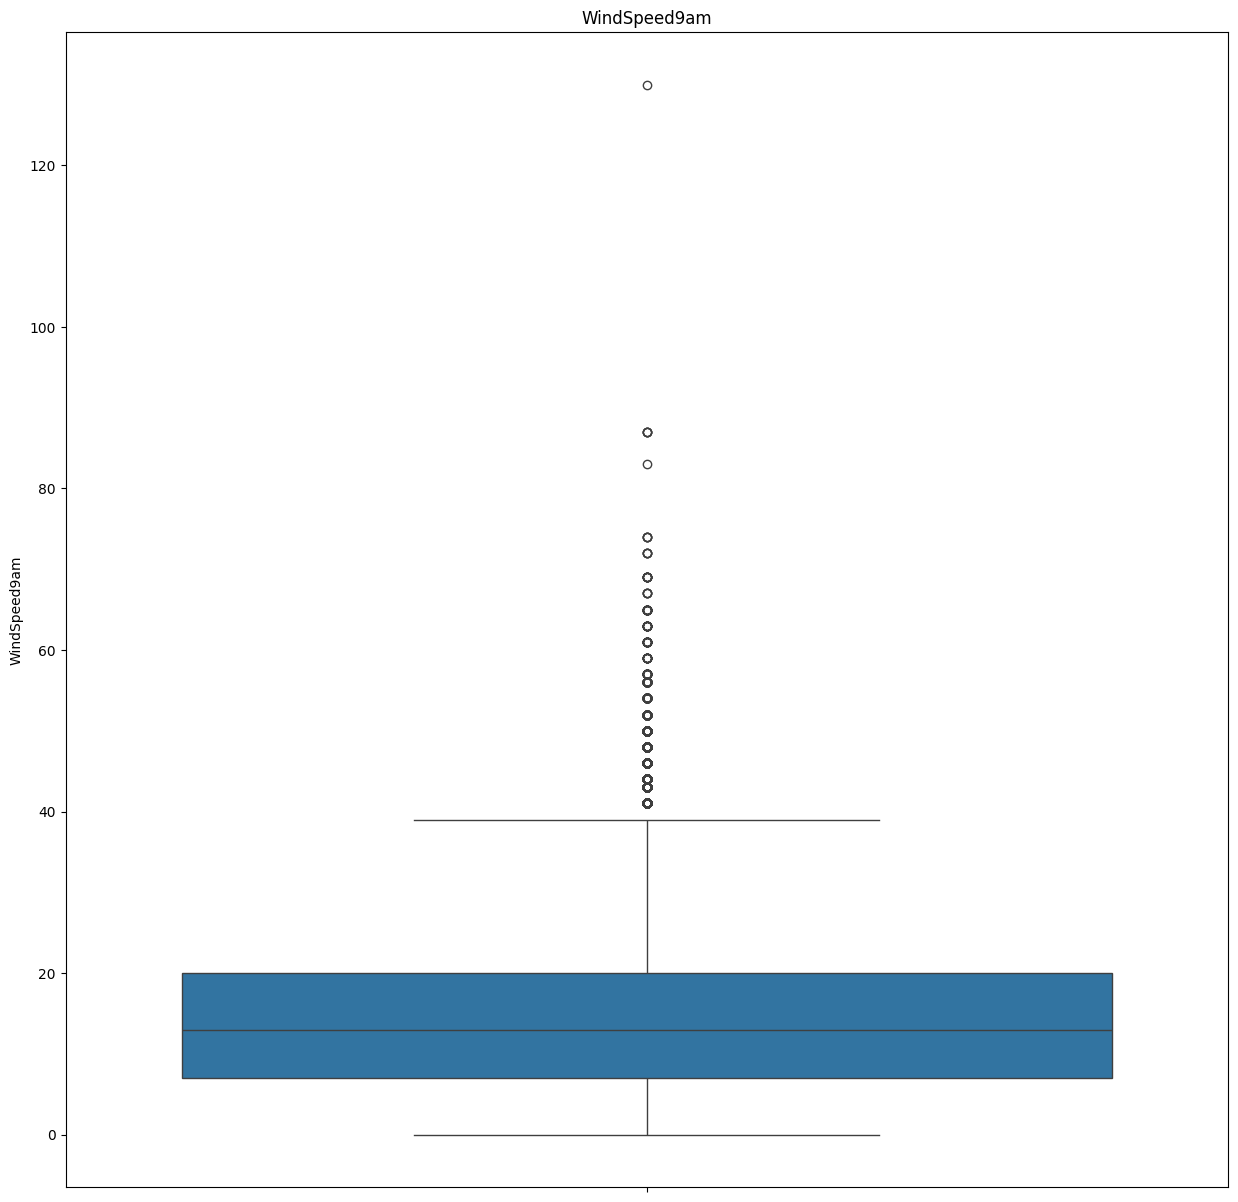

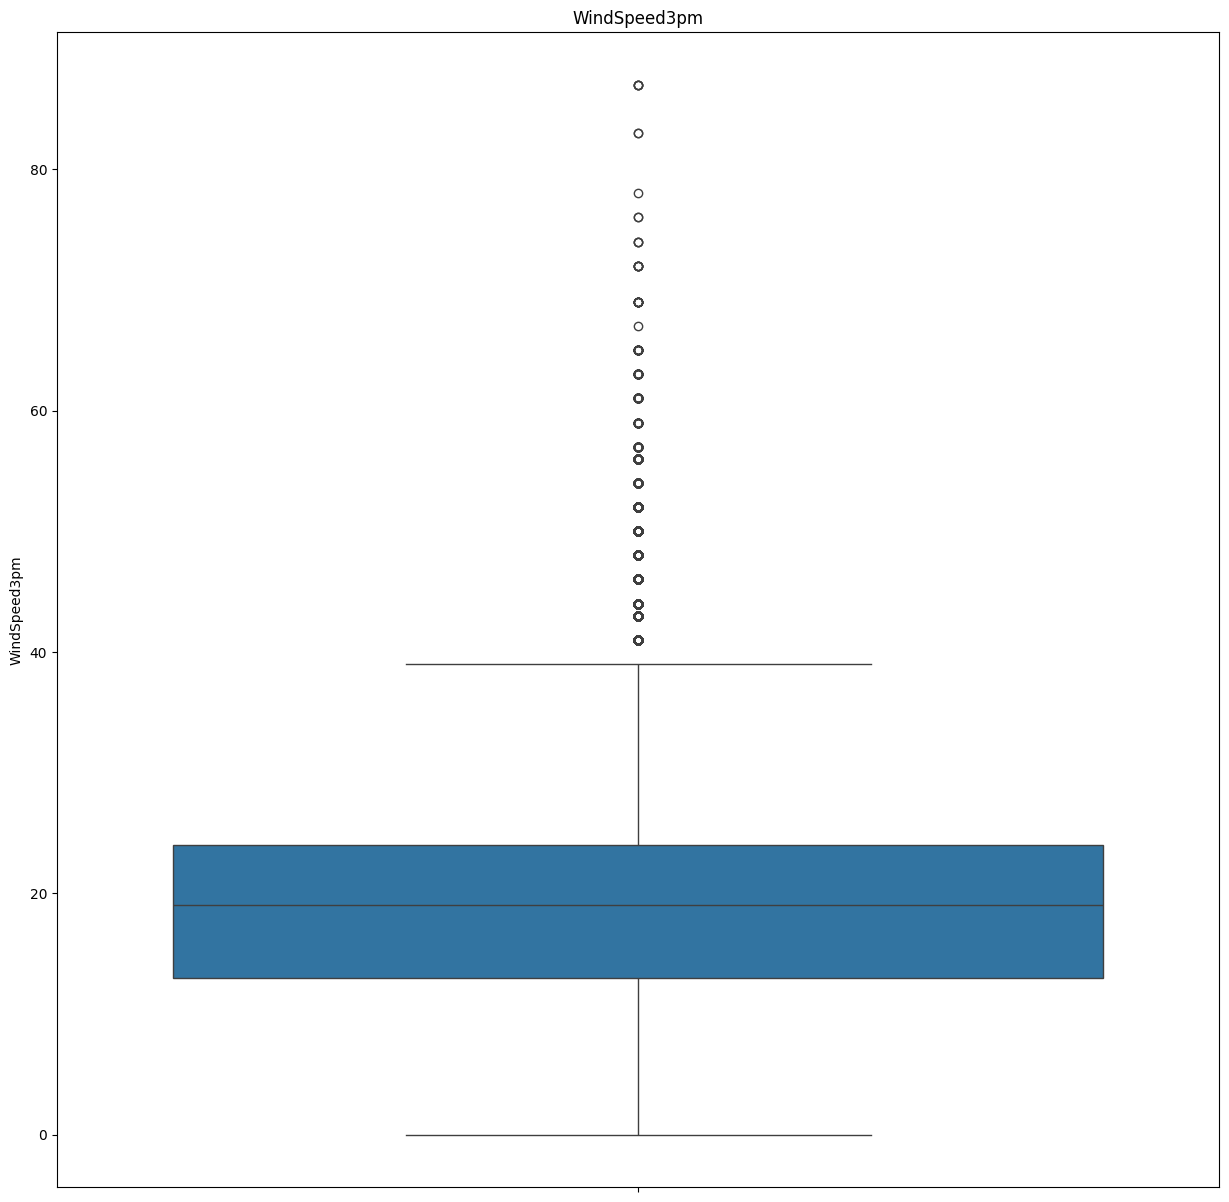

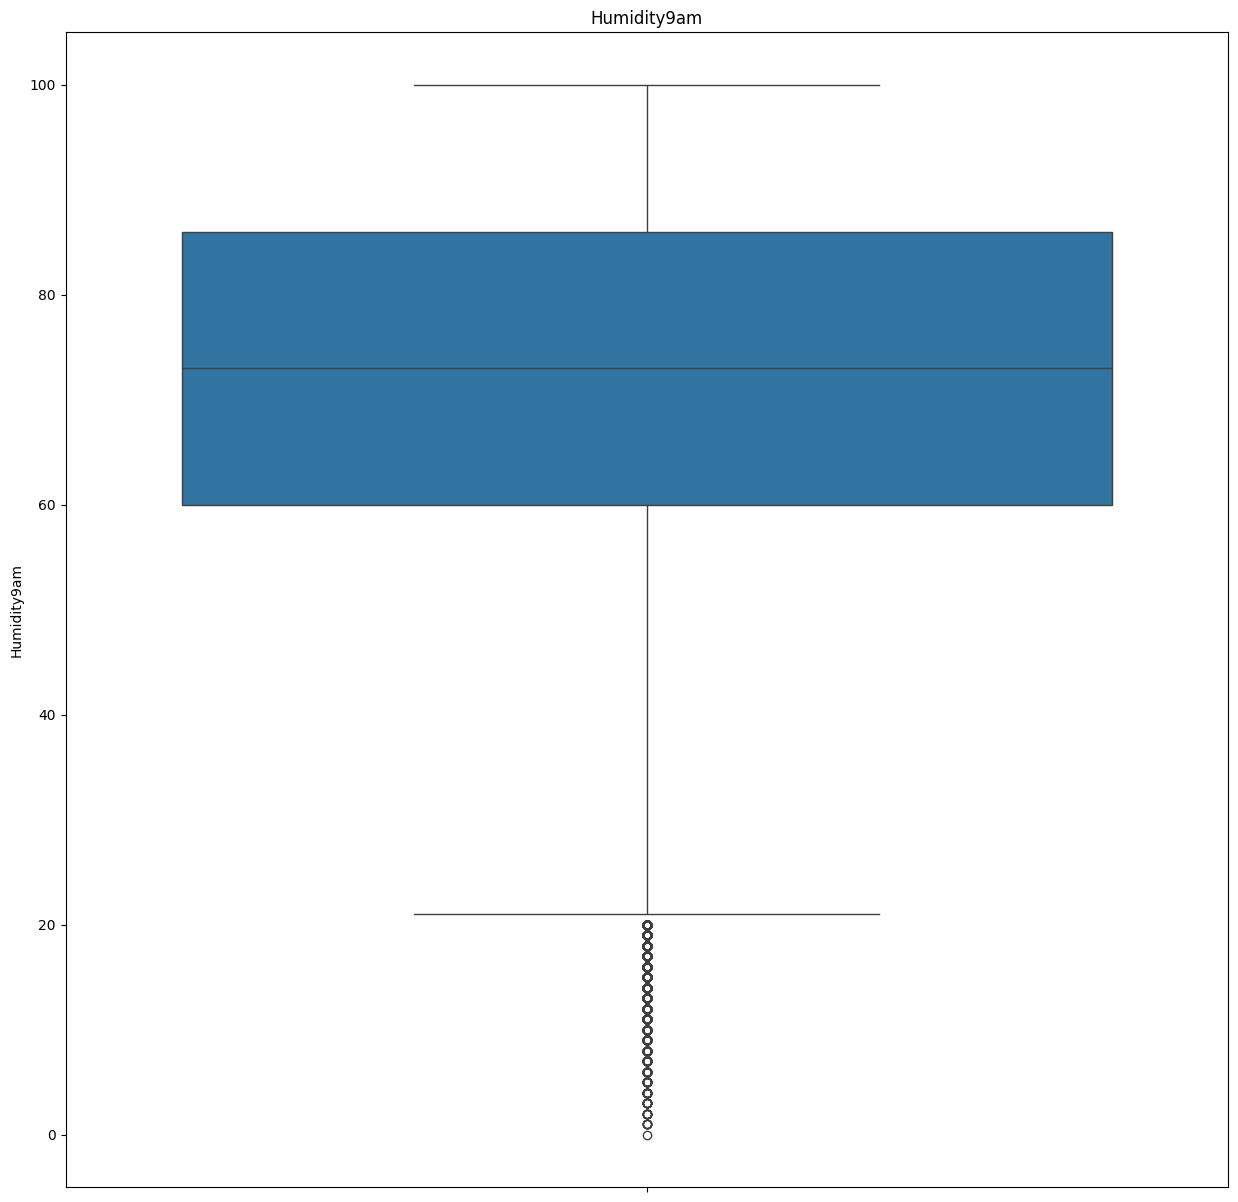

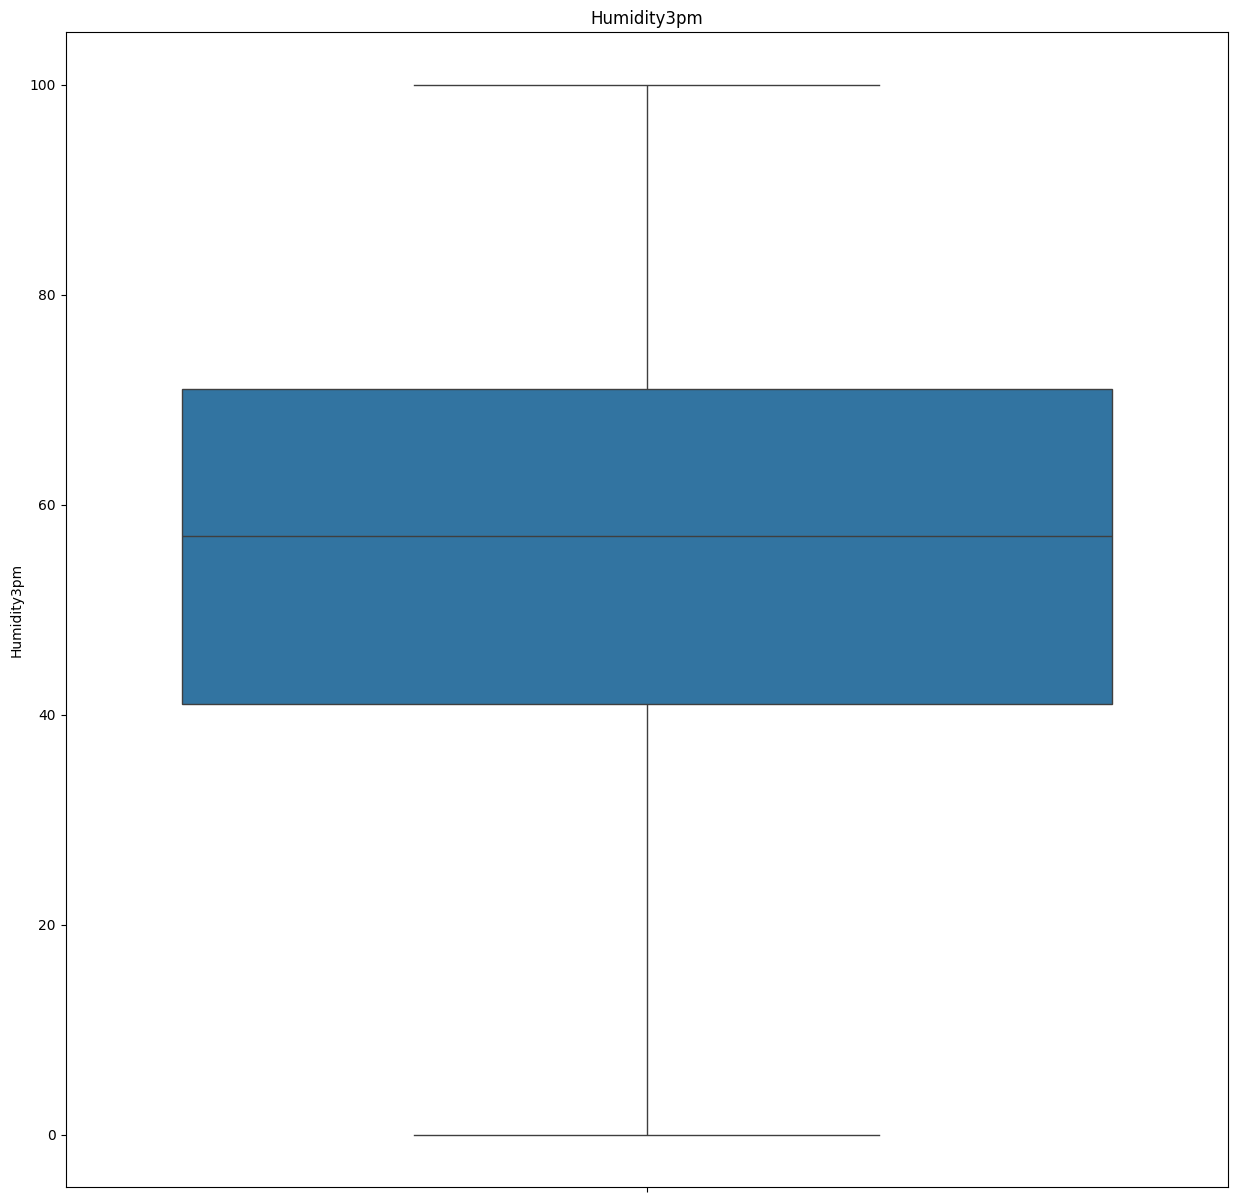

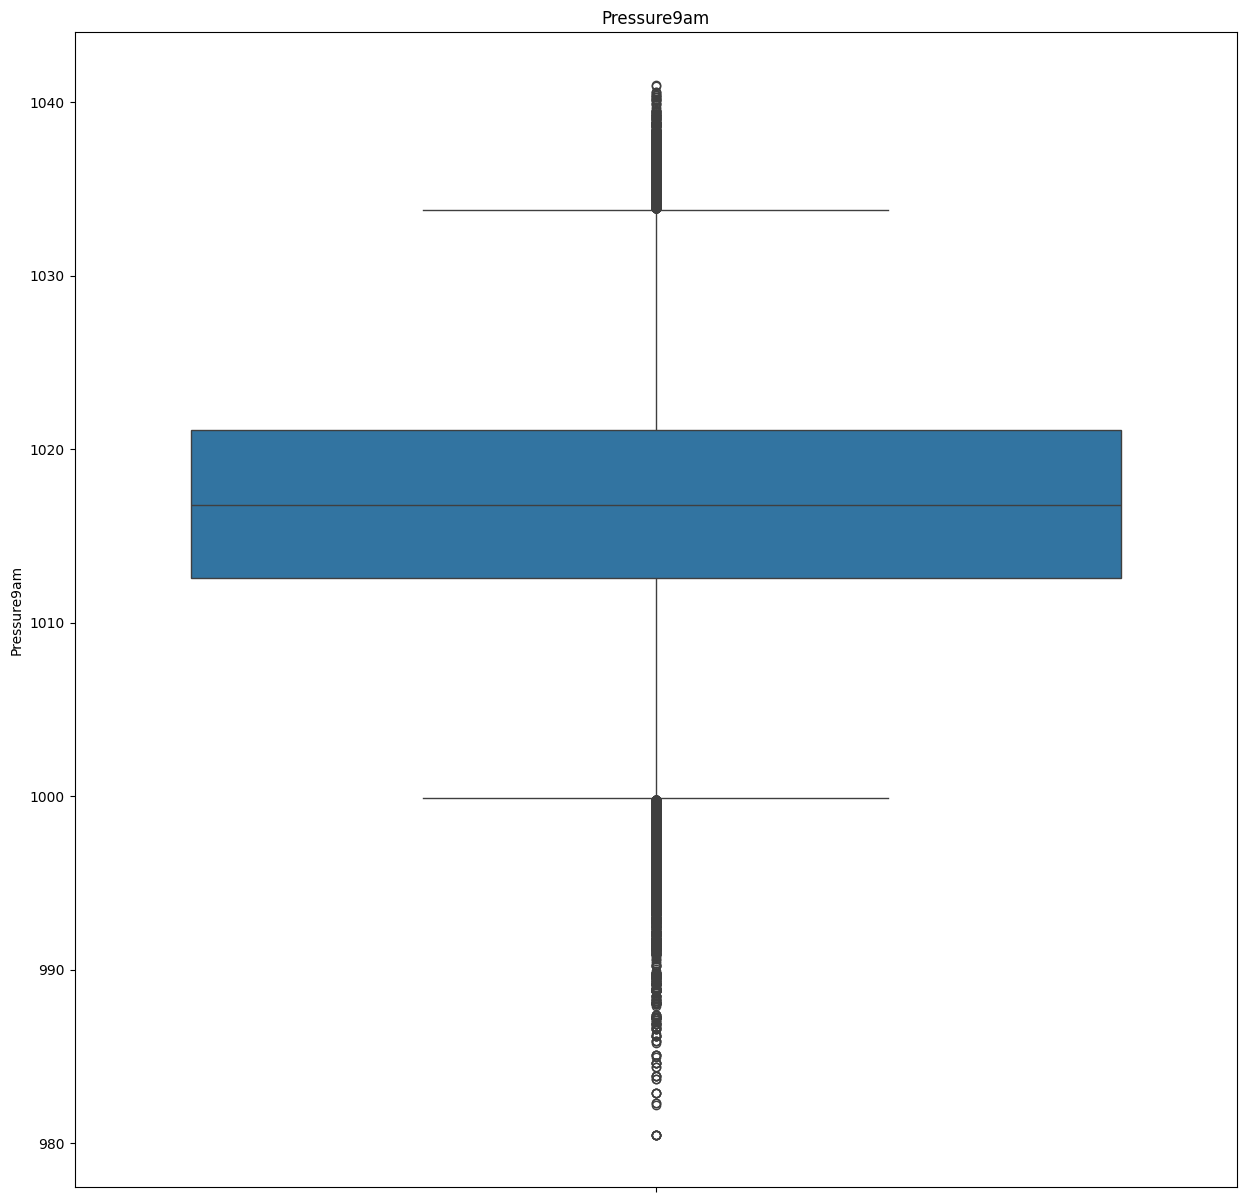

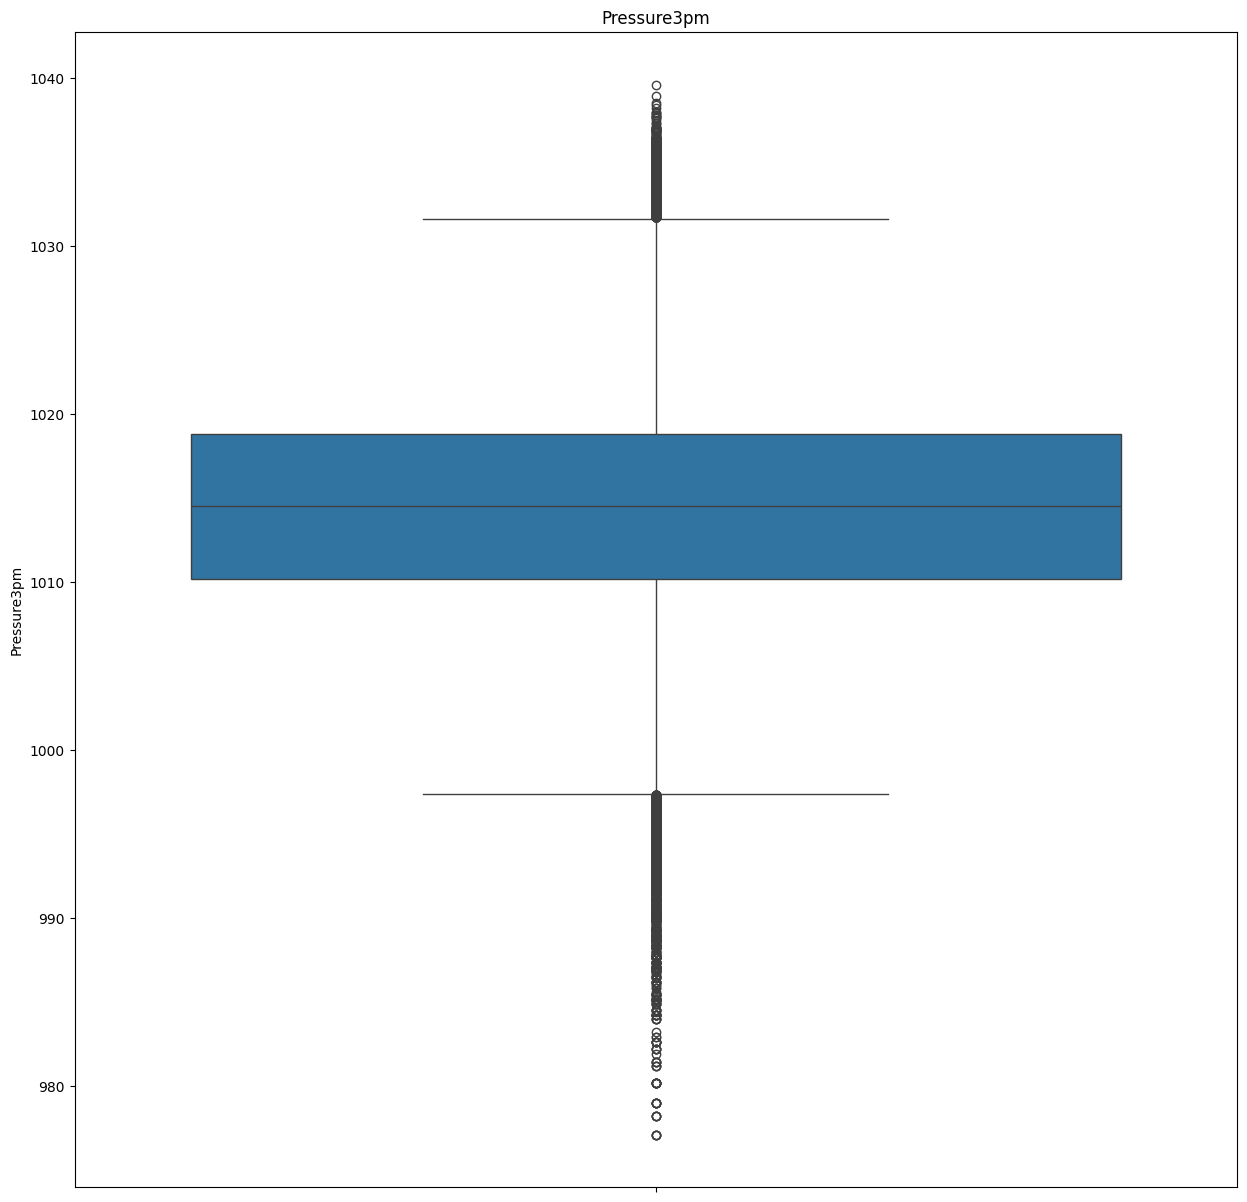

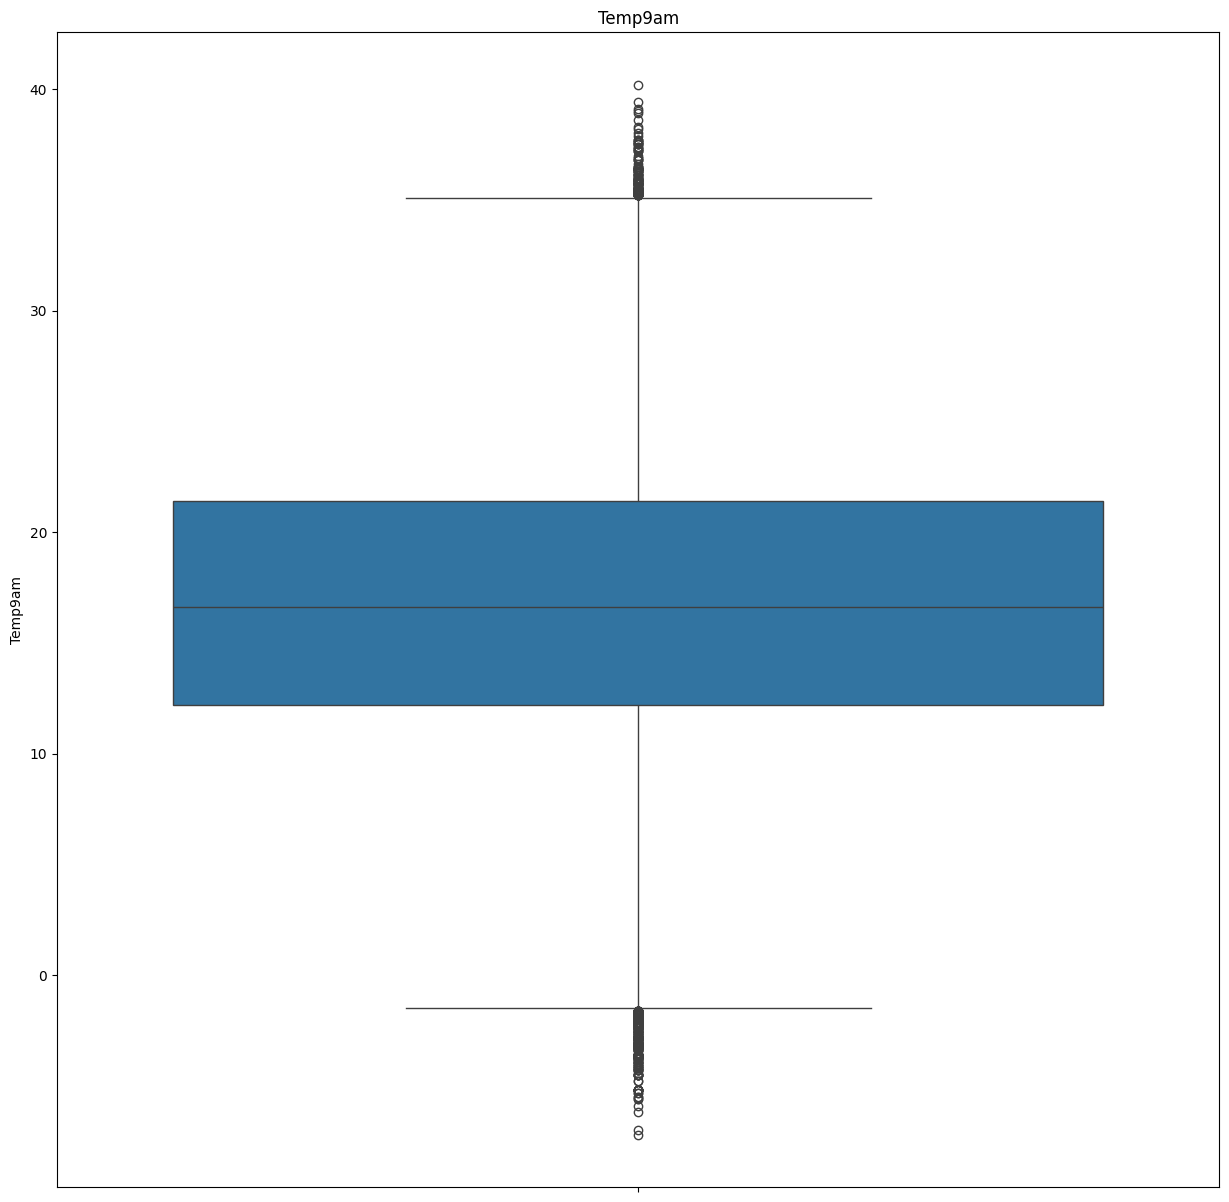

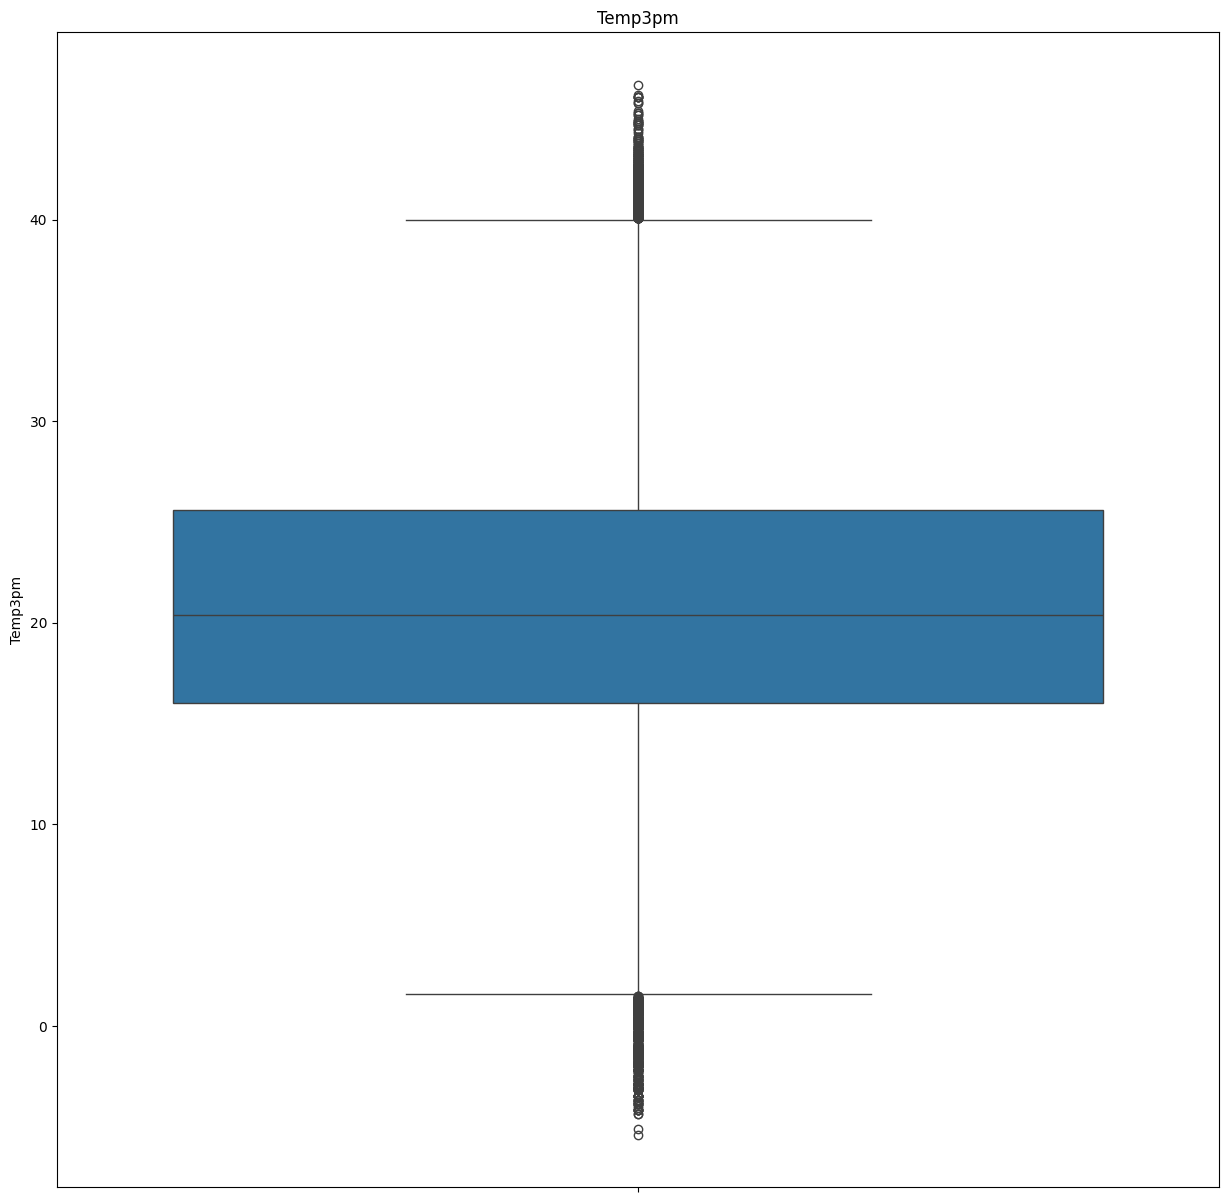

<Figure size 1500x1500 with 0 Axes>

In [112]:
# Outliers will be present in the continuous_feature
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

The approach employed in the paper to address outliers involves utilizing the interquartile range method.

In [113]:
# Let's look at the continuous features we have
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [114]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.9 30.900000000000002


In [115]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [116]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.0999999999999943 42.900000000000006


In [117]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [118]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.7 4.5


In [119]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [120]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.5 13.899999999999999


In [121]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [122]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [123]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [124]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-12.5 39.5


In [125]:

df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [126]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [127]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [128]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

21.0 125.0


In [129]:

df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [130]:

IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

999.85 1033.85


In [131]:

df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [132]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

997.3000000000002 1031.6999999999998


In [133]:

df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [134]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.5999999999999996 35.199999999999996


In [135]:

df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [136]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.5999999999999979 40.0


In [137]:

df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

let's look at the new boxplot

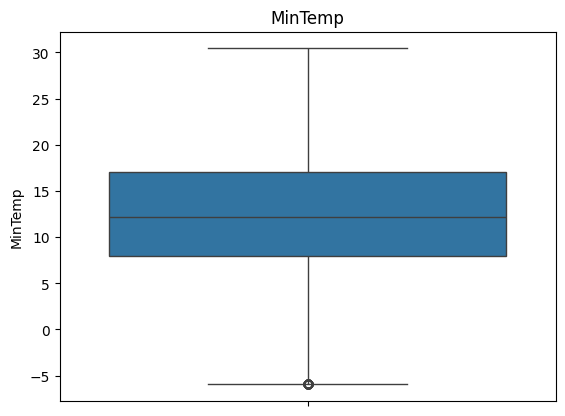

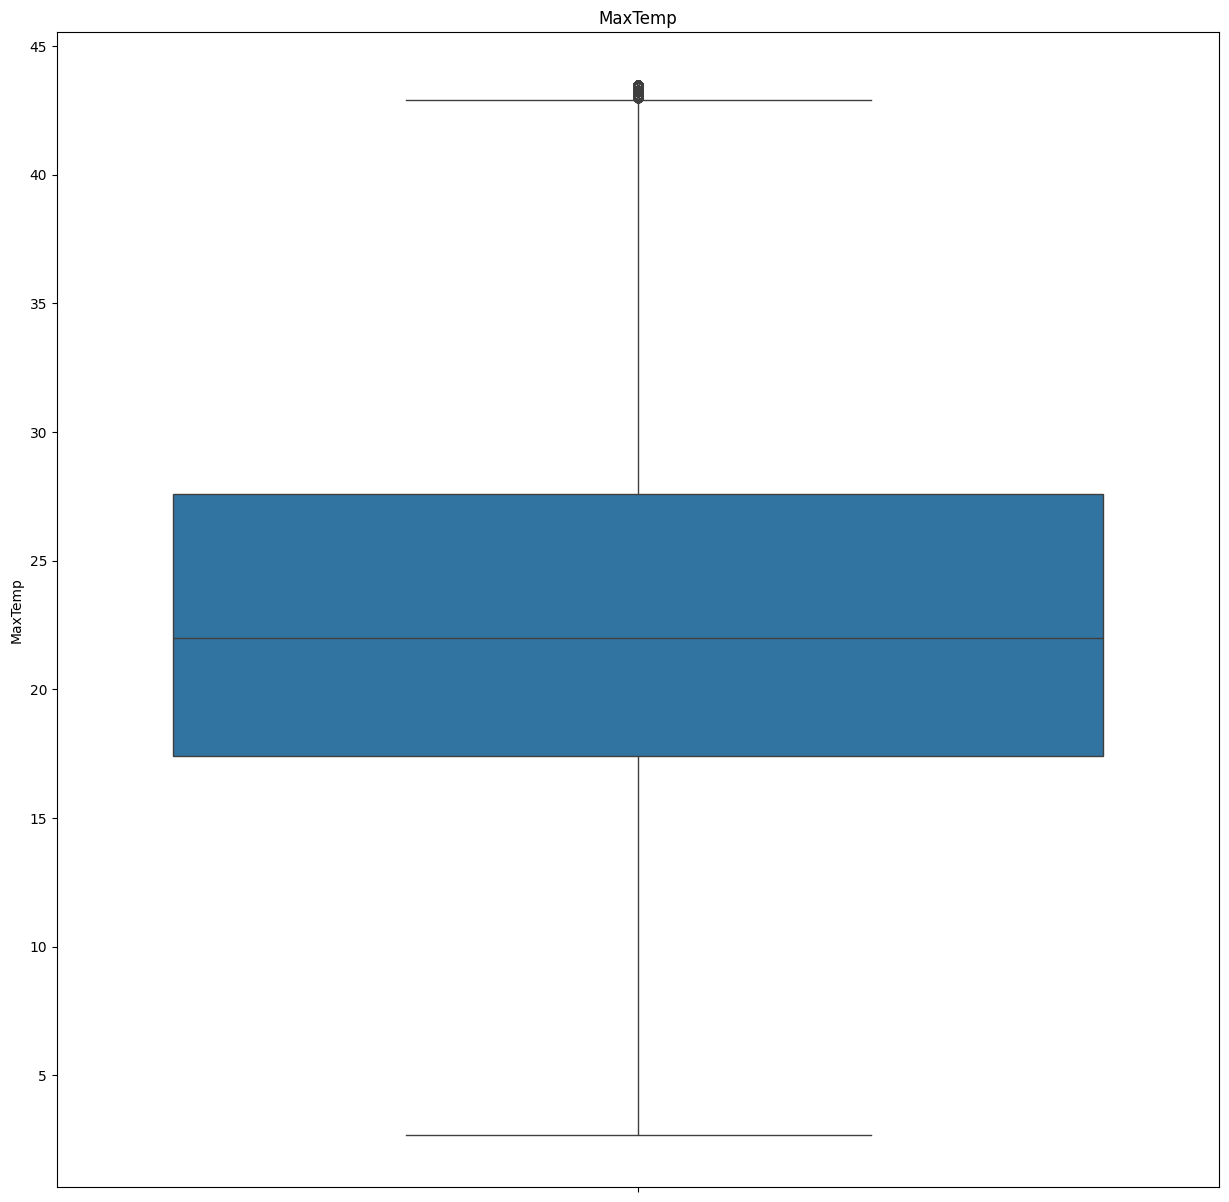

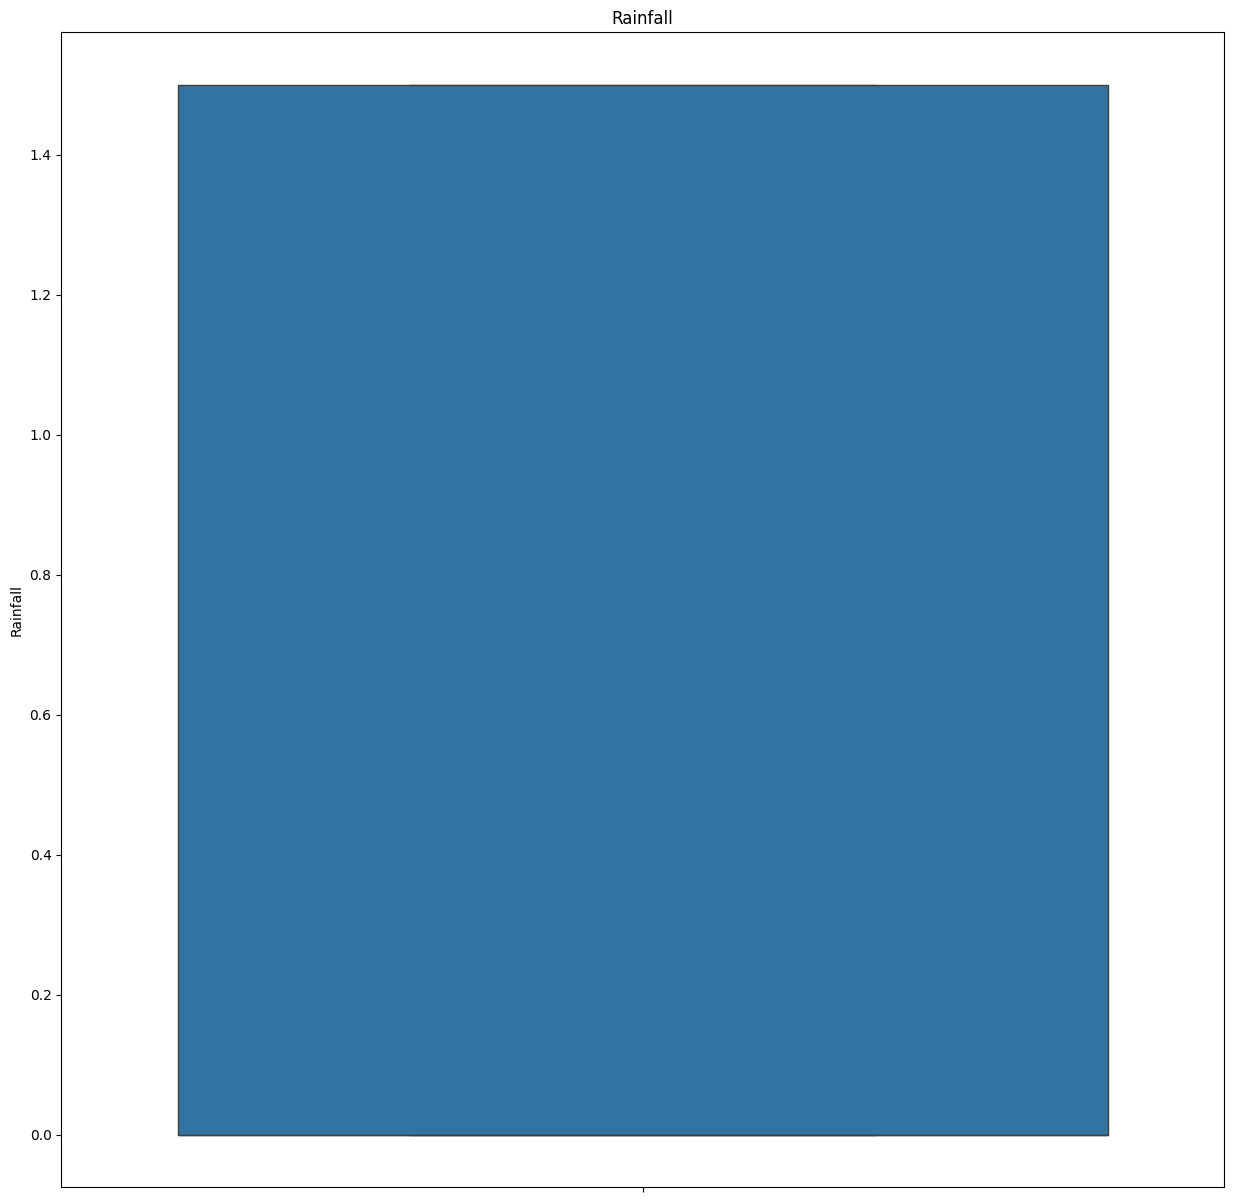

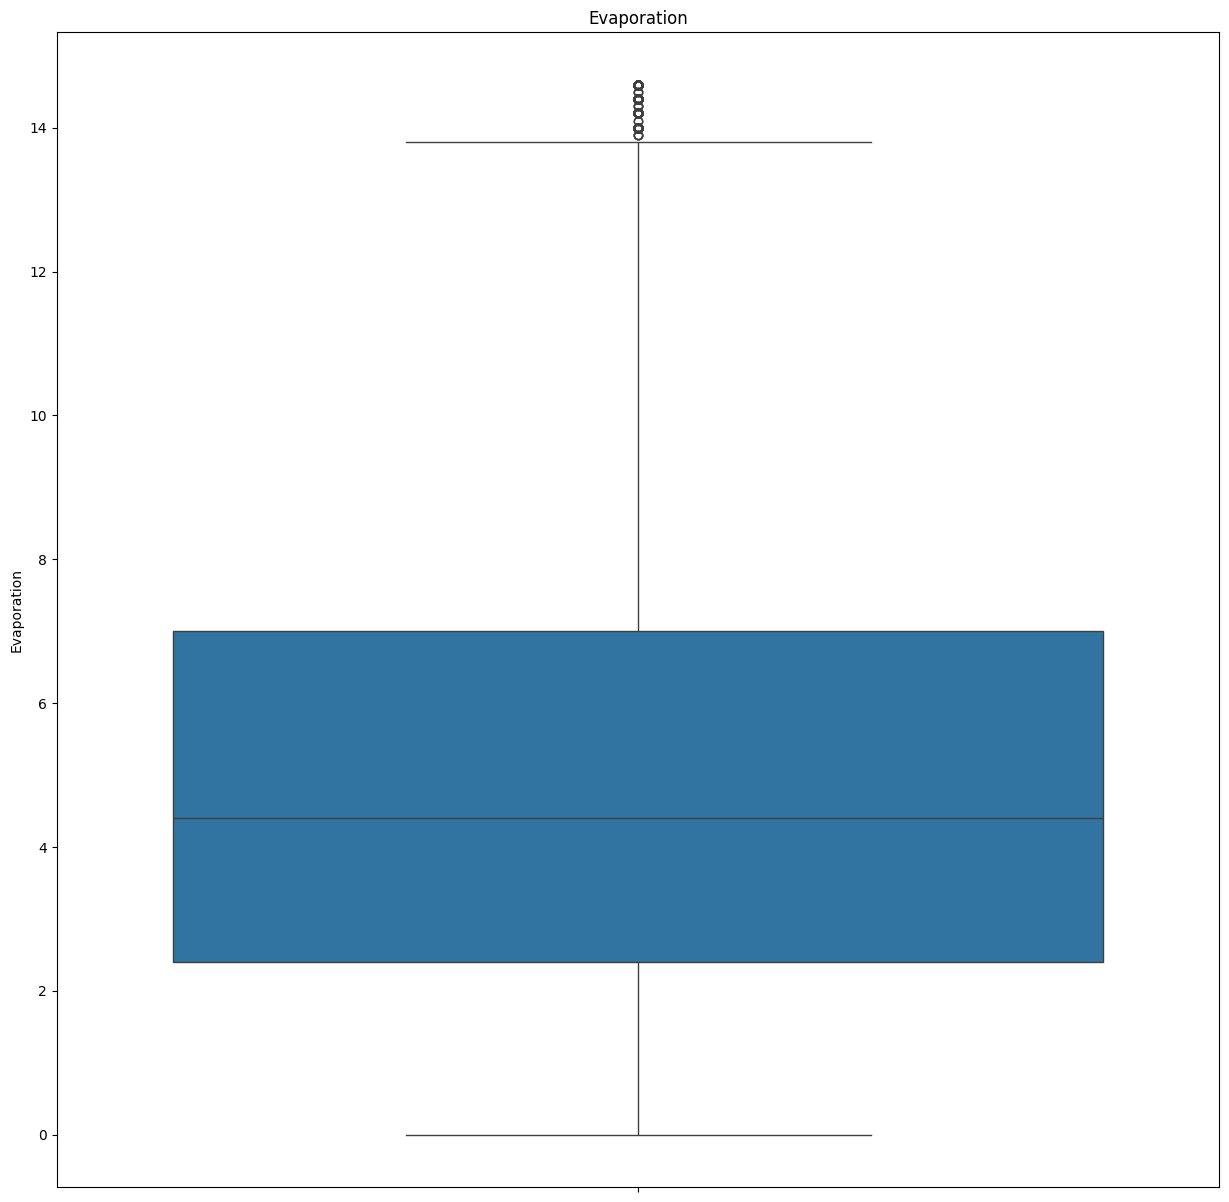

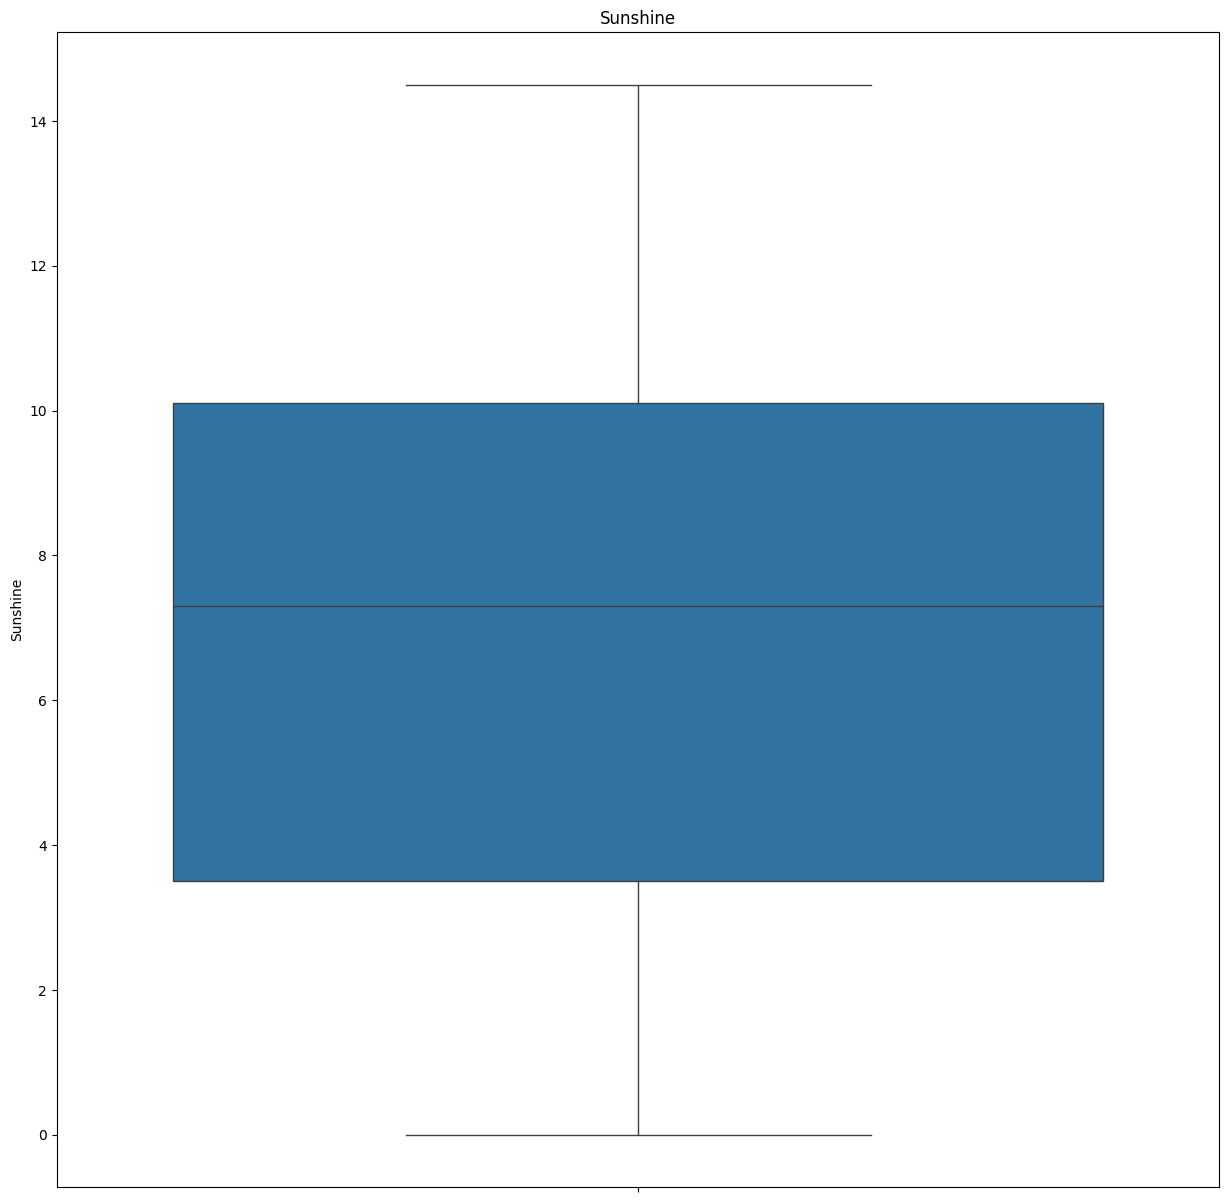

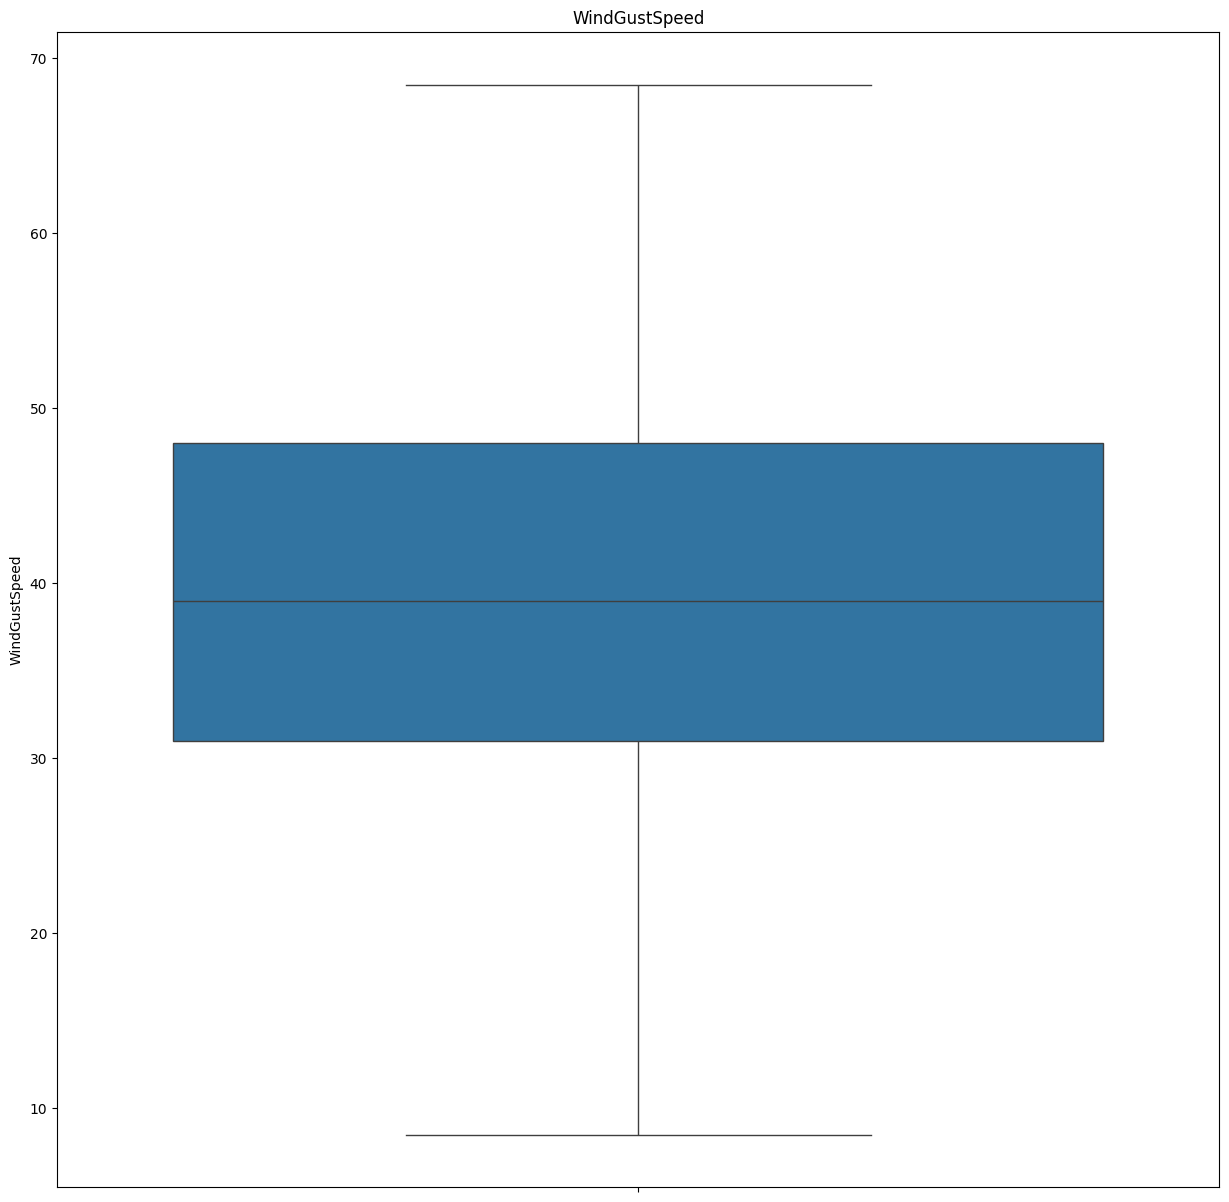

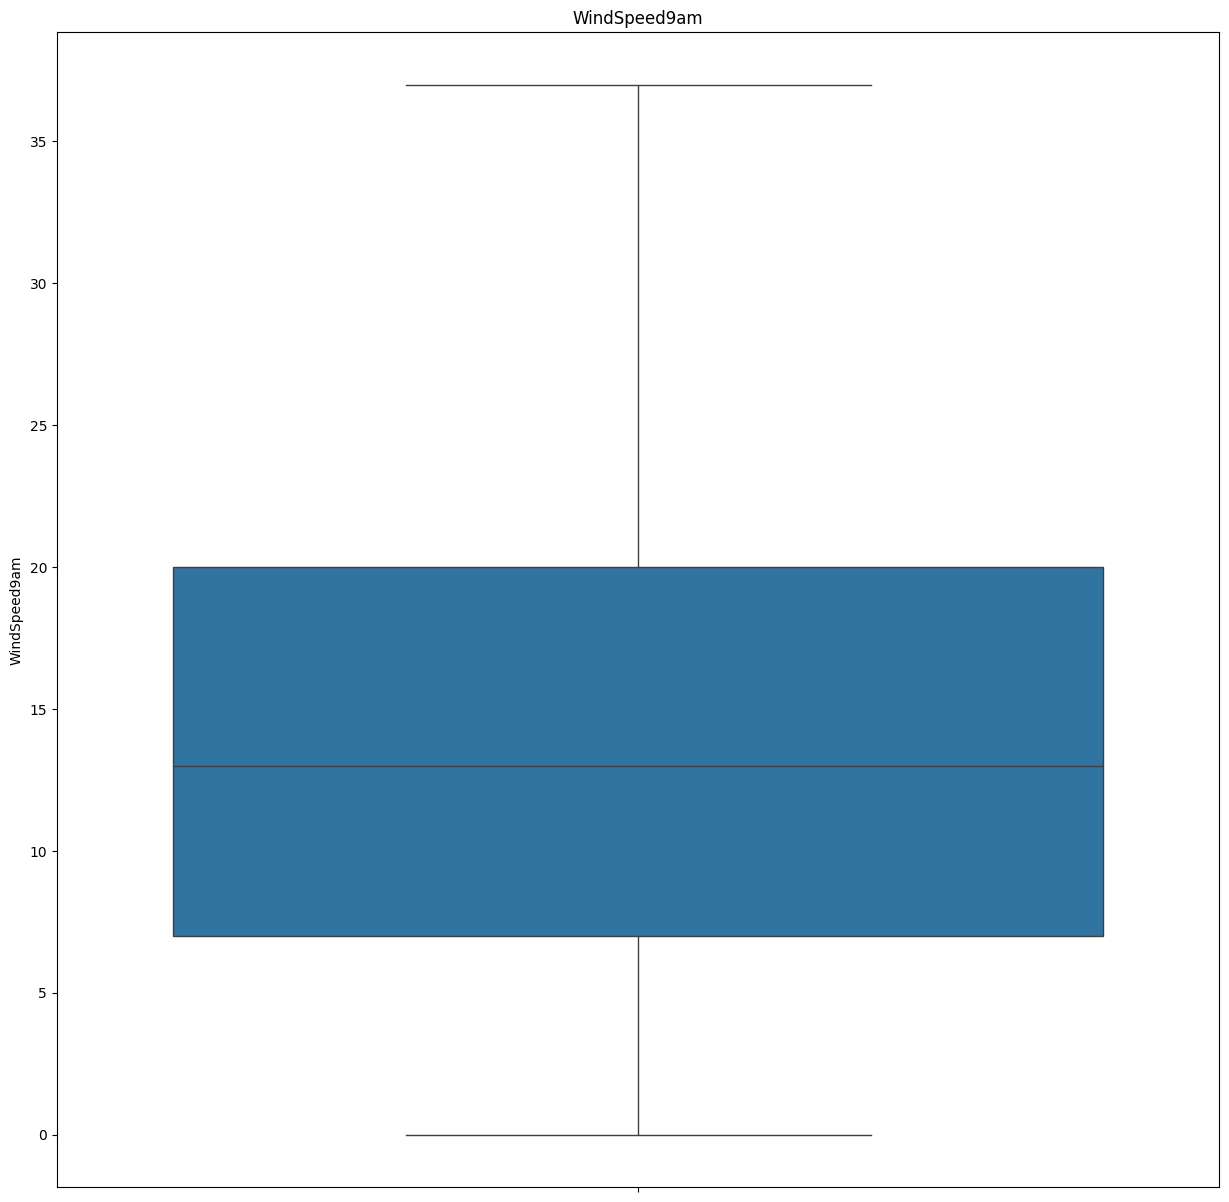

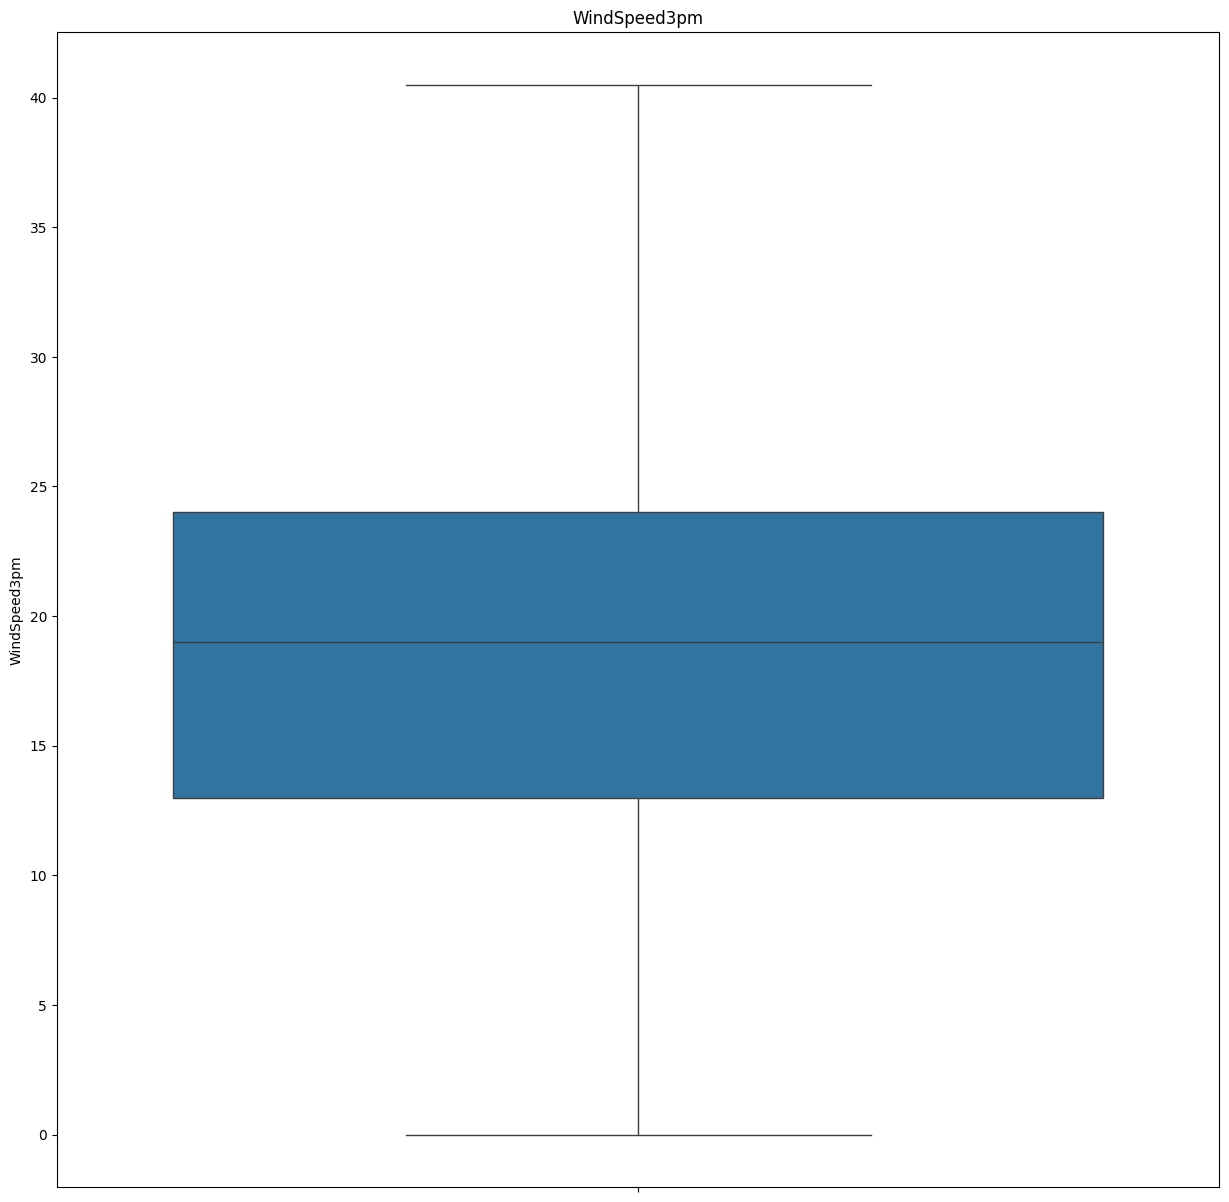

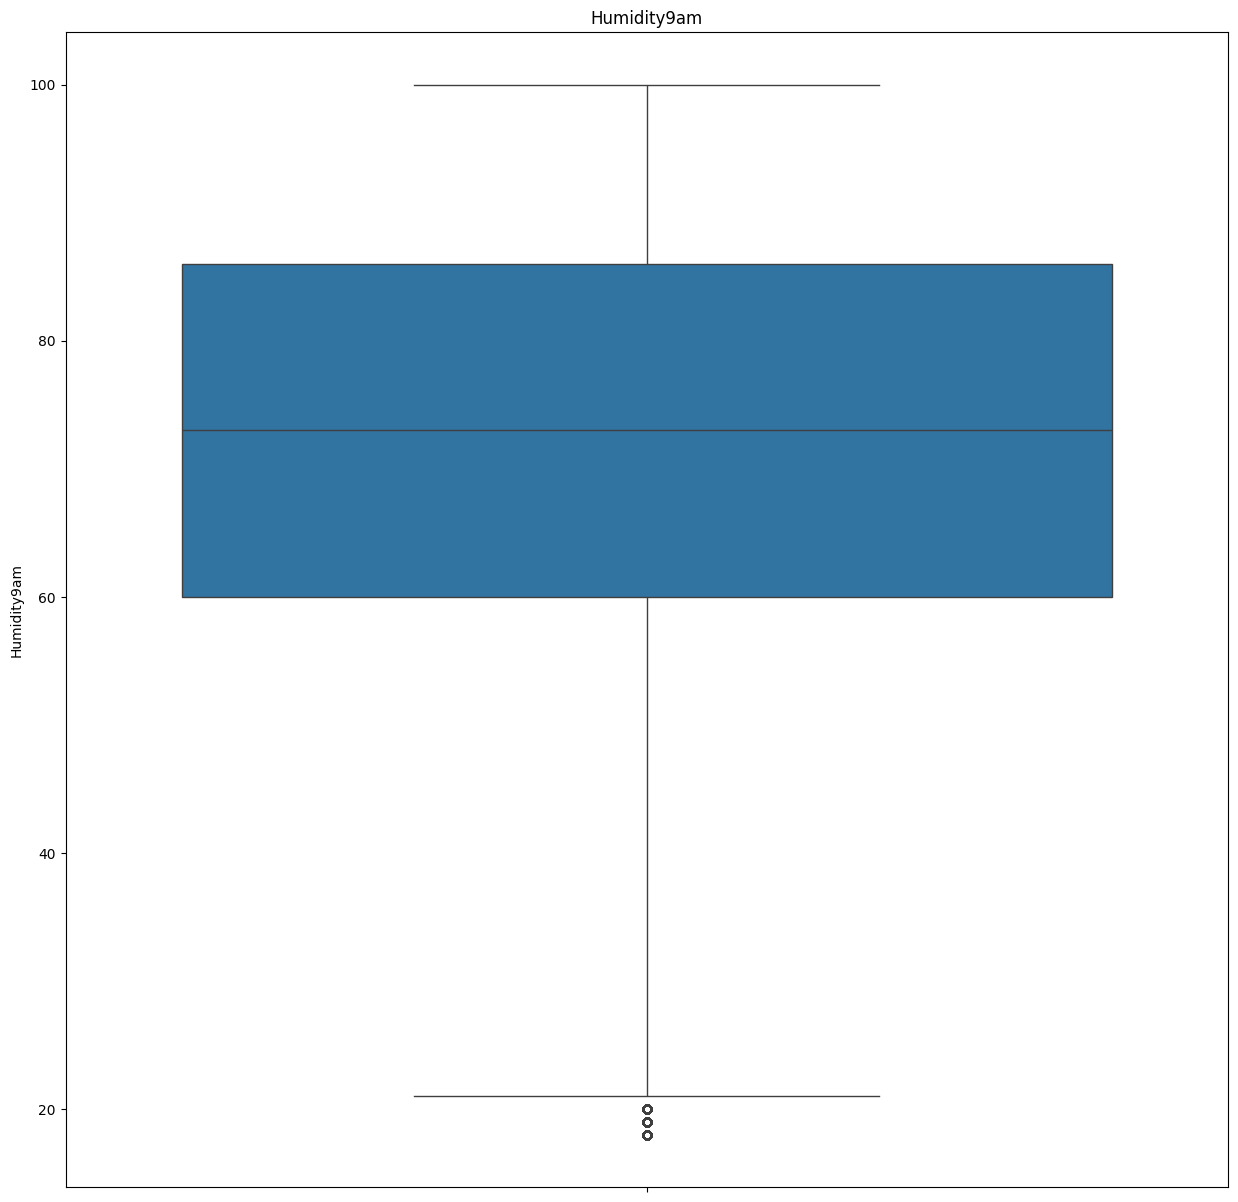

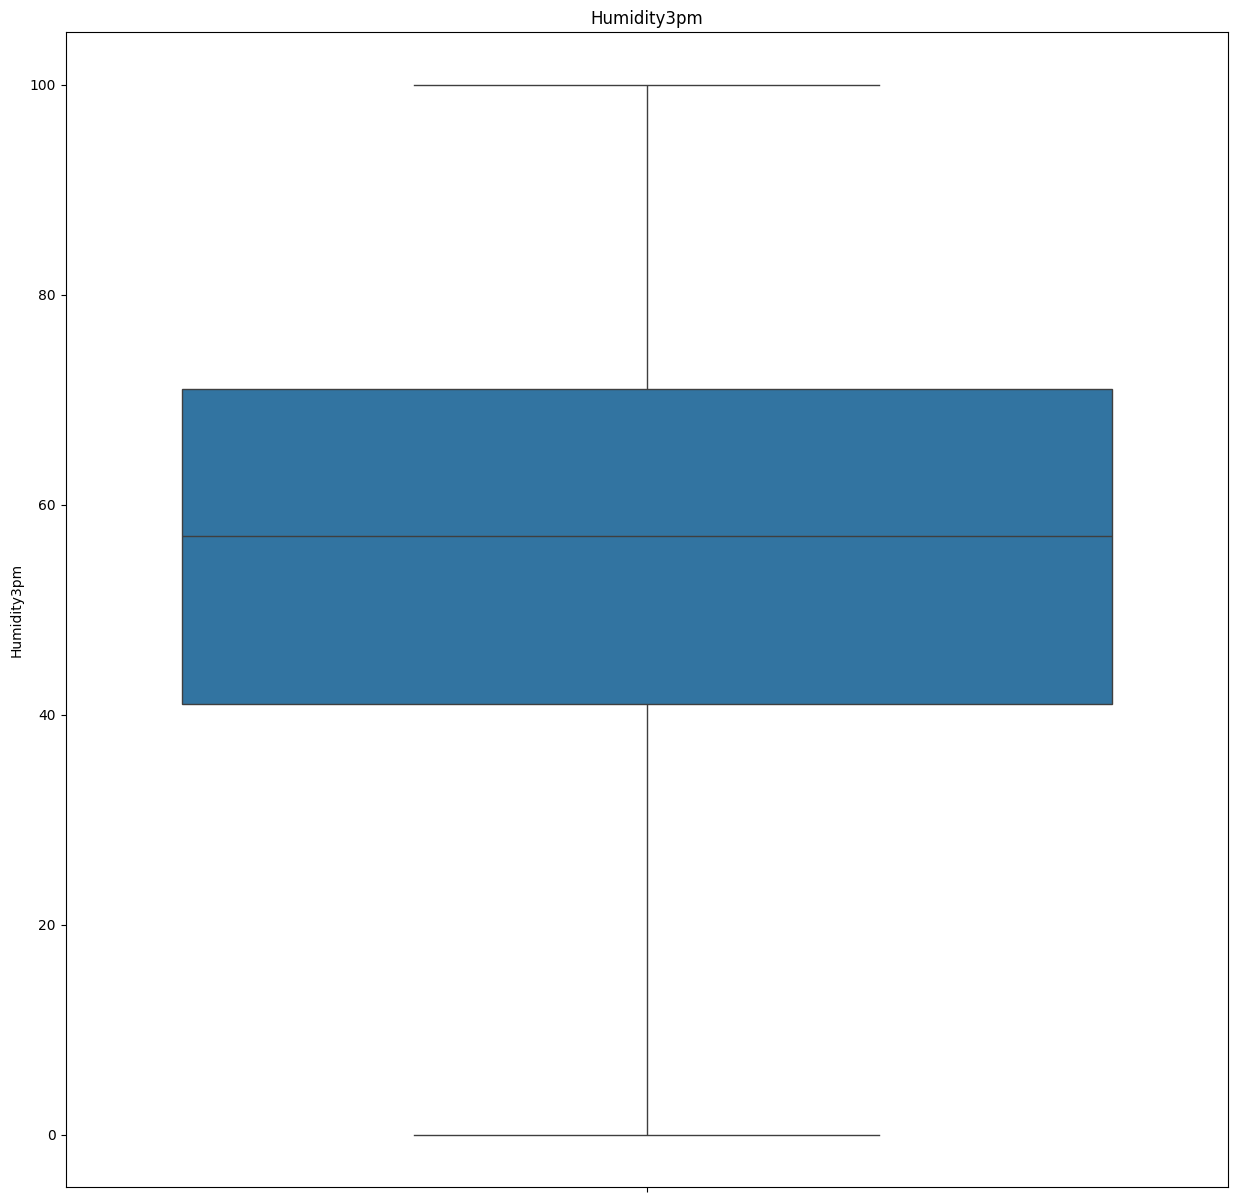

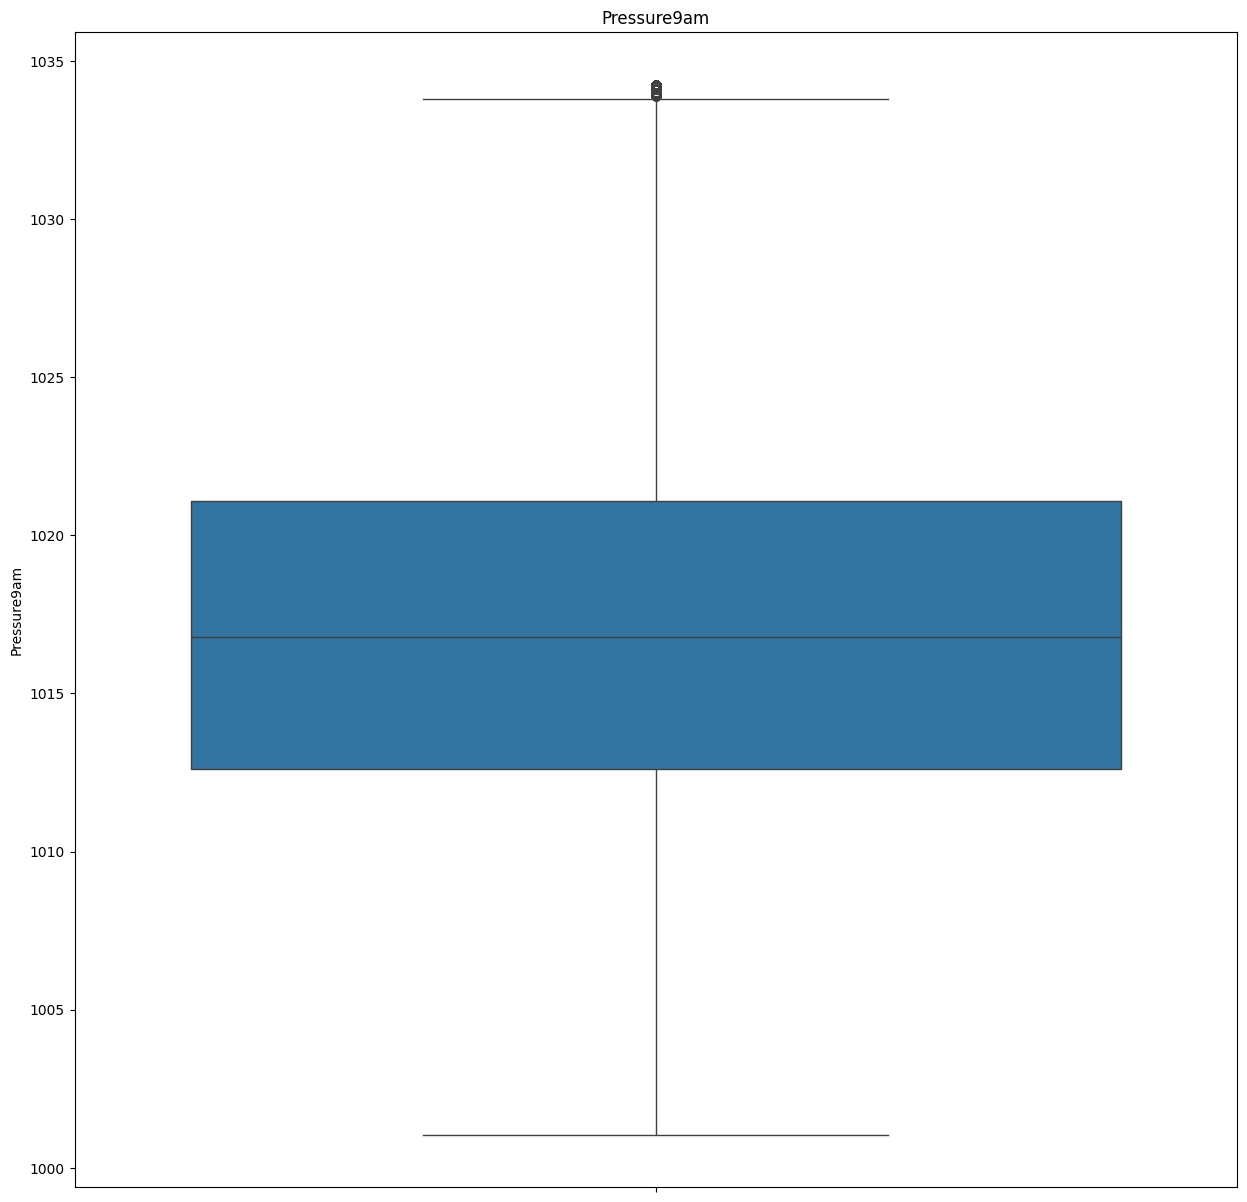

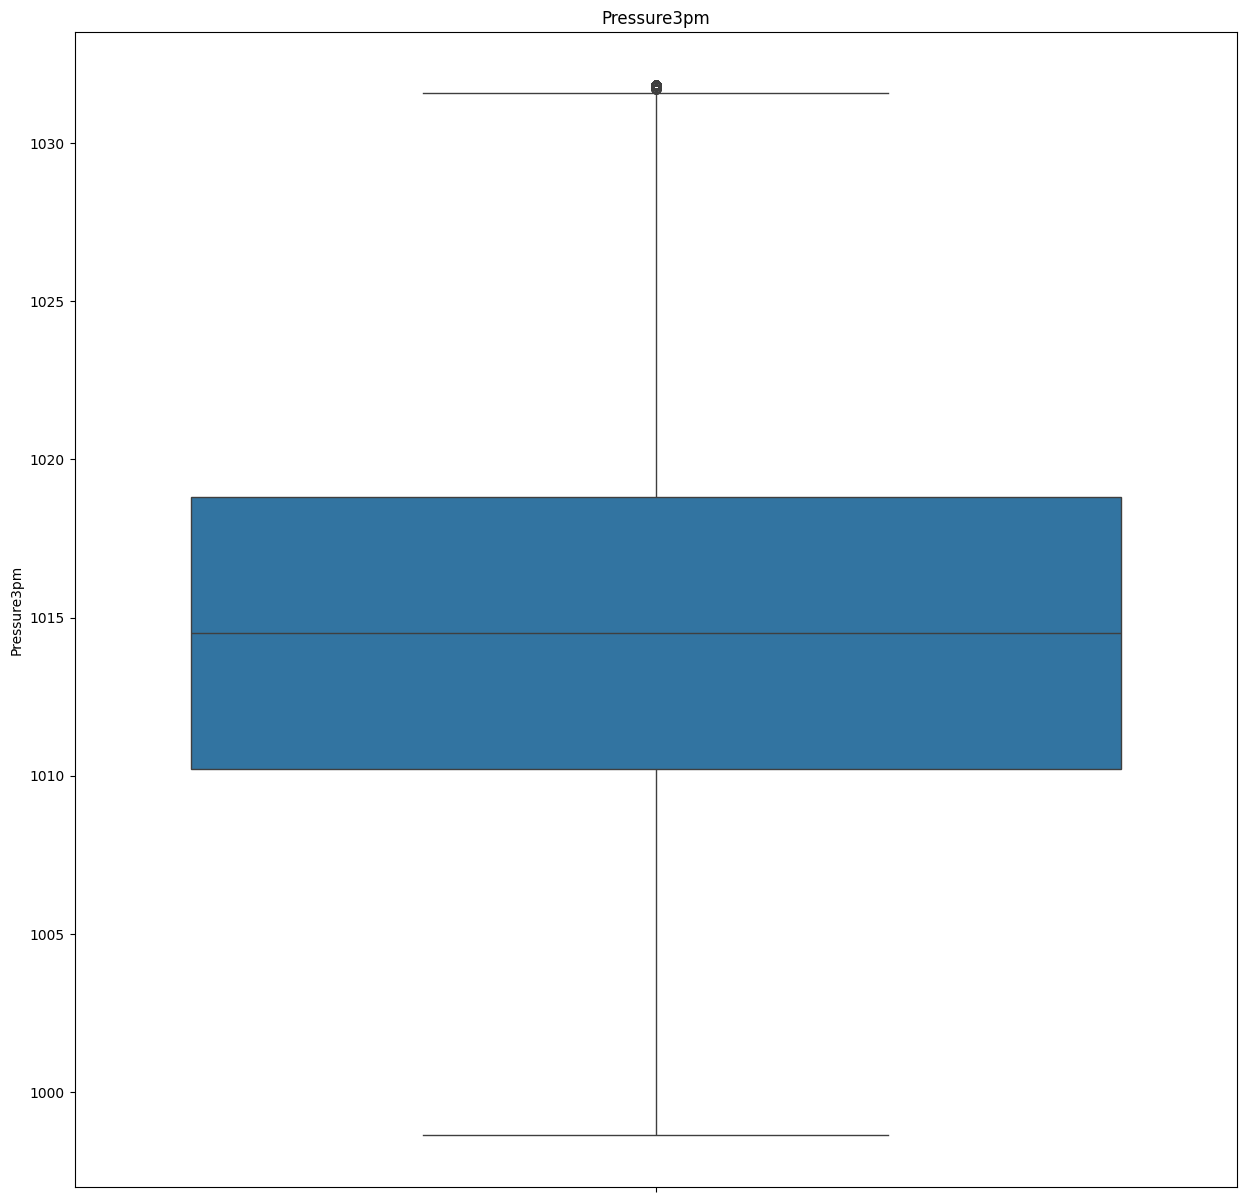

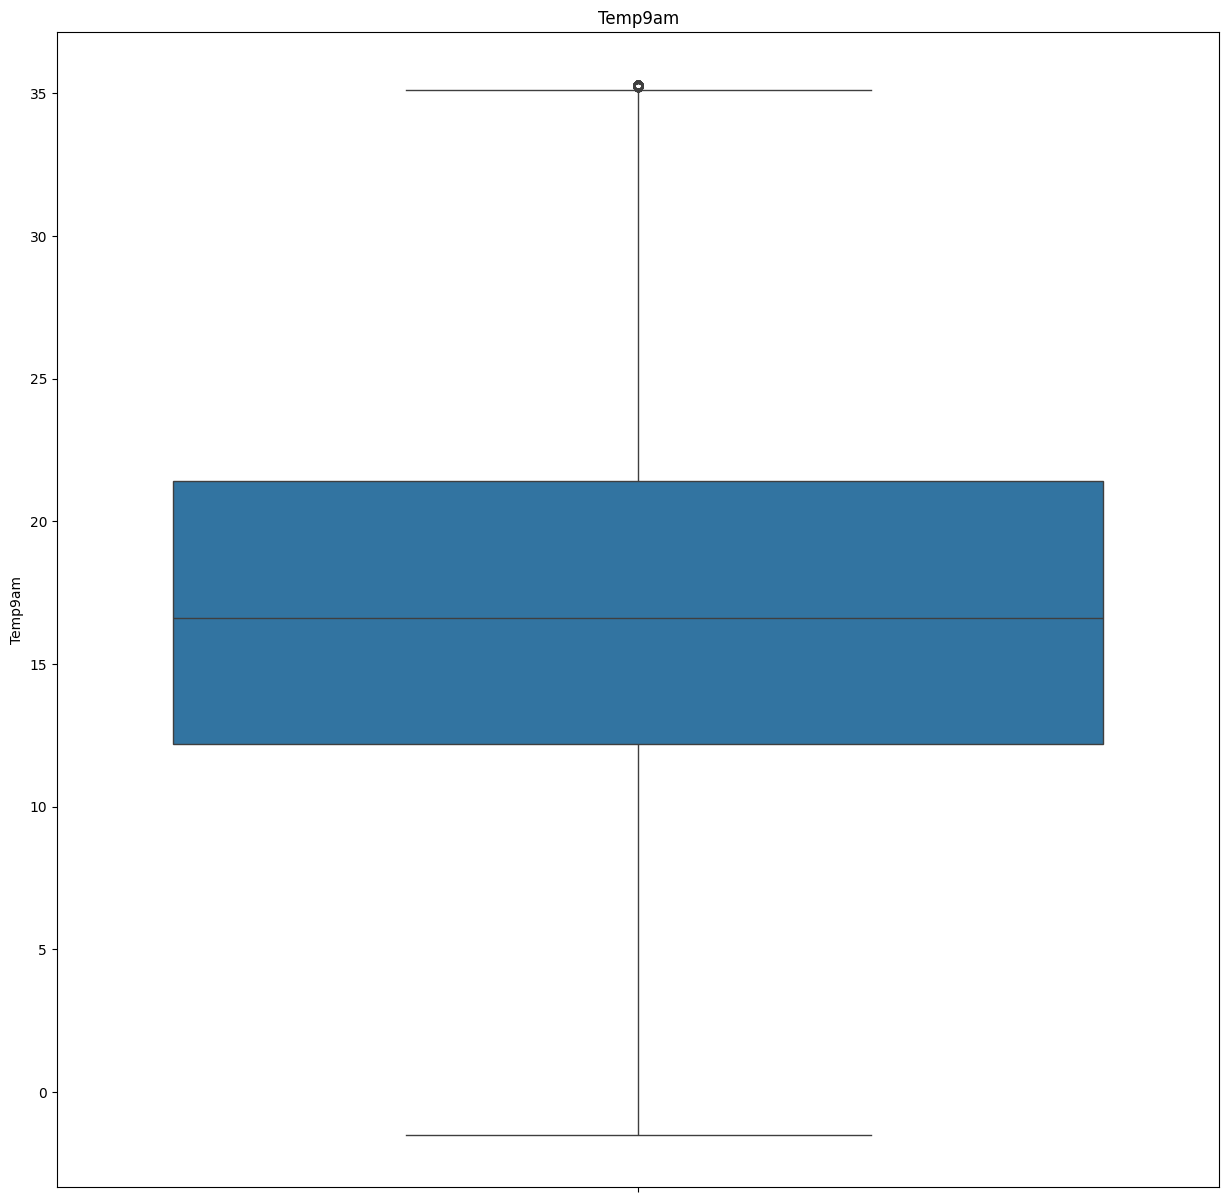

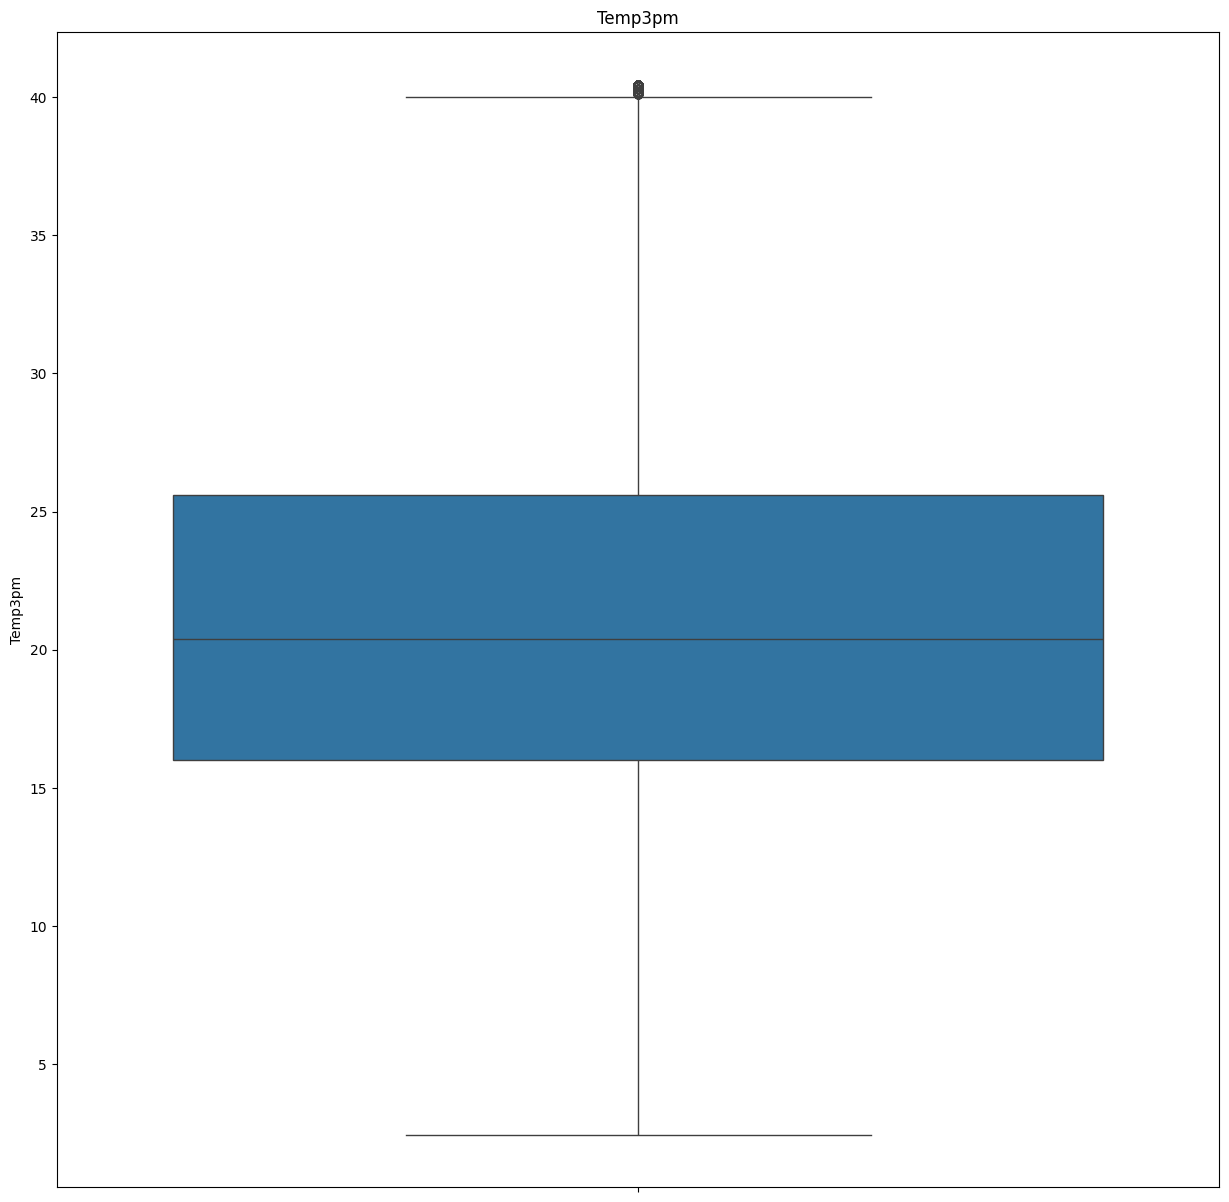

<Figure size 1500x1500 with 0 Axes>

In [138]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### Seems like we've dealt with all the outliers ###
<hr>

## Data Visualization
This section we will visualize the cleaned data, all the graphs are plotted according to the base paper.

#### An overall description of the Data ####

In [139]:
df.describe().transpose()

count         mean        std      min     25%     50%  \
Location       193053.0    23.281296  13.698098     1.00    11.0    23.0   
MinTemp        193053.0    12.438905   6.378919    -5.95     7.9    12.2   
MaxTemp        193053.0    22.666015   7.088946     2.70    17.4    22.0   
Rainfall       193053.0     0.482116   0.655739     0.00     0.0     0.0   
Evaporation    193053.0     5.091552   3.349397     0.00     2.4     4.4   
Sunshine       193053.0     6.794387   3.928790     0.00     3.5     7.3   
WindGustDir    193053.0     7.115124   4.465341     0.00     4.0     7.0   
WindGustSpeed  193053.0    40.880258  12.703568     8.50    31.0    39.0   
WindDir9am     193053.0     6.743133   4.806904     0.00     2.0     6.0   
WindDir3pm     193053.0     7.416378   4.508007     0.00     3.0     8.0   
WindSpeed9am   193053.0    14.256847   8.703987     0.00     7.0    13.0   
WindSpeed3pm   193053.0    18.896495   8.676253     0.00    13.0    19.0   
Humidity9am    193053.0    71.312681  18.501995    18.00    60.0    73.0   
Humidity3pm    193053.0    56.040880  21.425809     0.00    41.0    57.0   
Pressure9am    193053.0  1016.848708   6.725297  1001.05  1012.6  1016.8   
Pressure3pm    193053.0  1014.523283   6.691133   998.65  1010.2  1014.5   
Cloud9am       193053.0     4.886446   2.817159     0.00     2.0     6.0   
Cloud3pm       193053.0     5.018798   2.662085     0.00     3.0     6.0   
Temp9am        193053.0    16.898199   6.432274    -1.49    12.2    16.6   
Temp3pm        193053.0    21.024346   6.839293     2.45    16.0    20.4   
Date_month     193053.0     6.411763   3.389914     1.00     3.0     6.0   

                  75%      max  
Location         35.0    49.00  
MinTemp          17.1    30.45  
MaxTemp          27.6    43.50  
Rainfall          1.5     1.50  
Evaporation       7.0    14.60  
Sunshine         10.1    14.50  
WindGustDir      11.0    15.00  
WindGustSpeed    48.0    68.50  
WindDir9am       11.0    15.00  
WindDir3pm       11.0    15.00  
WindSpeed9am     20.0    37.00  
WindSpeed3pm     24.0    40.50  
Humidity9am      86.0   100.00  
Humidity3pm      71.0   100.00  
Pressure9am    1021.1  1034.25  
Pressure3pm    1018.8  1031.85  
Cloud9am          7.0     9.00  
Cloud3pm          7.0     9.00  
Temp9am          21.4    35.30  
Temp3pm          25.6    40.45  
Date_month        9.0    12.00

#### Probability and Histogram Plot ####
Histogram is used to display the frequency or count of values within different bins or intervals.<br>
probability plot compares the quantiles of the observed data with the quantiles of a theoretical distribution.

In [140]:
import scipy.stats as stats

MinTemp


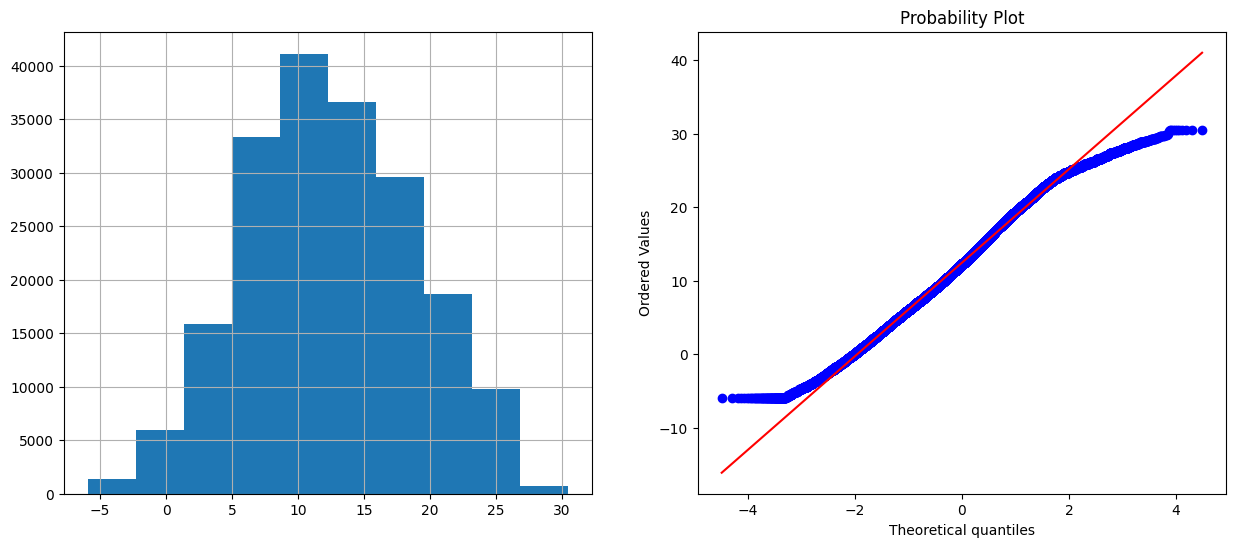

MaxTemp


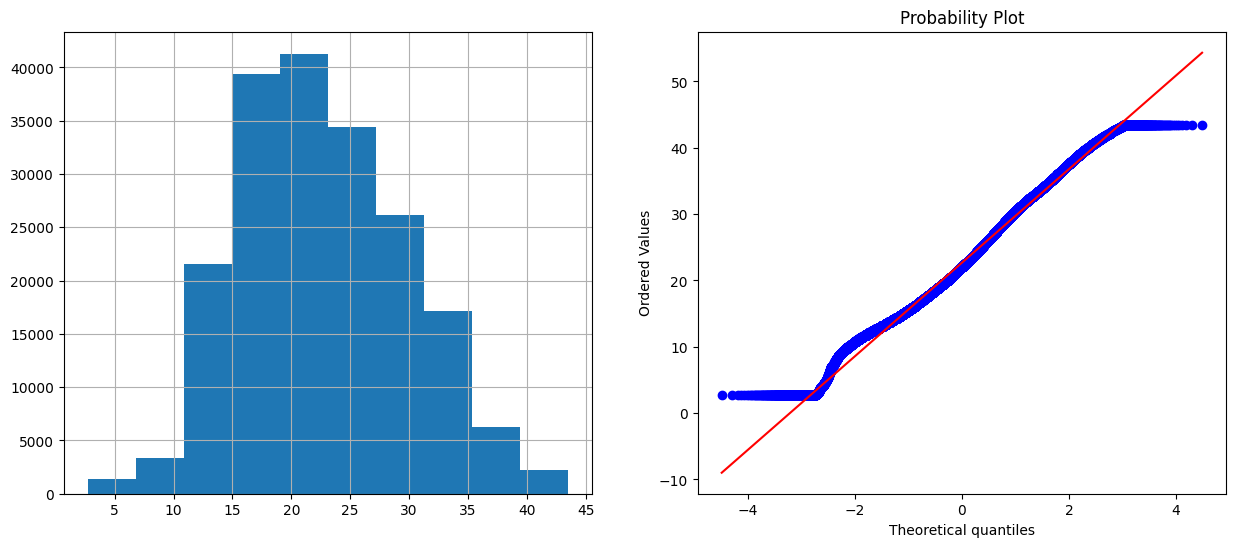

Rainfall


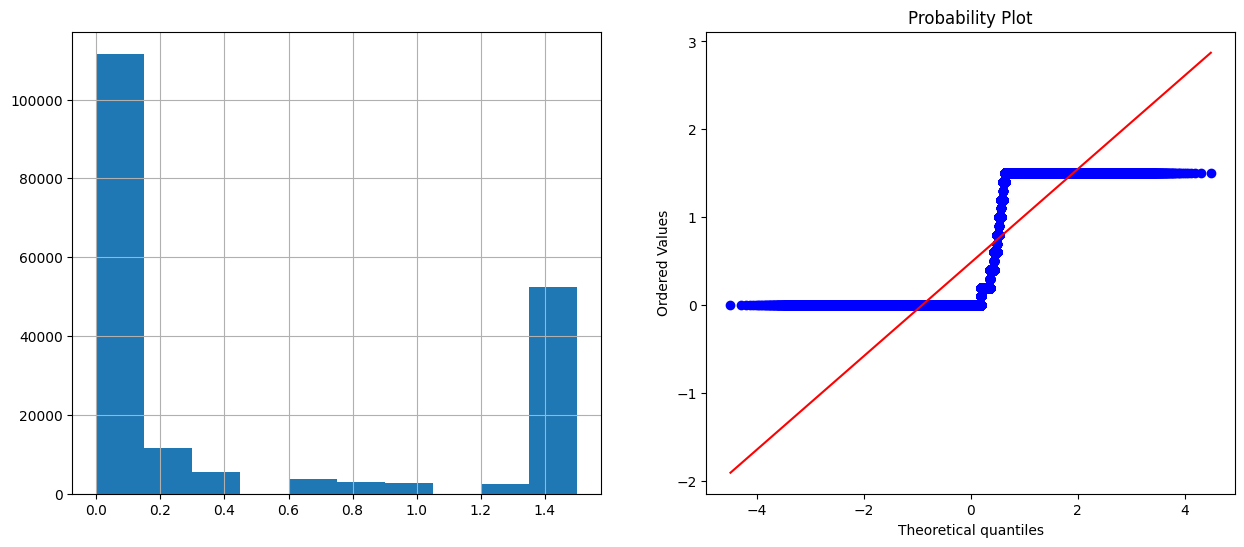

Evaporation


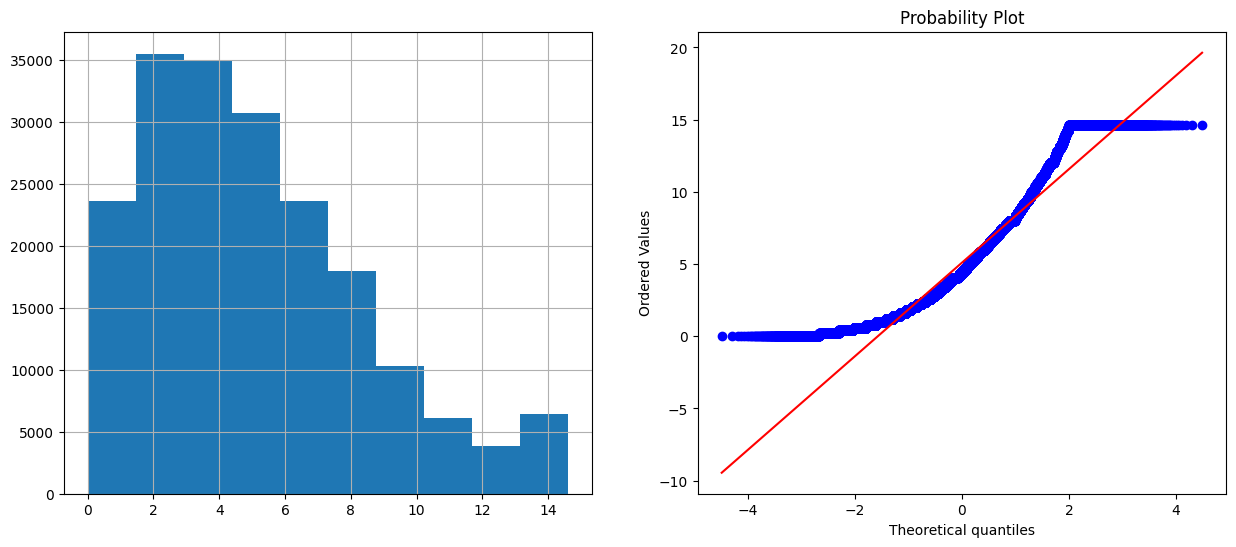

Sunshine


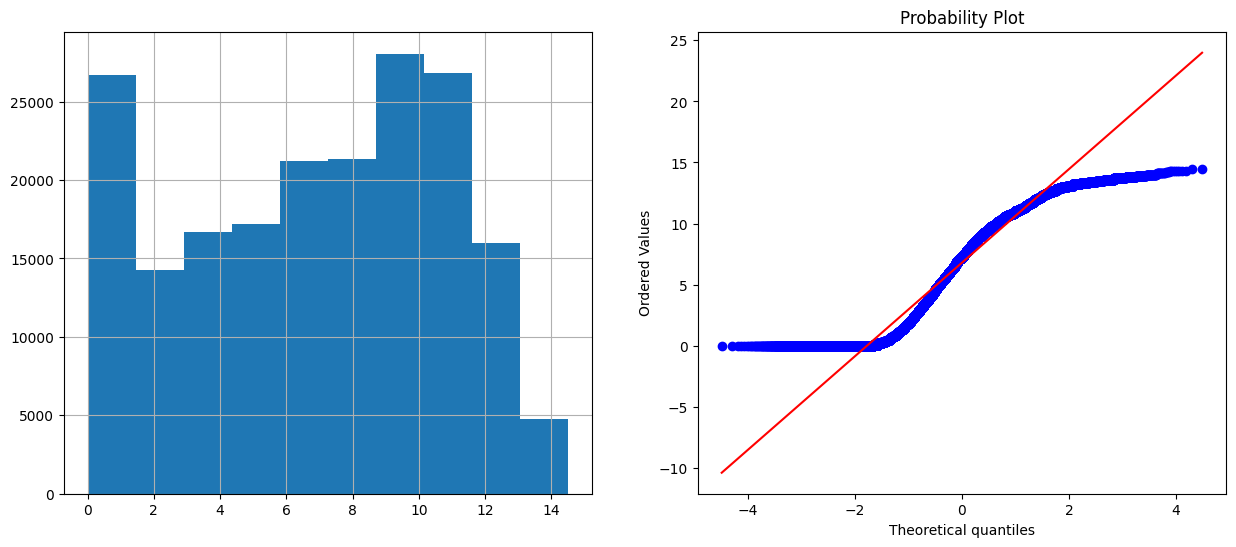

WindGustSpeed


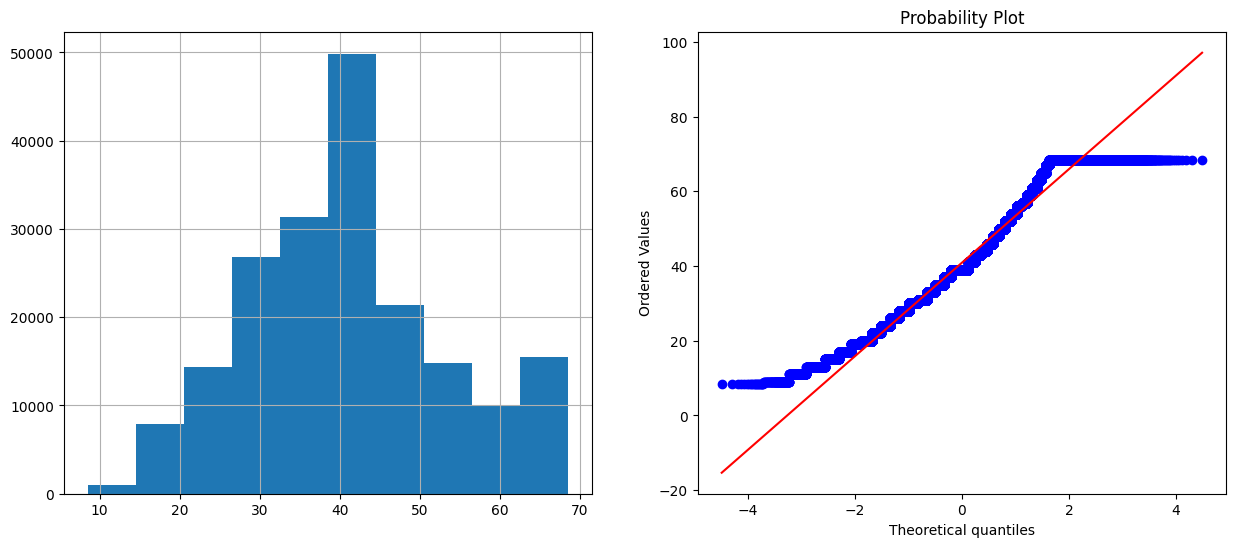

WindSpeed9am


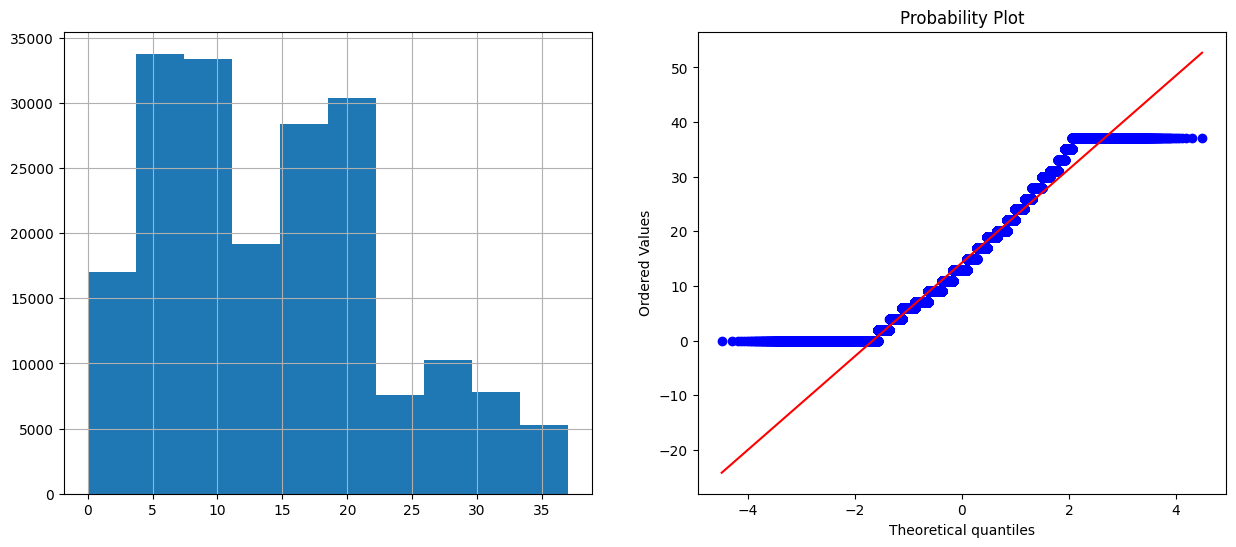

WindSpeed3pm


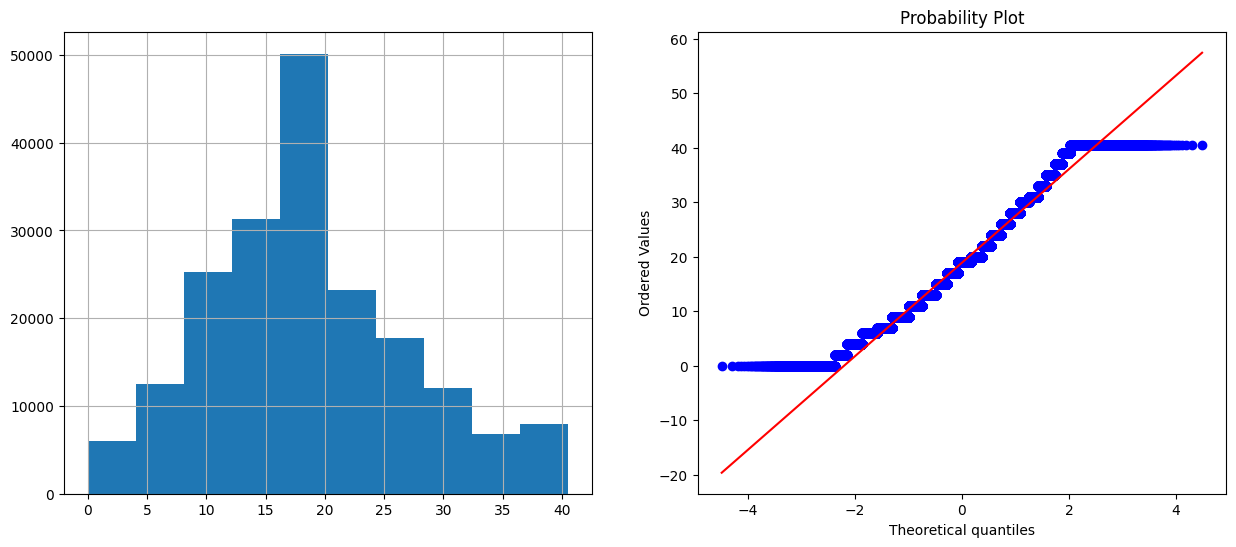

Humidity9am


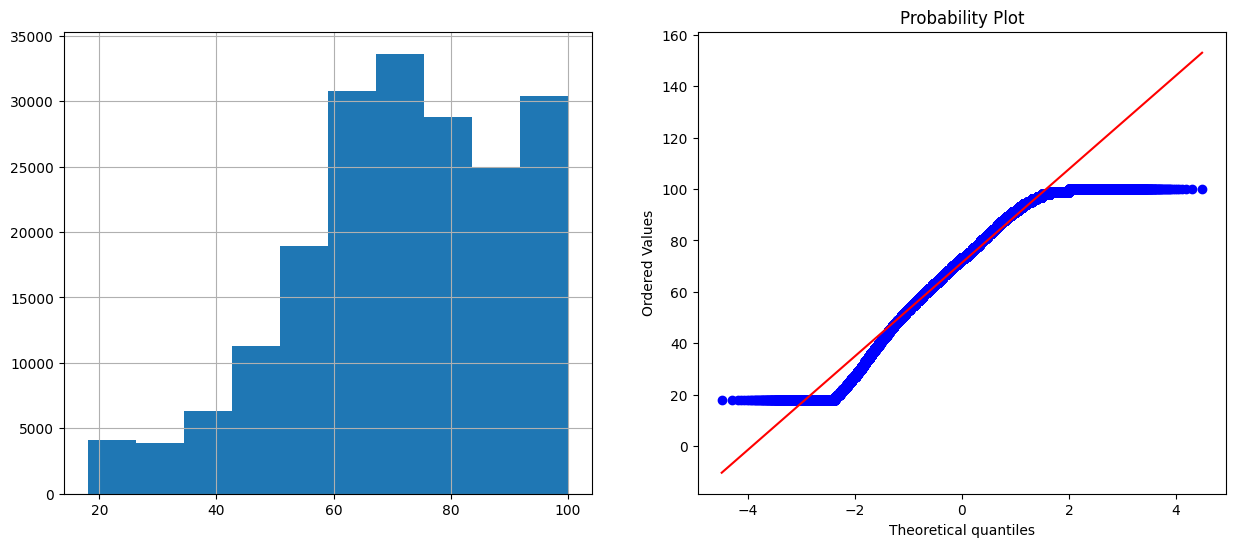

Humidity3pm


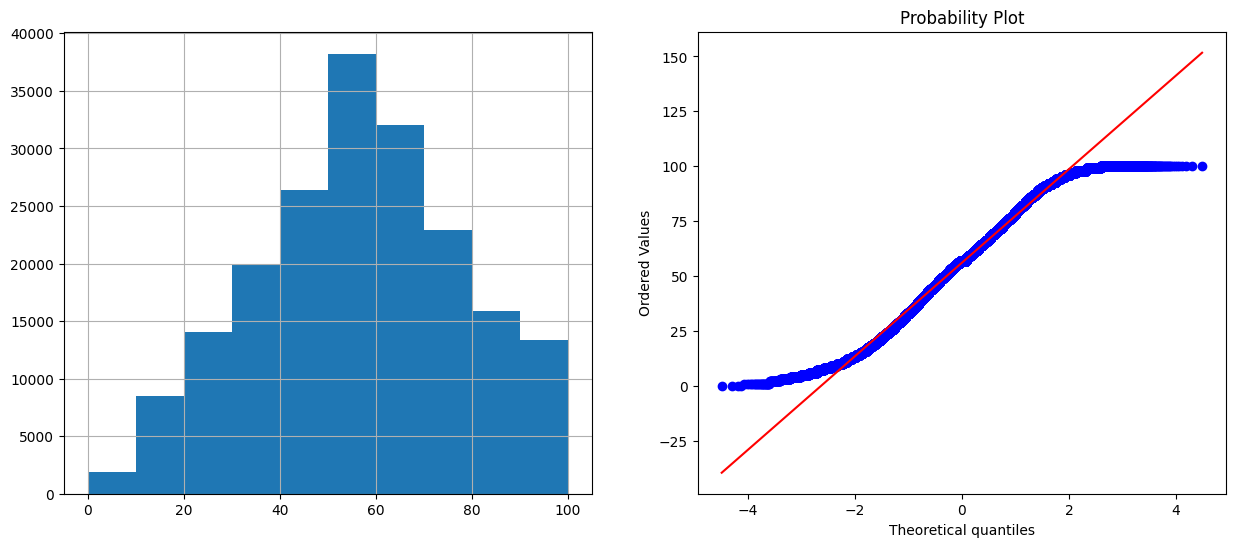

Pressure9am


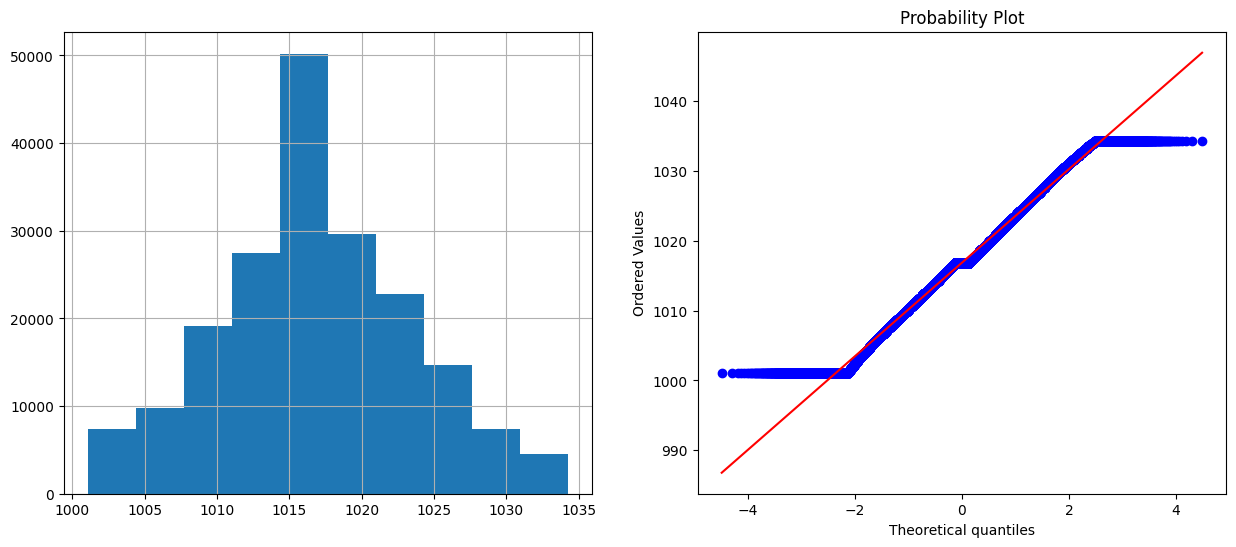

Pressure3pm


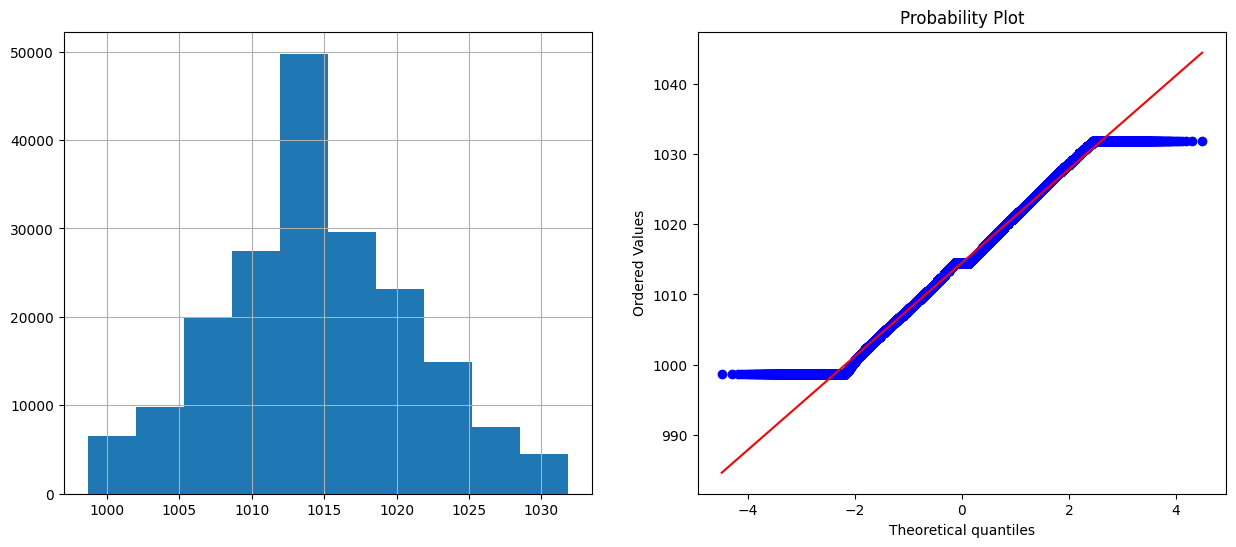

Temp9am


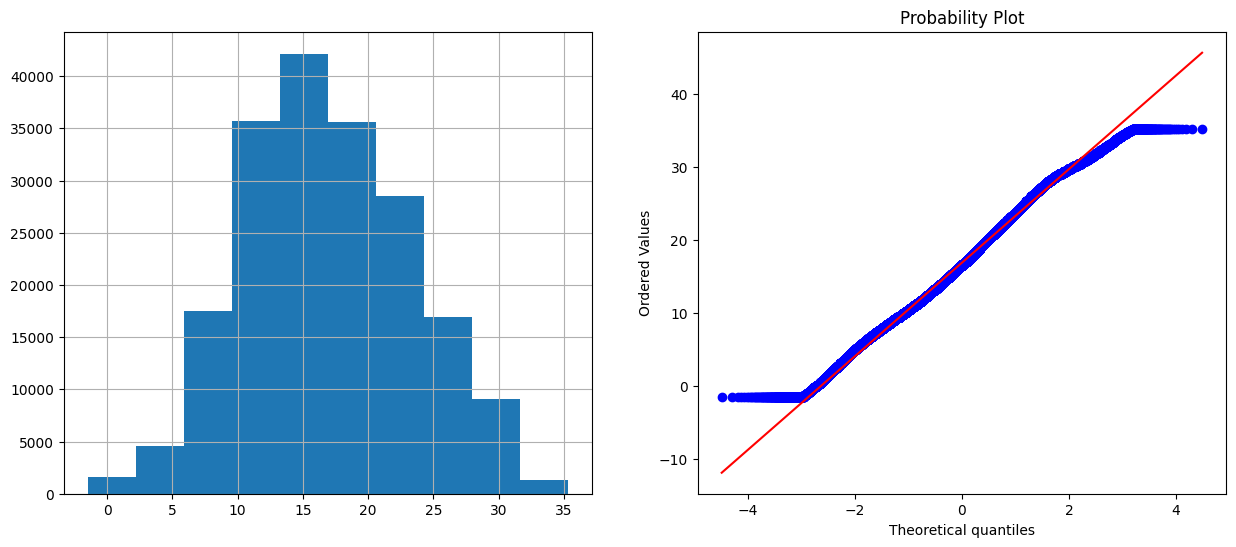

Temp3pm


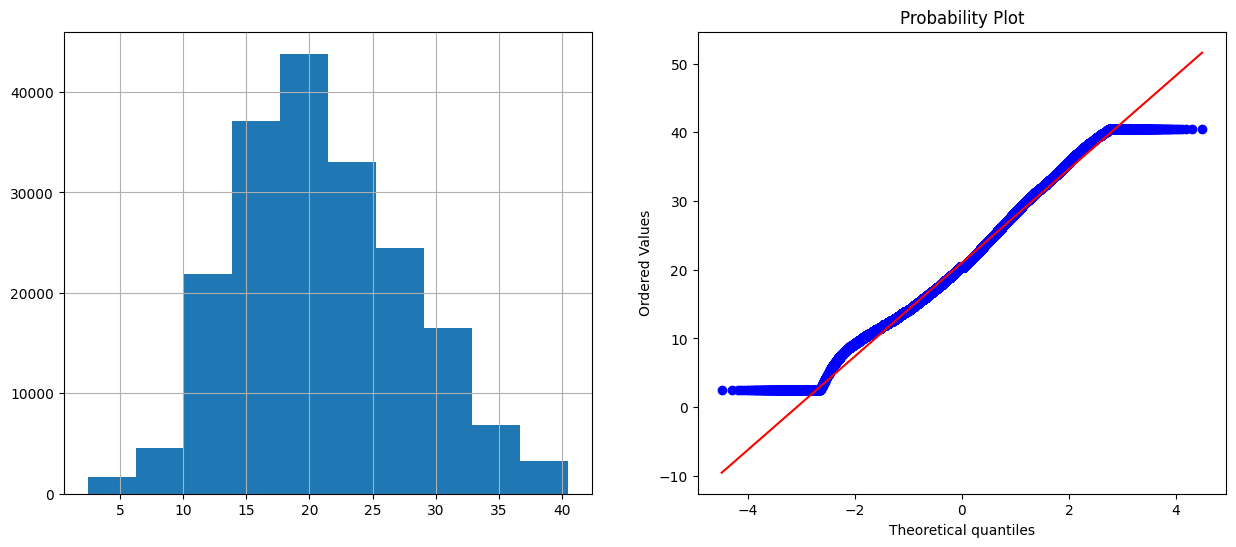

In [141]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

#### Pie Chart ####

In [142]:
a = df['RainToday'].value_counts()
b = df['RainTomorrow'].value_counts()

(-1.099998771128291,
 1.0999989496567804,
 -1.0999962115696735,
 1.0999998195985559)

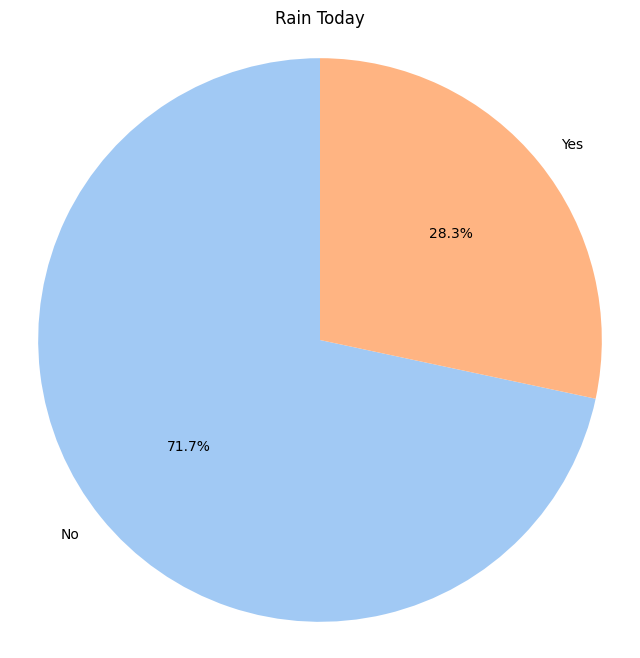

In [143]:
labels = ['No', 'Yes']
sizes = [a[False], a[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Rain Today')
plt.axis('equal')


(-1.0999985427648054, 1.099991480825994, -1.1, 1.1)

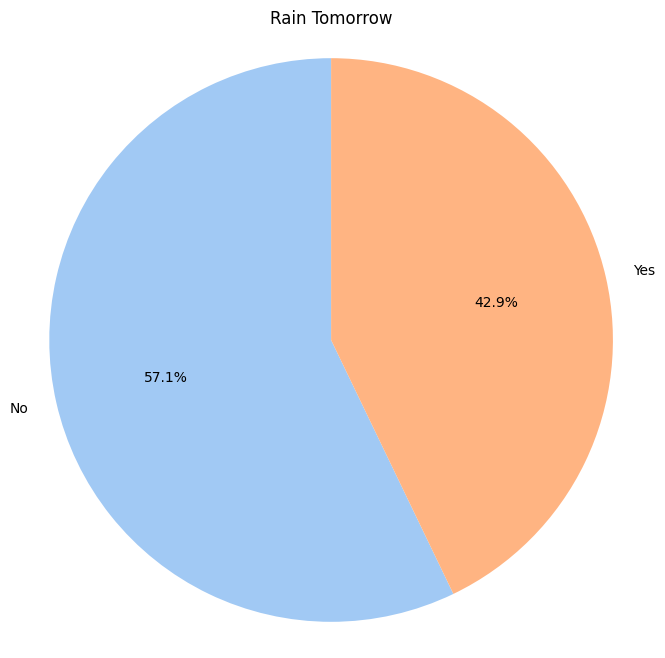

In [144]:
labels = ['No', 'Yes']
sizes = [b[False], b[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Rain Tomorrow')
plt.axis('equal')


#### Bar Graph showing the count of Rain tomorrow

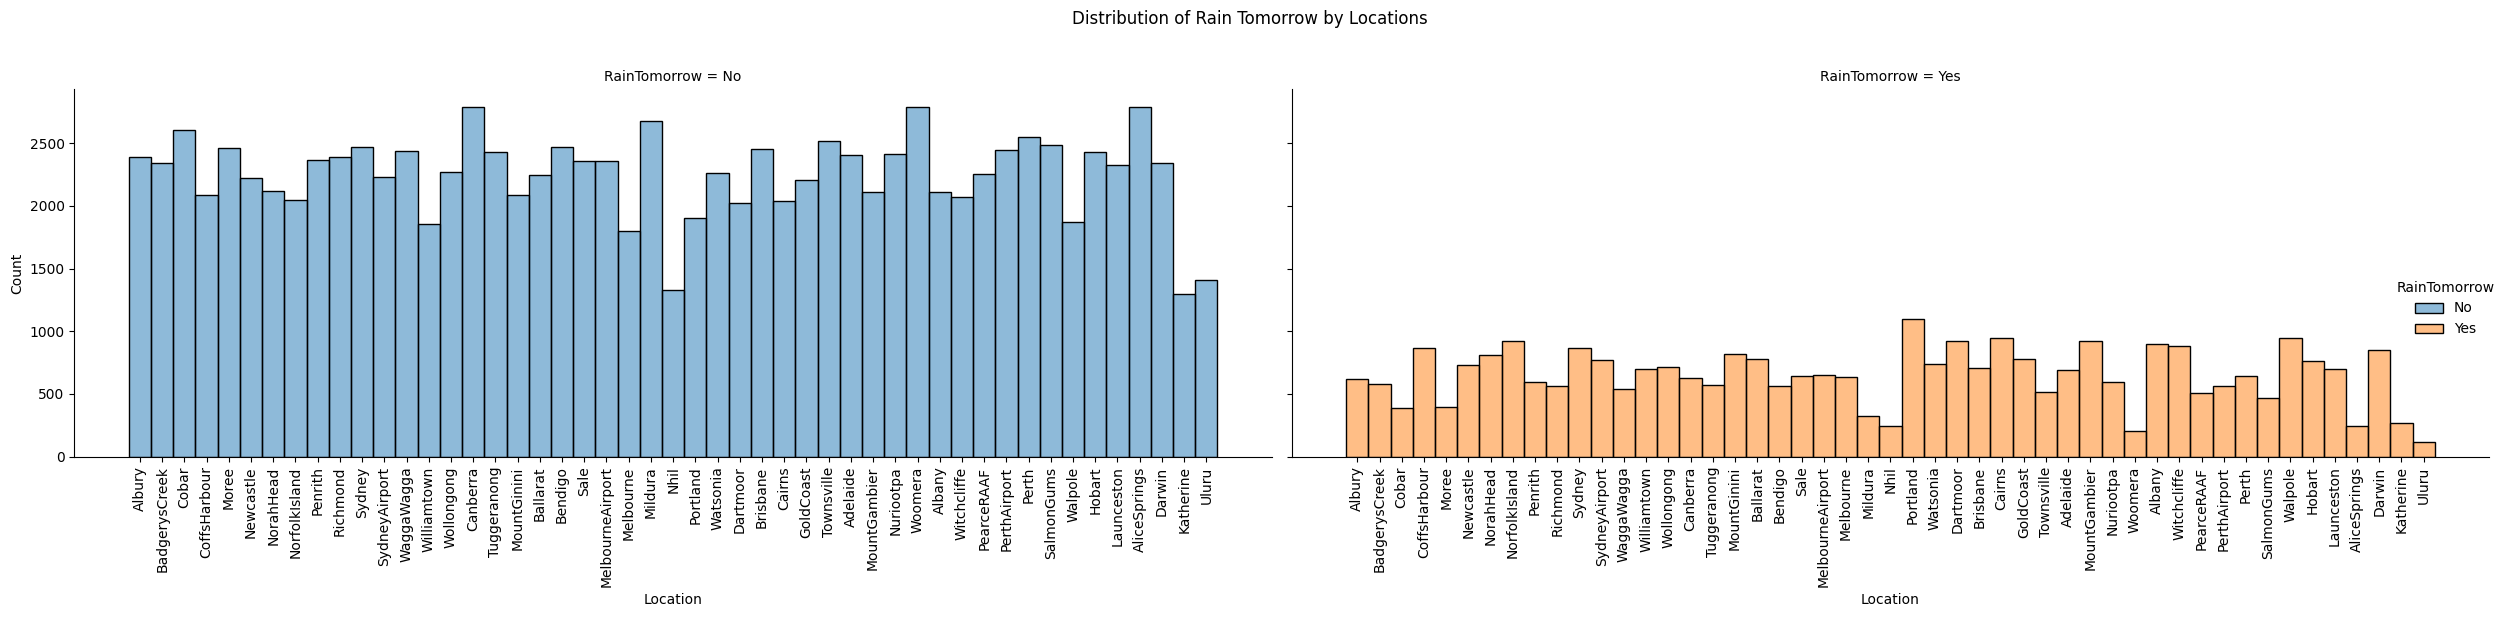

In [145]:
g = sns.displot(data=original_df, x='Location', hue='RainTomorrow', col='RainTomorrow', height=6, aspect=2)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribution of Rain Tomorrow by Locations', y=1.02)
plt.tight_layout()

####  Pair plot the training dataset to determine the optimal collection of features for explaining a connection between two variables or for forming the most distinct clusters.

In [146]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        30     13.4     22.9       0.6          7.0      11.3          4.0   
1        30      7.4     25.1       0.0          6.0       6.7          2.0   
2        30     12.9     25.7       0.0          2.4      12.2          5.0   
3        30      9.2     28.0       0.0          2.2      13.3         11.0   
4        30     17.5     32.3       1.0          3.8       0.0          4.0   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0         5.0         3.0          20.0          24.0   
1           44.0         0.0         6.0           4.0          22.0   
2           46.0         5.0         6.0          19.0          26.0   
3           24.0        13.0        14.0          11.0           9.0   
4           41.0        12.0         0.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       7.0   
1         44.0         25.0       1010.6       1007.8       1.0       2.0   
2         38.0         30.0       1007.6       1008.7       7.0       2.0   
3         45.0         16.0       1017.6       1012.8       6.0       7.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Date_month  
0     16.9     21.8      False         False          12  
1     17.2     24.3      False         False          12  
2     21.0     23.2      False         False          12  
3     18.1     26.5      False         False          12  
4     17.8     29.7      False         False          12

In [147]:
df.to_csv("balancedData.csv", index=False)

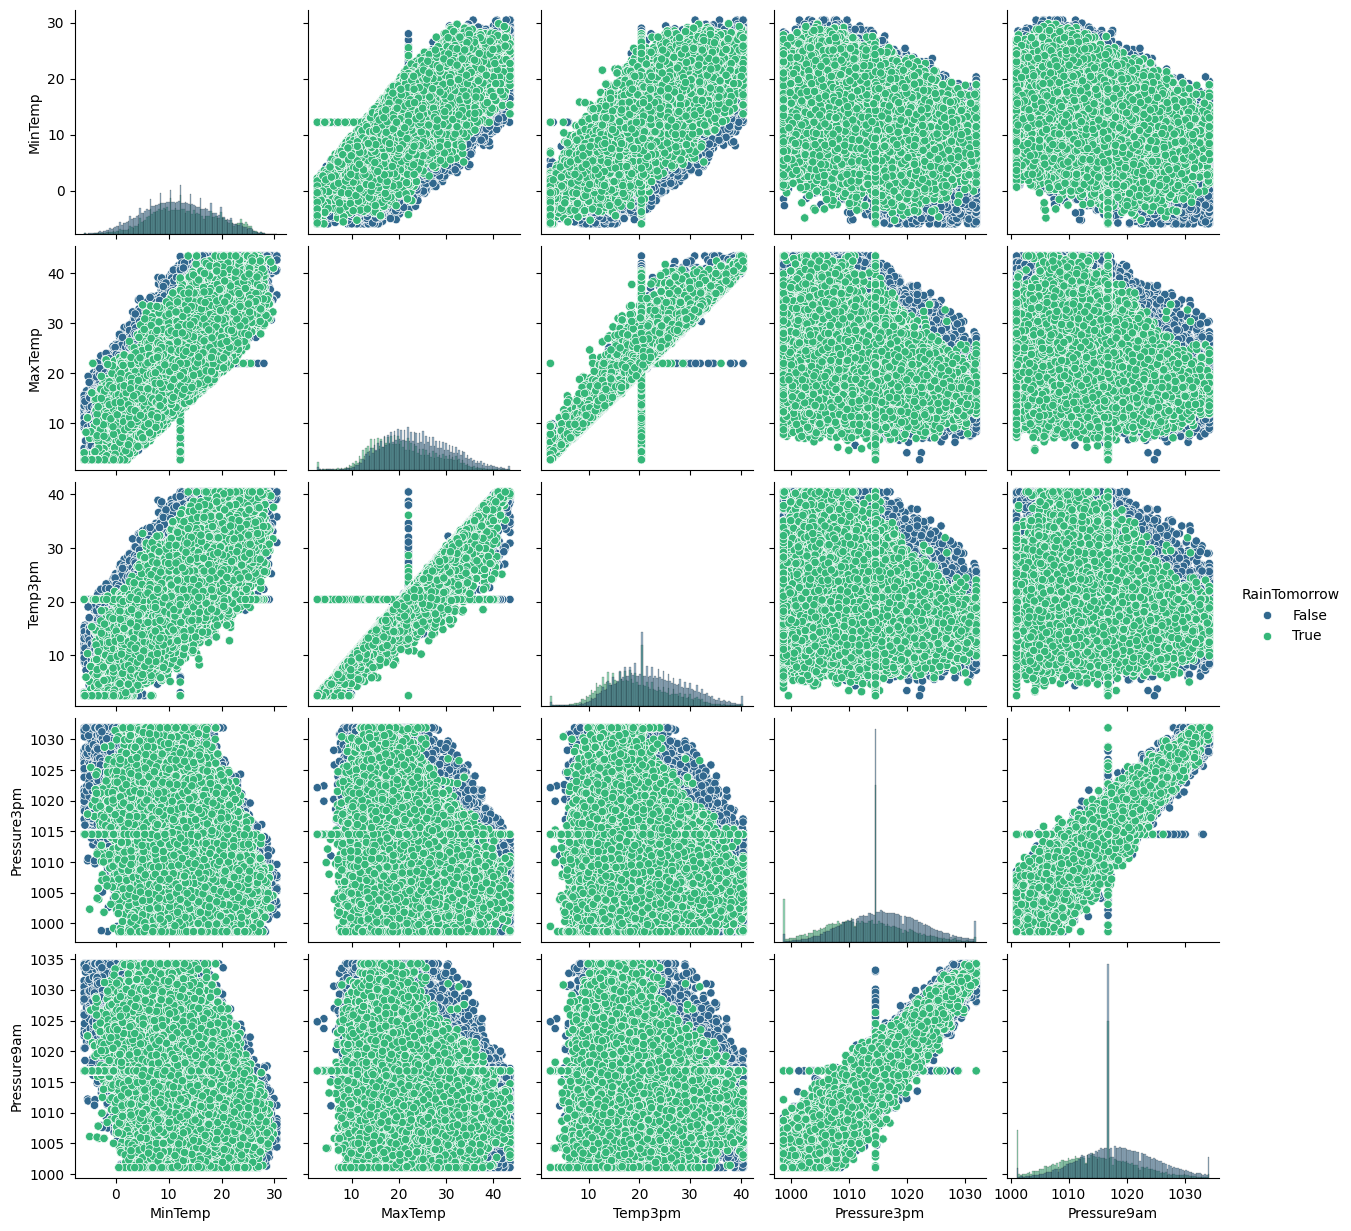

In [148]:
sns.pairplot(data=df[['MinTemp', 'MaxTemp', 'Temp3pm', 'Pressure3pm', 'Pressure9am', 'RainTomorrow']], hue='RainTomorrow',palette='viridis',diag_kind='hist')
# df.columns

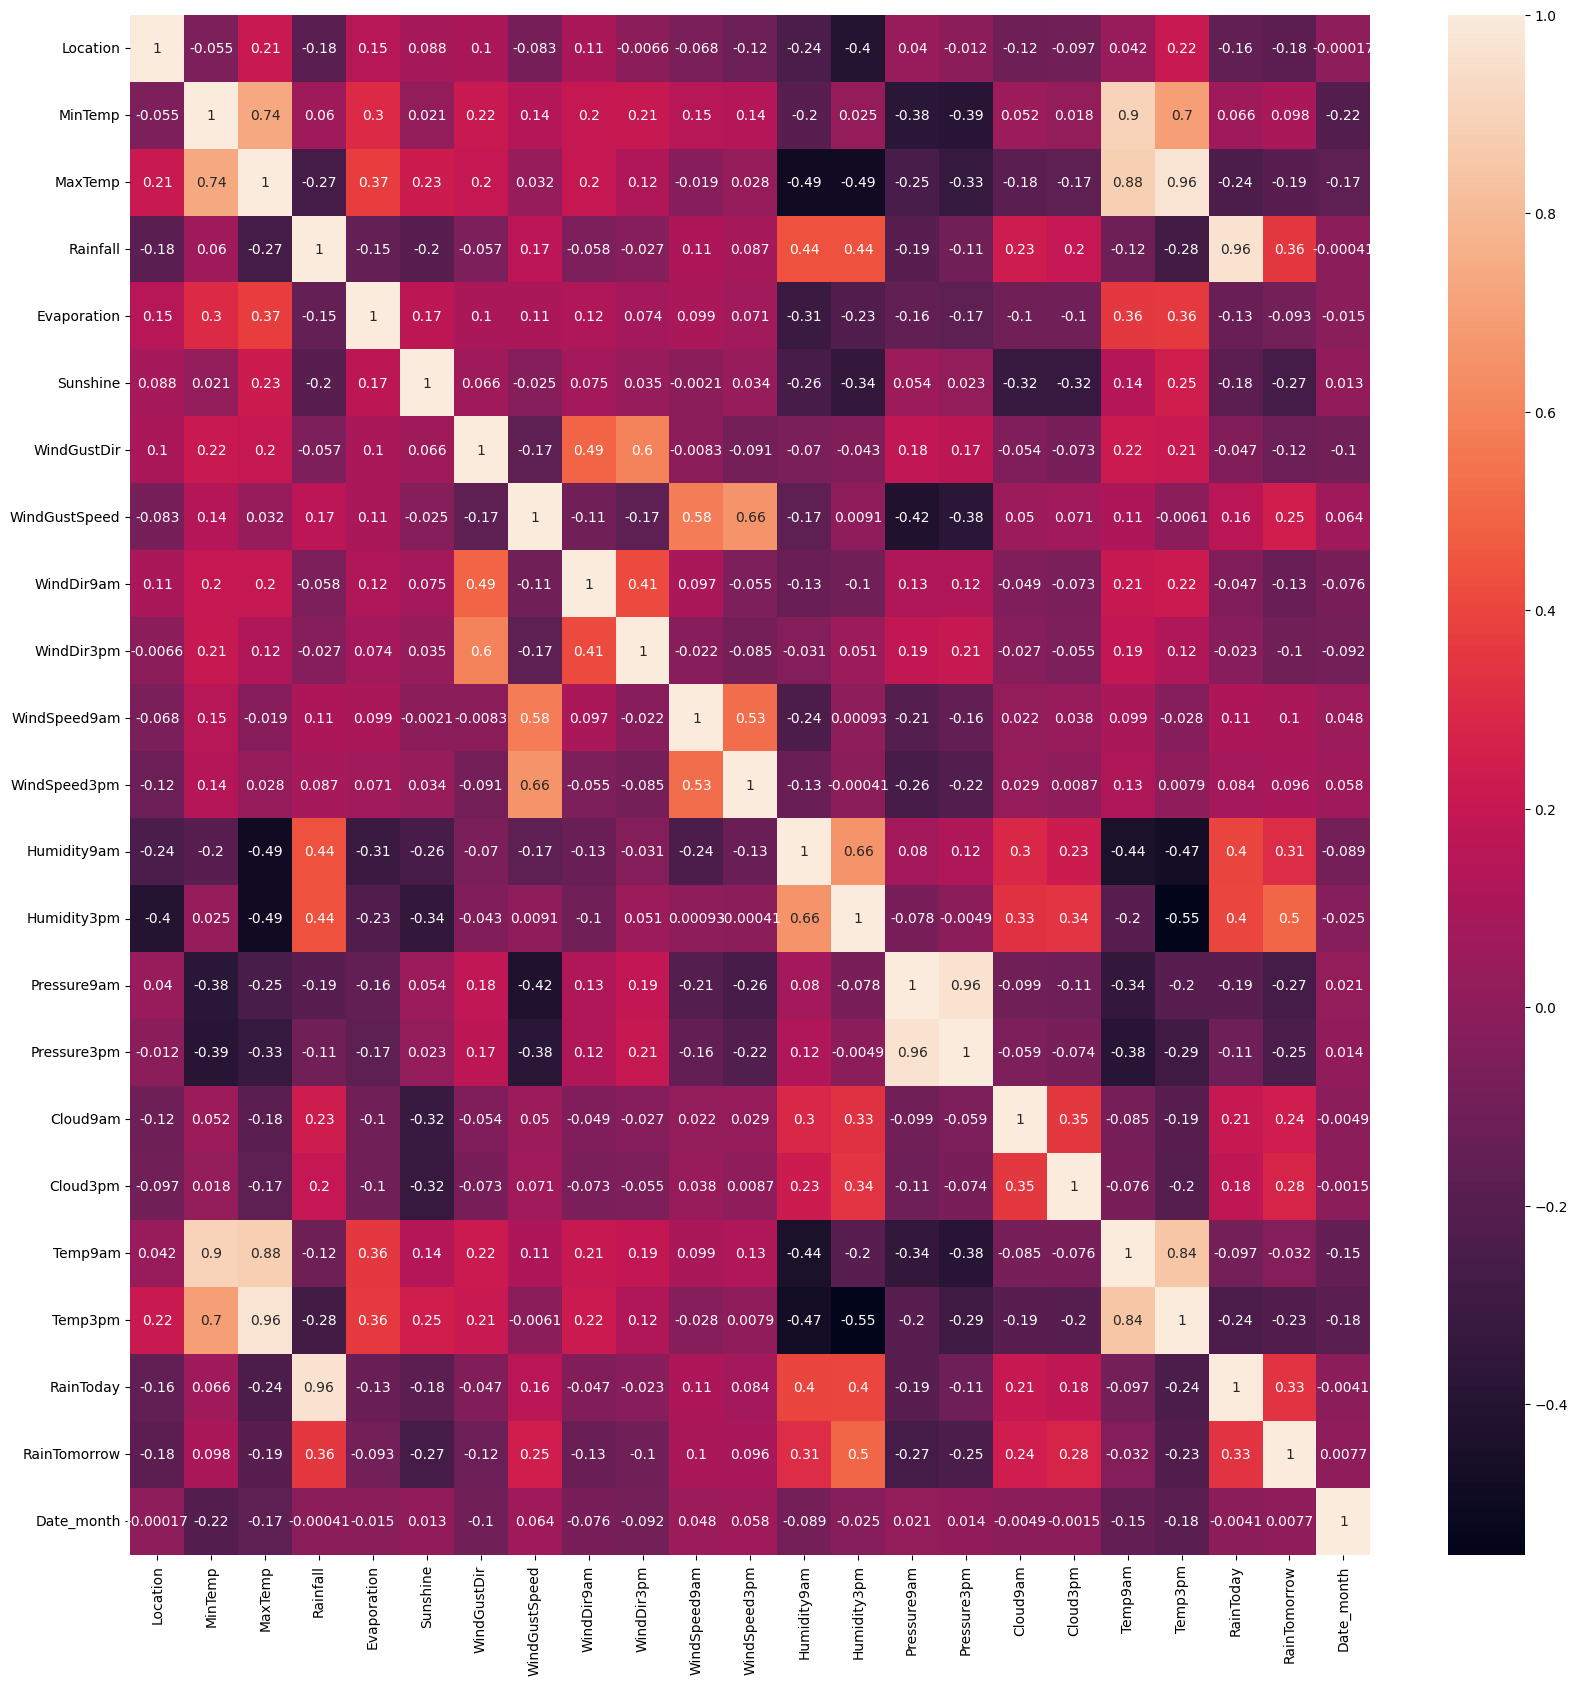

In [149]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)